# Step 1 : Reading and Understanding the Data 

In [3]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [233]:
# Local file path. Please change the file path accordingly

path = 'datasets/'
train = path + 'treino.csv'
teste = path + 'teste.csv'

In [234]:
# Reading the automobile consulting company file on which analysis needs to be done

df_auto = pd.read_csv(train)
df_auto.head()

ID  num_fotos       marca  modelo  \
0  105869496634249611881157692933406072990 8.0000      VOLKSWAGEN  AMAROK   
1  14165644411757892901957277406025007093  8.0000      JAGUAR      F-PACE   
2  78515656948521351316652580664682810356  14.0000     CHEVROLET   CRUZE    
3  36797041166808090517929207429817328298  8.0000      PORSCHE     718      
4  338618517701891995317200439137014723900 8.0000      VOLVO       XC90     

                                                            versao  \
0  2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO   
1  2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO                   
2  1.8 LT 16V FLEX 4P AUTOMÁTICO                                     
3  2.0 16V H4 GASOLINA BOXSTER PDK                                   
4  2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO                  

   ano_de_fabricacao  ano_modelo    odometro      cambio  num_portas  \
0  2017              2017.0000   55672.0000   Automática  4            
1  2017              2017.0000   47858.0000   Automática  4            
2  2012              2013.0000   122323.0000  Automática  4            
3  2020              2021.0000   14207.0000   Automática  2            
4  2015              2016.0000   43760.0000   Automática  4            

                   tipo blindado     cor tipo_vendedor cidade_vendedor  \
0  Picape                N        Preto   PF            São Paulo        
1  Utilitário esportivo  N        Branco  PF            Rio de Janeiro   
2  Sedã                  N        Prata   PJ            Rio de Janeiro   
3  Picape                N        Branco  PF            São Paulo        
4  Utilitário esportivo  N        Preto   PF            Ribeirão Preto   

          estado_vendedor   tipo_anuncio  entrega_delivery  troca  \
0  São Paulo (SP)          Pessoa Física  False             False   
1  Rio Grande do Sul (RS)  Pessoa Física  False             False   
2  São Paulo (SP)          Loja           True              True    
3  São Paulo (SP)          Pessoa Física  False             False   
4  São Paulo (SP)          Pessoa Física  False             False   

   elegivel_revisao attr_veiculo_aceita_troca attr_veiculo_único_dono  \
0  False             Aceita troca              NaN                      
1  False             Aceita troca              NaN                      
2  False             Aceita troca              NaN                      
3  False             Aceita troca              NaN                      
4  False             Aceita troca              NaN                      

  attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
0  Todas as revisões feitas pela concessionária               
1  Todas as revisões feitas pela concessionária               
2  NaN                                                        
3  Todas as revisões feitas pela concessionária               
4  Todas as revisões feitas pela concessionária               

  attr_veiculo_ipva_pago attr_veiculo_licenciado  \
0  IPVA pago              Licenciado               
1  IPVA pago              NaN                      
2  NaN                    NaN                      
3  NaN                    NaN                      
4  NaN                    NaN                      

  attr_veiculo_garantia_de_fábrica  \
0  NaN                               
1  NaN                               
2  NaN                               
3  NaN                               
4  NaN                               

  attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro  \
0  Todas as revisões feitas pela agenda do carro               
1  Todas as revisões feitas pela agenda do carro               
2  NaN                                                         
3  NaN                                                         
4  Todas as revisões feitas pela agenda do carro               

   attr_veiculo_alienado       preco  
0 NaN                    123231.9928  
1 NaN                    272076.0236  
2

## Understanding the Dataframe

O dataset original possui 39446 linhas e 29 colunas

In [235]:
# shape of the data
df_auto.shape

(39446, 29)

O dataset possui 3 variáveis do tipo booleano, 5 do tipo float64, 2 do tipo int64, e 19 do tipo object.
Elas podem ser divididas em dos grupos: 7 numéricas e 22 categóricas.

In [236]:
# information of the data
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ID                                                          39446 non-null  object 
 1   num_fotos                                                   39209 non-null  float64
 2   marca                                                       39446 non-null  object 
 3   modelo                                                      39446 non-null  object 
 4   versao                                                      39446 non-null  object 
 5   ano_de_fabricacao                                           39446 non-null  int64  
 6   ano_modelo                                                  39446 non-null  float64
 7   odometro                                                    39446 non-null  float64
 

**Insights:**
- Algumas variávies podem ser excluídas ou seu tipo pode ser corrigido:
- - ID pode ser excluída pois não traz nenhuma informação útil
- - num_fotos é do tipo int e não float
- - ano_modelo é do tipo int e não float
- -  entrega_delivery, troca e elegivel_revisao são booleanos e entram na classificação de variáveis categóricas.
- - attr_veiculo_alienado pode ser excluída pois a coluna está vazia.  

In [10]:
# description of the data
df_auto.describe()

num_fotos  ano_de_fabricacao  ano_modelo    odometro  num_portas  \
count 39209.0000 39446.0000         39446.0000  39446.0000  39446.0000    
mean  10.3238    2016.7481          2017.8072   58382.2434  3.9411        
std   3.4811     4.0848             2.6753      32542.7931  0.3372        
min   8.0000     1985.0000          1997.0000   100.0000    2.0000        
25%   8.0000     2015.0000          2016.0000   31235.2500  4.0000        
50%   8.0000     2018.0000          2018.0000   57244.5000  4.0000        
75%   14.0000    2019.0000          2020.0000   81925.7500  4.0000        
max   21.0000    2022.0000          2023.0000   390065.0000 4.0000        

       attr_veiculo_alienado        preco  
count 0.0000                 39446.0000    
mean  NaN                    133385.8743   
std   NaN                    82384.9719    
min   NaN                    7258.1599     
25%   NaN                    76774.3217    
50%   NaN                    114307.9706   
75%   NaN                    163987.0043   
max   NaN                    1359812.8923

In [231]:
df_auto.describe(include='all')

num_fotos       marca   modelo  ano_de_fabricacao  ano_modelo  \
count  39209.0000  39446       39446   39446.0000         39446.0000    
unique NaN         41          473     NaN                NaN           
top    NaN         VOLKSWAGEN  COMPASS NaN                NaN           
freq   NaN         6140        1967    NaN                NaN           
mean   10.3238     NaN         NaN     2016.7481          2017.8072     
std    3.4811      NaN         NaN     4.0848             2.6753        
min    8.0000      NaN         NaN     1985.0000          1997.0000     
25%    8.0000      NaN         NaN     2015.0000          2016.0000     
50%    8.0000      NaN         NaN     2018.0000          2018.0000     
75%    14.0000     NaN         NaN     2019.0000          2020.0000     
max    21.0000     NaN         NaN     2022.0000          2023.0000     

          odometro      cambio  num_portas   tipo blindado     cor  \
count  39446.0000   39446      39446.0000   39446  39446    39446    
unique NaN          7          NaN          8      2        8        
top    NaN          Automática NaN          Sedã   N        Branco   
freq   NaN          30073      NaN          21910  39128    27919    
mean   58382.2434   NaN        3.9411       NaN    NaN      NaN      
std    32542.7931   NaN        0.3372       NaN    NaN      NaN      
min    100.0000     NaN        2.0000       NaN    NaN      NaN      
25%    31235.2500   NaN        4.0000       NaN    NaN      NaN      
50%    57244.5000   NaN        4.0000       NaN    NaN      NaN      
75%    81925.7500   NaN        4.0000       NaN    NaN      NaN      
max    390065.0000  NaN        4.0000       NaN    NaN      NaN      

       tipo_vendedor cidade_vendedor estado_vendedor   tipo_anuncio  \
count   39446         39446           39446           39446           
unique  2             648             25              4               
top     PF            São Paulo       São Paulo (SP)  Pessoa Física   
freq    23857         8198            21794           23949           
mean    NaN           NaN             NaN             NaN             
std     NaN           NaN             NaN             NaN             
min     NaN           NaN             NaN             NaN             
25%     NaN           NaN             NaN             NaN             
50%     NaN           NaN             NaN             NaN             
75%     NaN           NaN             NaN             NaN             
max     NaN           NaN             NaN             NaN             

       entrega_delivery  troca elegivel_revisao attr_veiculo_aceita_troca  \
count   39446            39446  39446            29230                      
unique  2                2      1                1                          
top     False            False  False            Aceita troca               
freq    31508            32740  39446            29230                      
mean    NaN              NaN    NaN              NaN                        
std     NaN              NaN    NaN              NaN                        
min     NaN              NaN    NaN              NaN                        
25%     NaN              NaN    NaN              NaN                        
50%     NaN              NaN    NaN              NaN                        
75%     NaN              NaN    NaN              NaN                        
max     NaN              NaN    NaN              NaN                        

       attr_veiculo_único_dono  \
count   13898                    
unique  1                        
top     Único dono               
freq    13898                    
mean    NaN                      
std     NaN                      
min     NaN                      
25%     NaN                      
50%     NaN                      
75%     NaN                      
max     NaN                      

       attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
count   12239                      

# Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

In [271]:
# dropping 'ID','attr_veiculo_alienado' based on business knowledge

df = df_auto.drop(['ID','attr_veiculo_alienado'],axis=1)
df.shape

(39446, 27)

In [272]:
# Calculating the Missing Values % contribution in DF

df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False)

attr_veiculo_garantia_de_fábrica                             85.3300
attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro   79.9700
attr_veiculo_todas_as_revisões_feitas_pela_concessionária    68.9700
attr_veiculo_único_dono                                      64.7700
attr_veiculo_licenciado                                      46.1300
attr_veiculo_ipva_pago                                       33.5200
attr_veiculo_aceita_troca                                    25.9000
num_fotos                                                    0.6000 
estado_vendedor                                              0.0000 
elegivel_revisao                                             0.0000 
troca                                                        0.0000 
entrega_delivery                                             0.0000 
tipo_anuncio                                                 0.0000 
cidade_vendedor                                              0.0000 
marca                             

**Insights:**
- As colunas iniciadas com attr_veiculo_ tem muitos valores faltantes. 

In [273]:
# corrigindo o tipo de algumas features
# Antes de mudar o tipo de num_fotos devo preencher os valores faltantes. Vou supor que são 0.
df['num_fotos'].fillna(0, inplace=True)
df['num_fotos'] = df['num_fotos'].astype('int64')
df['ano_modelo'] = df['ano_modelo'].astype('int64')
df['elegivel_revisao'] = df['elegivel_revisao'].astype('str')
df['entrega_delivery'] = df['entrega_delivery'].astype('str')
df['troca'] = df['troca'].astype('str')

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 27 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   num_fotos                                                   39446 non-null  int64  
 1   marca                                                       39446 non-null  object 
 2   modelo                                                      39446 non-null  object 
 3   versao                                                      39446 non-null  object 
 4   ano_de_fabricacao                                           39446 non-null  int64  
 5   ano_modelo                                                  39446 non-null  int64  
 6   odometro                                                    39446 non-null  float64
 7   cambio                                                      39446 non-null  object 
 

In [275]:
df.head(3)

num_fotos       marca  modelo  \
0  8          VOLKSWAGEN  AMAROK   
1  8          JAGUAR      F-PACE   
2  14         CHEVROLET   CRUZE    

                                                            versao  \
0  2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO   
1  2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO                   
2  1.8 LT 16V FLEX 4P AUTOMÁTICO                                     

   ano_de_fabricacao  ano_modelo    odometro      cambio  num_portas  \
0  2017               2017       55672.0000   Automática  4            
1  2017               2017       47858.0000   Automática  4            
2  2012               2013       122323.0000  Automática  4            

                   tipo blindado     cor tipo_vendedor cidade_vendedor  \
0  Picape                N        Preto   PF            São Paulo        
1  Utilitário esportivo  N        Branco  PF            Rio de Janeiro   
2  Sedã                  N        Prata   PJ            Rio de Janeiro   

          estado_vendedor   tipo_anuncio entrega_delivery  troca  \
0  São Paulo (SP)          Pessoa Física  False            False   
1  Rio Grande do Sul (RS)  Pessoa Física  False            False   
2  São Paulo (SP)          Loja           True             True    

  elegivel_revisao attr_veiculo_aceita_troca attr_veiculo_único_dono  \
0  False            Aceita troca              NaN                      
1  False            Aceita troca              NaN                      
2  False            Aceita troca              NaN                      

  attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
0  Todas as revisões feitas pela concessionária               
1  Todas as revisões feitas pela concessionária               
2  NaN                                                        

  attr_veiculo_ipva_pago attr_veiculo_licenciado  \
0  IPVA pago              Licenciado               
1  IPVA pago              NaN                      
2  NaN                    NaN                      

  attr_veiculo_garantia_de_fábrica  \
0  NaN                               
1  NaN                               
2  NaN                               

  attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro       preco  
0  Todas as revisões feitas pela agenda do carro             123231.9928  
1  Todas as revisões feitas pela agenda do carro             272076.0236  
2  NaN                                                       53411.5395

(39446, 29)

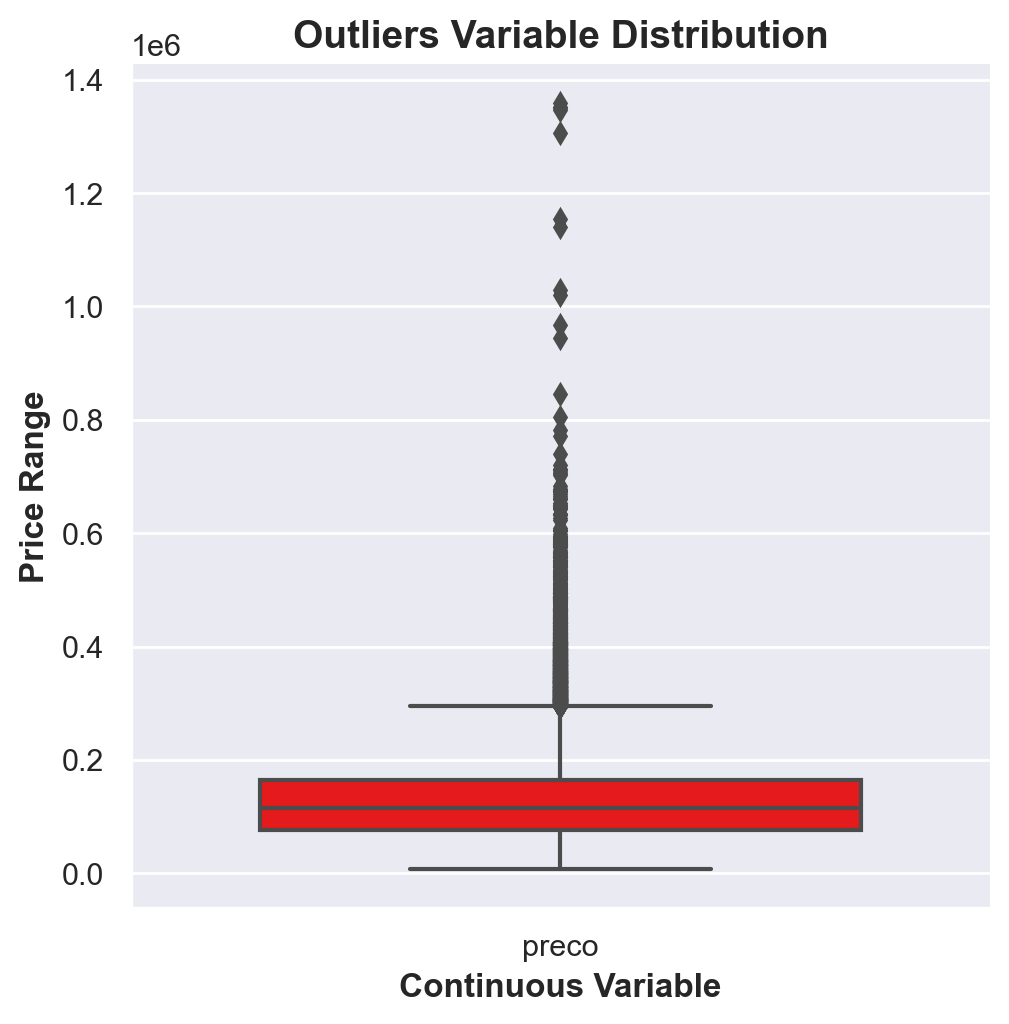

In [276]:
# Análise da variável alvo preco

outliers = ['preco']
plt.rcParams['figure.figsize'] = [8,8]
sns.catplot(data=df_auto[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7, kind='box')
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df_auto.shape

In [277]:
print(f'Temos {len(df.loc[df.preco > 300000])} carros acima de 300k. {len(df.loc[df.preco > 300000])*100/len(df):.2f}% do total.')

Temos 1827 carros acima de 300k. 4.63% do total.


**Insights:** 
- Os valores acima de 300k podem ser considerados outliers mas não vou excluí-los.
- There are some price ranges above 300k which can be termed as outliers but lets not remove it.

In [278]:
# Analisando a coluna versao
df.versao

0        2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO  
1        2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO                  
2        1.8 LT 16V FLEX 4P AUTOMÁTICO                                    
3        2.0 16V H4 GASOLINA BOXSTER PDK                                  
4        2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO                 
                               ...                                        
39441    1.6 MSI TRENDLINE 8V FLEX 4P MANUAL                              
39442    2.0 16V SPORT ACTIVEFLEX 4P AUTOMÁTICO                           
39443    1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                           
39444    2.0 COMFORTLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO
39445    2.0 16V GASOLINA 4P AUTOMÁTICO                                   
Name: versao, Length: 39446, dtype: object

In [279]:
df.versao.value_counts()

1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                            1825
2.0 16V FLEX LIMITED AUTOMÁTICO                                   1355
2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC                    1007
1.0 200 TSI COMFORTLINE AUTOMÁTICO                                624 
2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO    567 
                                                                 ...  
2.4 ELEGANCE GASOLINA 4P AUTOMÁTICO                               1   
1.4 MPI FREEDOM CS 8V FLEX 2P MANUAL                              1   
2.8 SR CHALLENGE 4X4 CD 16V DIESEL 4P AUTOMÁTICO                  1   
2.0 I GLX 16V GASOLINA 4P AUTOMÁTICO                              1   
1.0 EX 12V FLEX 4P MANUAL                                         1   
Name: versao, Length: 2058, dtype: int64

**Insights:**
- A coluna versao tem muitas informações que podem ser relevantes para o nosso modelo, mas deixaremos para explorá-la num ciclo futuro. Devido à sua alta cardinalidade (muitas categorias diferentes), vou removê-la, por enquanto.

In [280]:
# dropping versao

df = df.drop('versao',axis=1)

In [282]:
# checking for duplicates

df.loc[df.duplicated()]

Empty DataFrame
Columns: [num_fotos, marca, modelo, ano_de_fabricacao, ano_modelo, odometro, cambio, num_portas, tipo, blindado, cor, tipo_vendedor, cidade_vendedor, estado_vendedor, tipo_anuncio, entrega_delivery, troca, elegivel_revisao, attr_veiculo_aceita_troca, attr_veiculo_único_dono, attr_veiculo_todas_as_revisões_feitas_pela_concessionária, attr_veiculo_ipva_pago, attr_veiculo_licenciado, attr_veiculo_garantia_de_fábrica, attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro, preco]
Index: []

In [286]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

In [287]:
print(df.shape)
print(df_num.shape)
print(df_cat.shape)

(39446, 26)
(39446, 6)
(39446, 20)


In [288]:
df_num.head(3)

num_fotos  ano_de_fabricacao  ano_modelo    odometro  num_portas  \
0  8          2017               2017       55672.0000   4            
1  8          2017               2017       47858.0000   4            
2  14         2012               2013       122323.0000  4            

        preco  
0 123231.9928  
1 272076.0236  
2 53411.5395

# Step 3: Visualising the Data
- Aqui vamos identificar se alguns preditores tem uma forte correlação com a variável preco

## Marcas

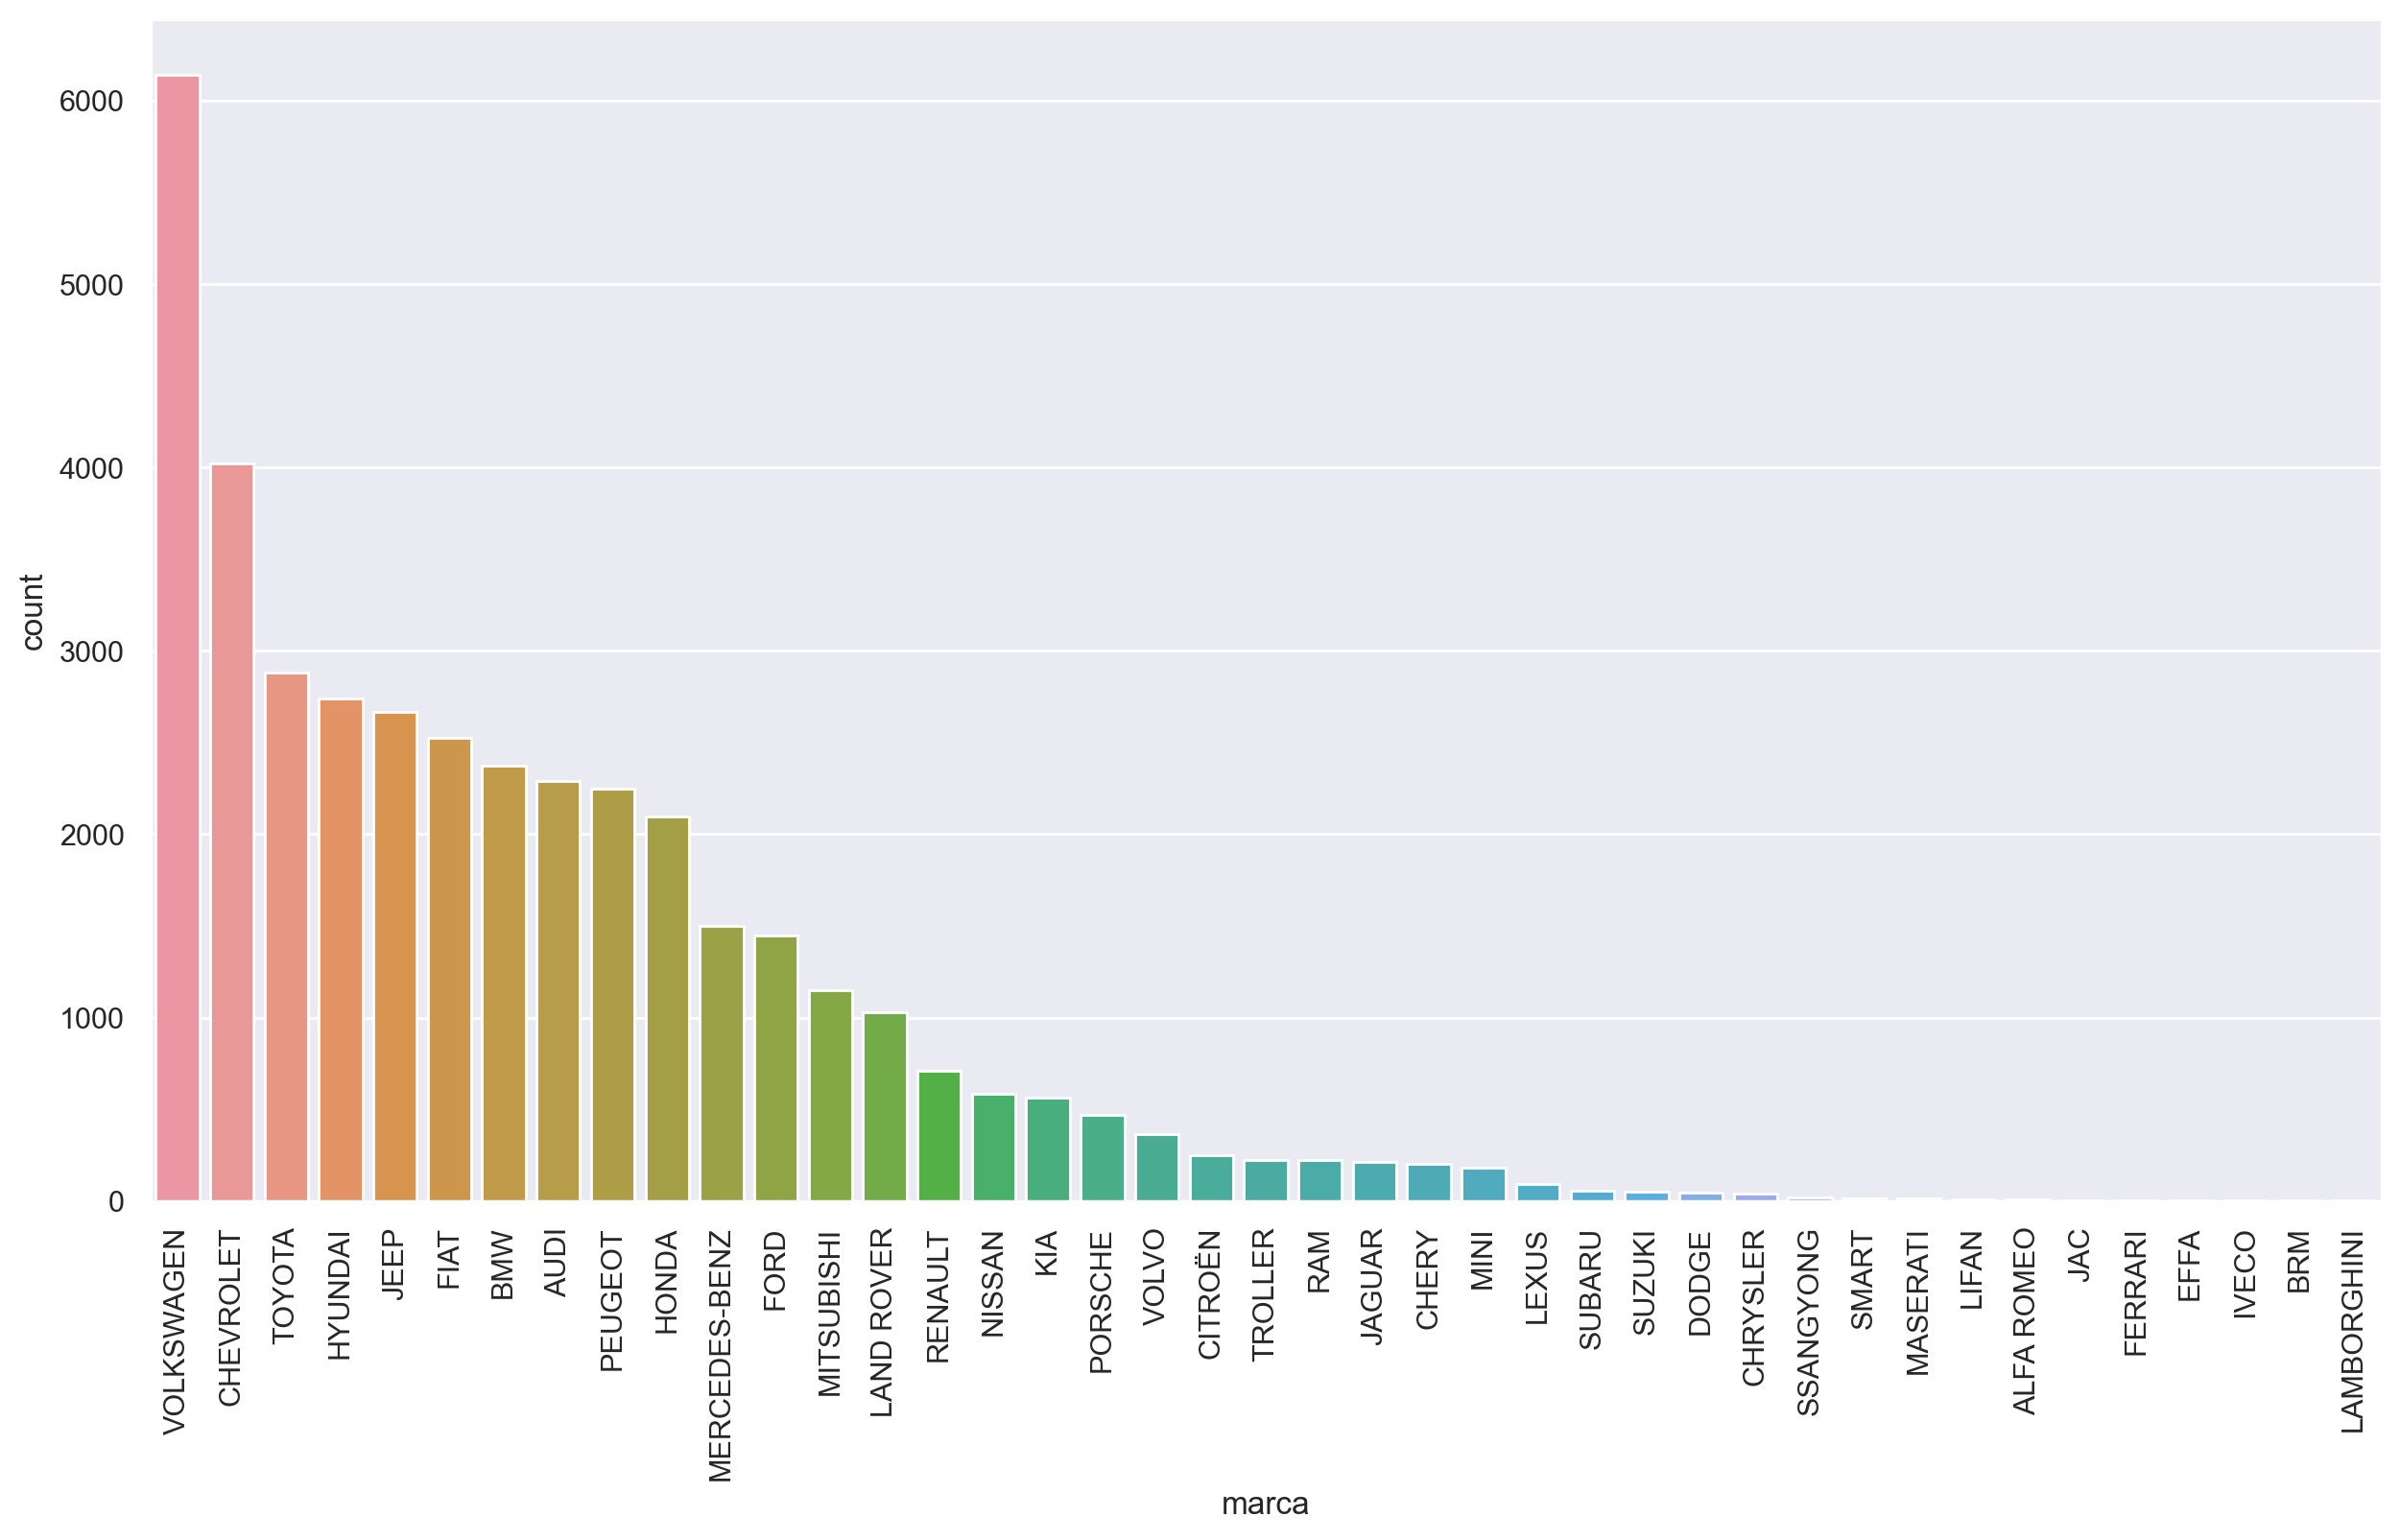

In [297]:
# Visualizing the different car names available

sns.countplot(x='marca', order=df['marca'].value_counts().index, data=df)
plt.xticks(rotation=90);

In [298]:
# Visualizing the different car names available

# plt.rcParams['figure.figsize'] = [15,8]
# ax=df['marca'].value_counts().plot(kind='bar', colormap = 'Set1')
# #ax.title.set_text('Marca')
# plt.title("Marca", fontsize = 14, fontweight = 'bold')
# plt.xlabel("Marcas dos carros",fontweight = 'bold')
# plt.ylabel("Contagem",fontweight = 'bold')

In [299]:
df.marca.value_counts(normalize=True)

VOLKSWAGEN      0.1557
CHEVROLET       0.1019
TOYOTA          0.0731
HYUNDAI         0.0695
JEEP            0.0676
FIAT            0.0640
BMW             0.0602
AUDI            0.0581
PEUGEOT         0.0569
HONDA           0.0532
MERCEDES-BENZ   0.0381
FORD            0.0366
MITSUBISHI      0.0291
LAND ROVER      0.0260
RENAULT         0.0180
NISSAN          0.0148
KIA             0.0143
PORSCHE         0.0119
VOLVO           0.0092
CITROËN         0.0063
TROLLER         0.0057
RAM             0.0056
JAGUAR          0.0054
CHERY           0.0051
MINI            0.0046
LEXUS           0.0023
SUBARU          0.0014
SUZUKI          0.0013
DODGE           0.0012
CHRYSLER        0.0010
SSANGYONG       0.0005
SMART           0.0004
MASERATI        0.0003
LIFAN           0.0003
ALFA ROMEO      0.0003
JAC             0.0001
FERRARI         0.0001
EFFA            0.0001
IVECO           0.0001
BRM             0.0000
LAMBORGHINI     0.0000
Name: marca, dtype: float64

In [300]:
df.marca.unique().size

41

**Insights:**
- Total de 41 marcas no dataset.
- Volkswagen é a marca favorita (6140/39446), 15,57% do dataset. 1,53 vezes maior que a marca em segundo lugar.
- Chevrolet fica em segundo lugar (4020/39446), 10,19% do dataset.
- Top 10 (76% do dataset): VOLKSWAGEN, CHEVROLET, TOYOTA, HYUNDAI, JEEP, FIAT, BMW, AUDI, PEUGEOT, HONDA
- As outras 31 marcas somadas representam 24% do dataset.


## Preços

Visualizing the distribution of car prices

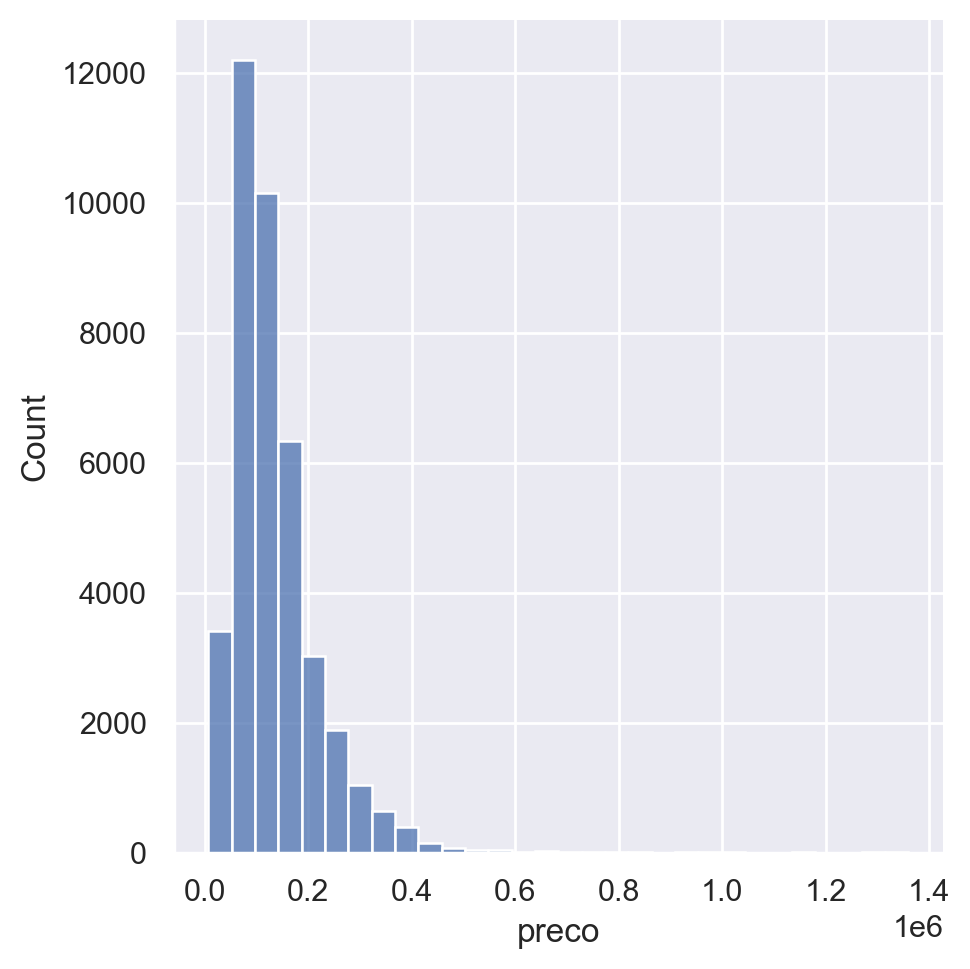

In [302]:
#plt.figure(figsize=(8,8))

#plt.title('Car Price Distribution Plot')
sns.displot(df['preco'], bins=30)

In [305]:
df.preco.describe()

count   39446.0000  
mean    133385.8743 
std     82384.9719  
min     7258.1599   
25%     76774.3217  
50%     114307.9706 
75%     163987.0043 
max     1359812.8923
Name: preco, dtype: float64

**Insights:**
- The plots seems to be right skewed, the prices of almost all cars looks like less than 400.000.
- O terceiro quartil é 163987.00

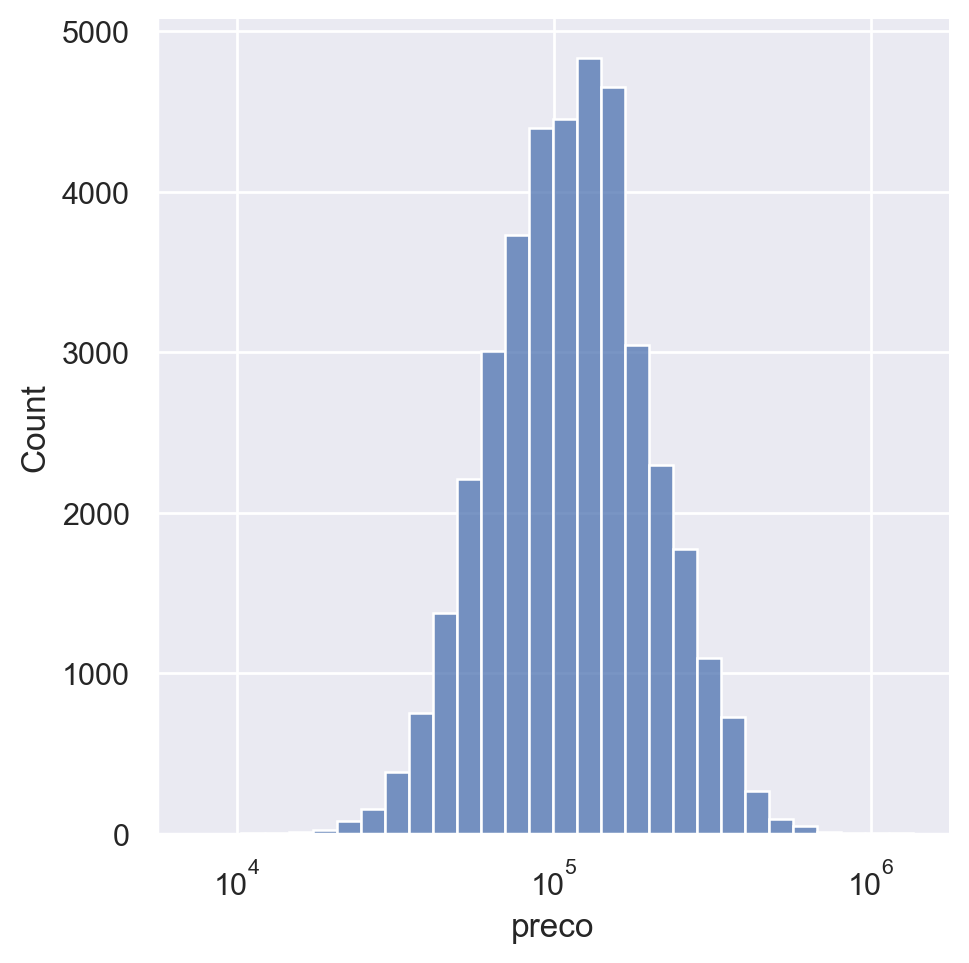

In [304]:
# Transformação logarítmica

#plt.title('Car Price Distribution Plot')
sns.displot(df['preco'], bins=30, log_scale=True)

**Insights:**
- Aplicando uma transformação logarítmica observamos que a curva se aproxima de uma gaussiana

## Variáveis Numéricas

**Visualizing Numeric Variables**

Pairplot of all the numeric variables

In [307]:
df_num.head()

num_fotos  ano_de_fabricacao  ano_modelo    odometro  num_portas  \
0  8          2017               2017       55672.0000   4            
1  8          2017               2017       47858.0000   4            
2  14         2012               2013       122323.0000  4            
3  8          2020               2021       14207.0000   2            
4  8          2015               2016       43760.0000   4            

        preco  
0 123231.9928  
1 272076.0236  
2 53411.5395   
3 299697.0719  
4 255164.3442

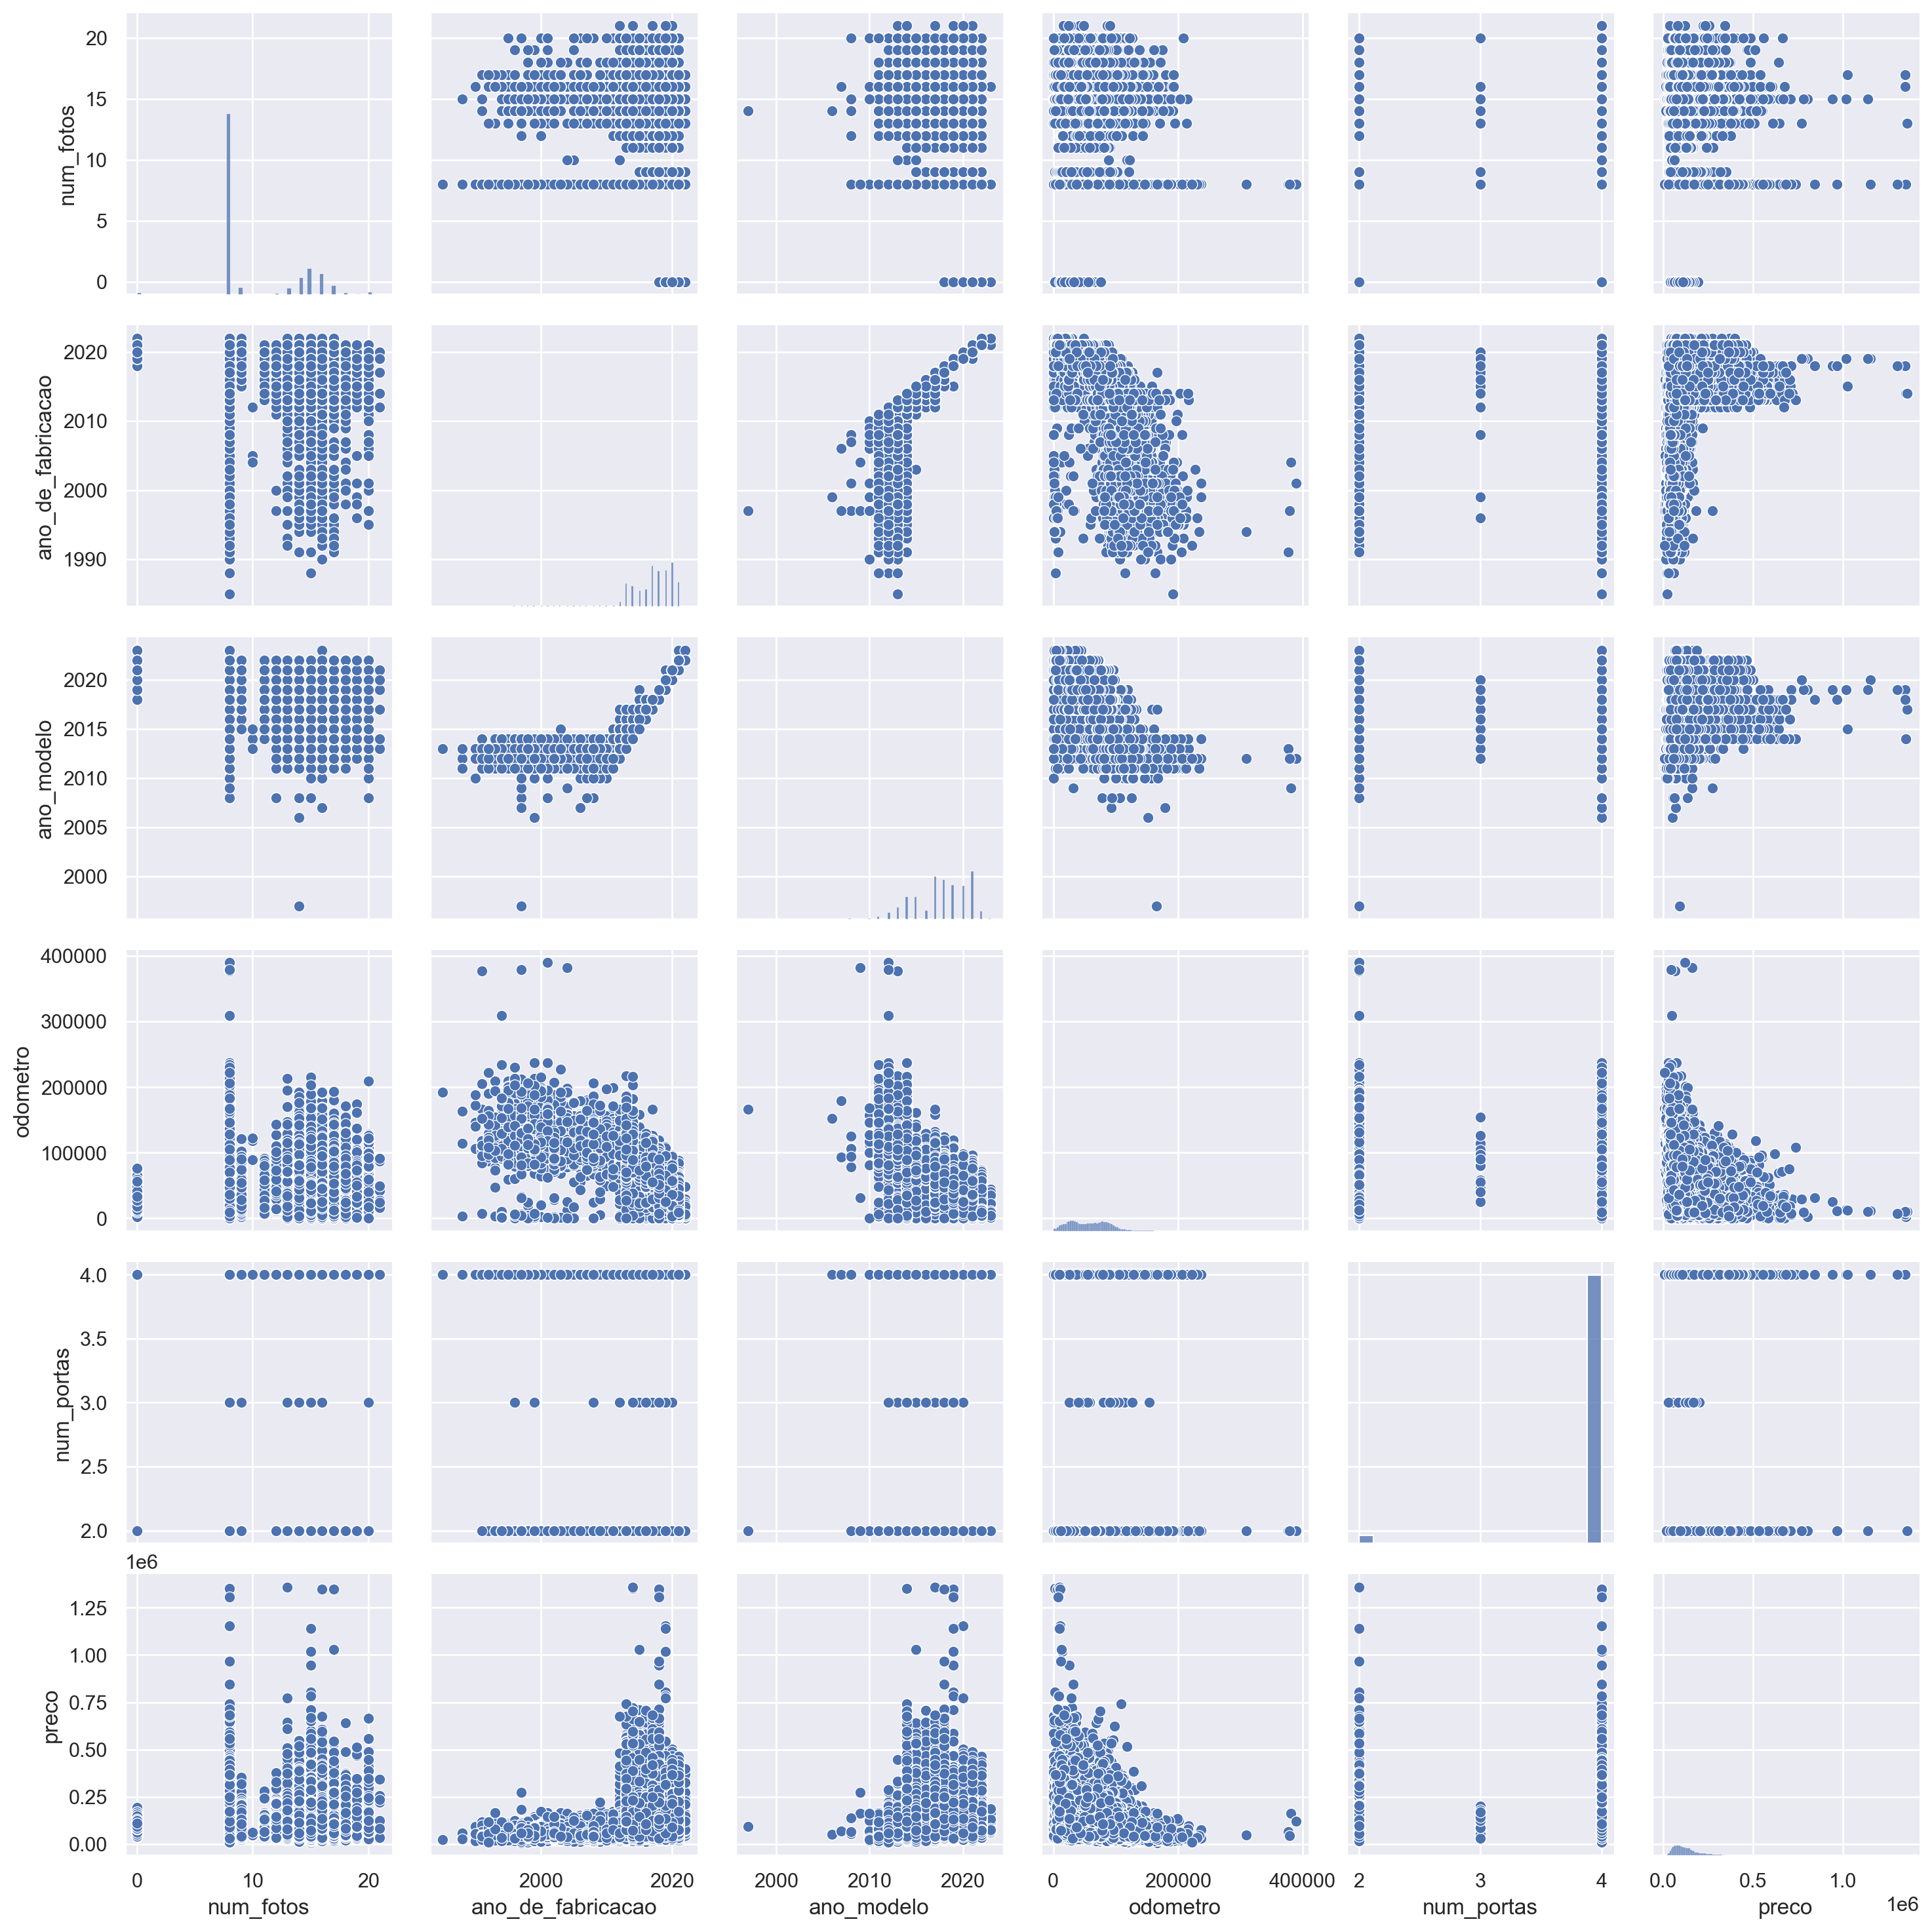

In [308]:
ax = sns.pairplot(df_num)

In [322]:
df_num.corr()

num_fotos  ano_de_fabricacao  ano_modelo  odometro  \
num_fotos         1.0000     0.0163             0.0127      0.0374      
ano_de_fabricacao 0.0163     1.0000             0.8586      -0.7287     
ano_modelo        0.0127     0.8586             1.0000      -0.7904     
odometro          0.0374     -0.7287            -0.7904     1.0000      
num_portas        0.0072     0.0768             0.0743      -0.0523     
preco             -0.0287    0.2341             0.2096      -0.3558     

                   num_portas   preco  
num_fotos         0.0072      -0.0287  
ano_de_fabricacao 0.0768      0.2341   
ano_modelo        0.0743      0.2096   
odometro          -0.0523     -0.3558  
num_portas        1.0000      -0.0773  
preco             -0.0773     1.0000

Text(0.5, 1.0, 'Count')

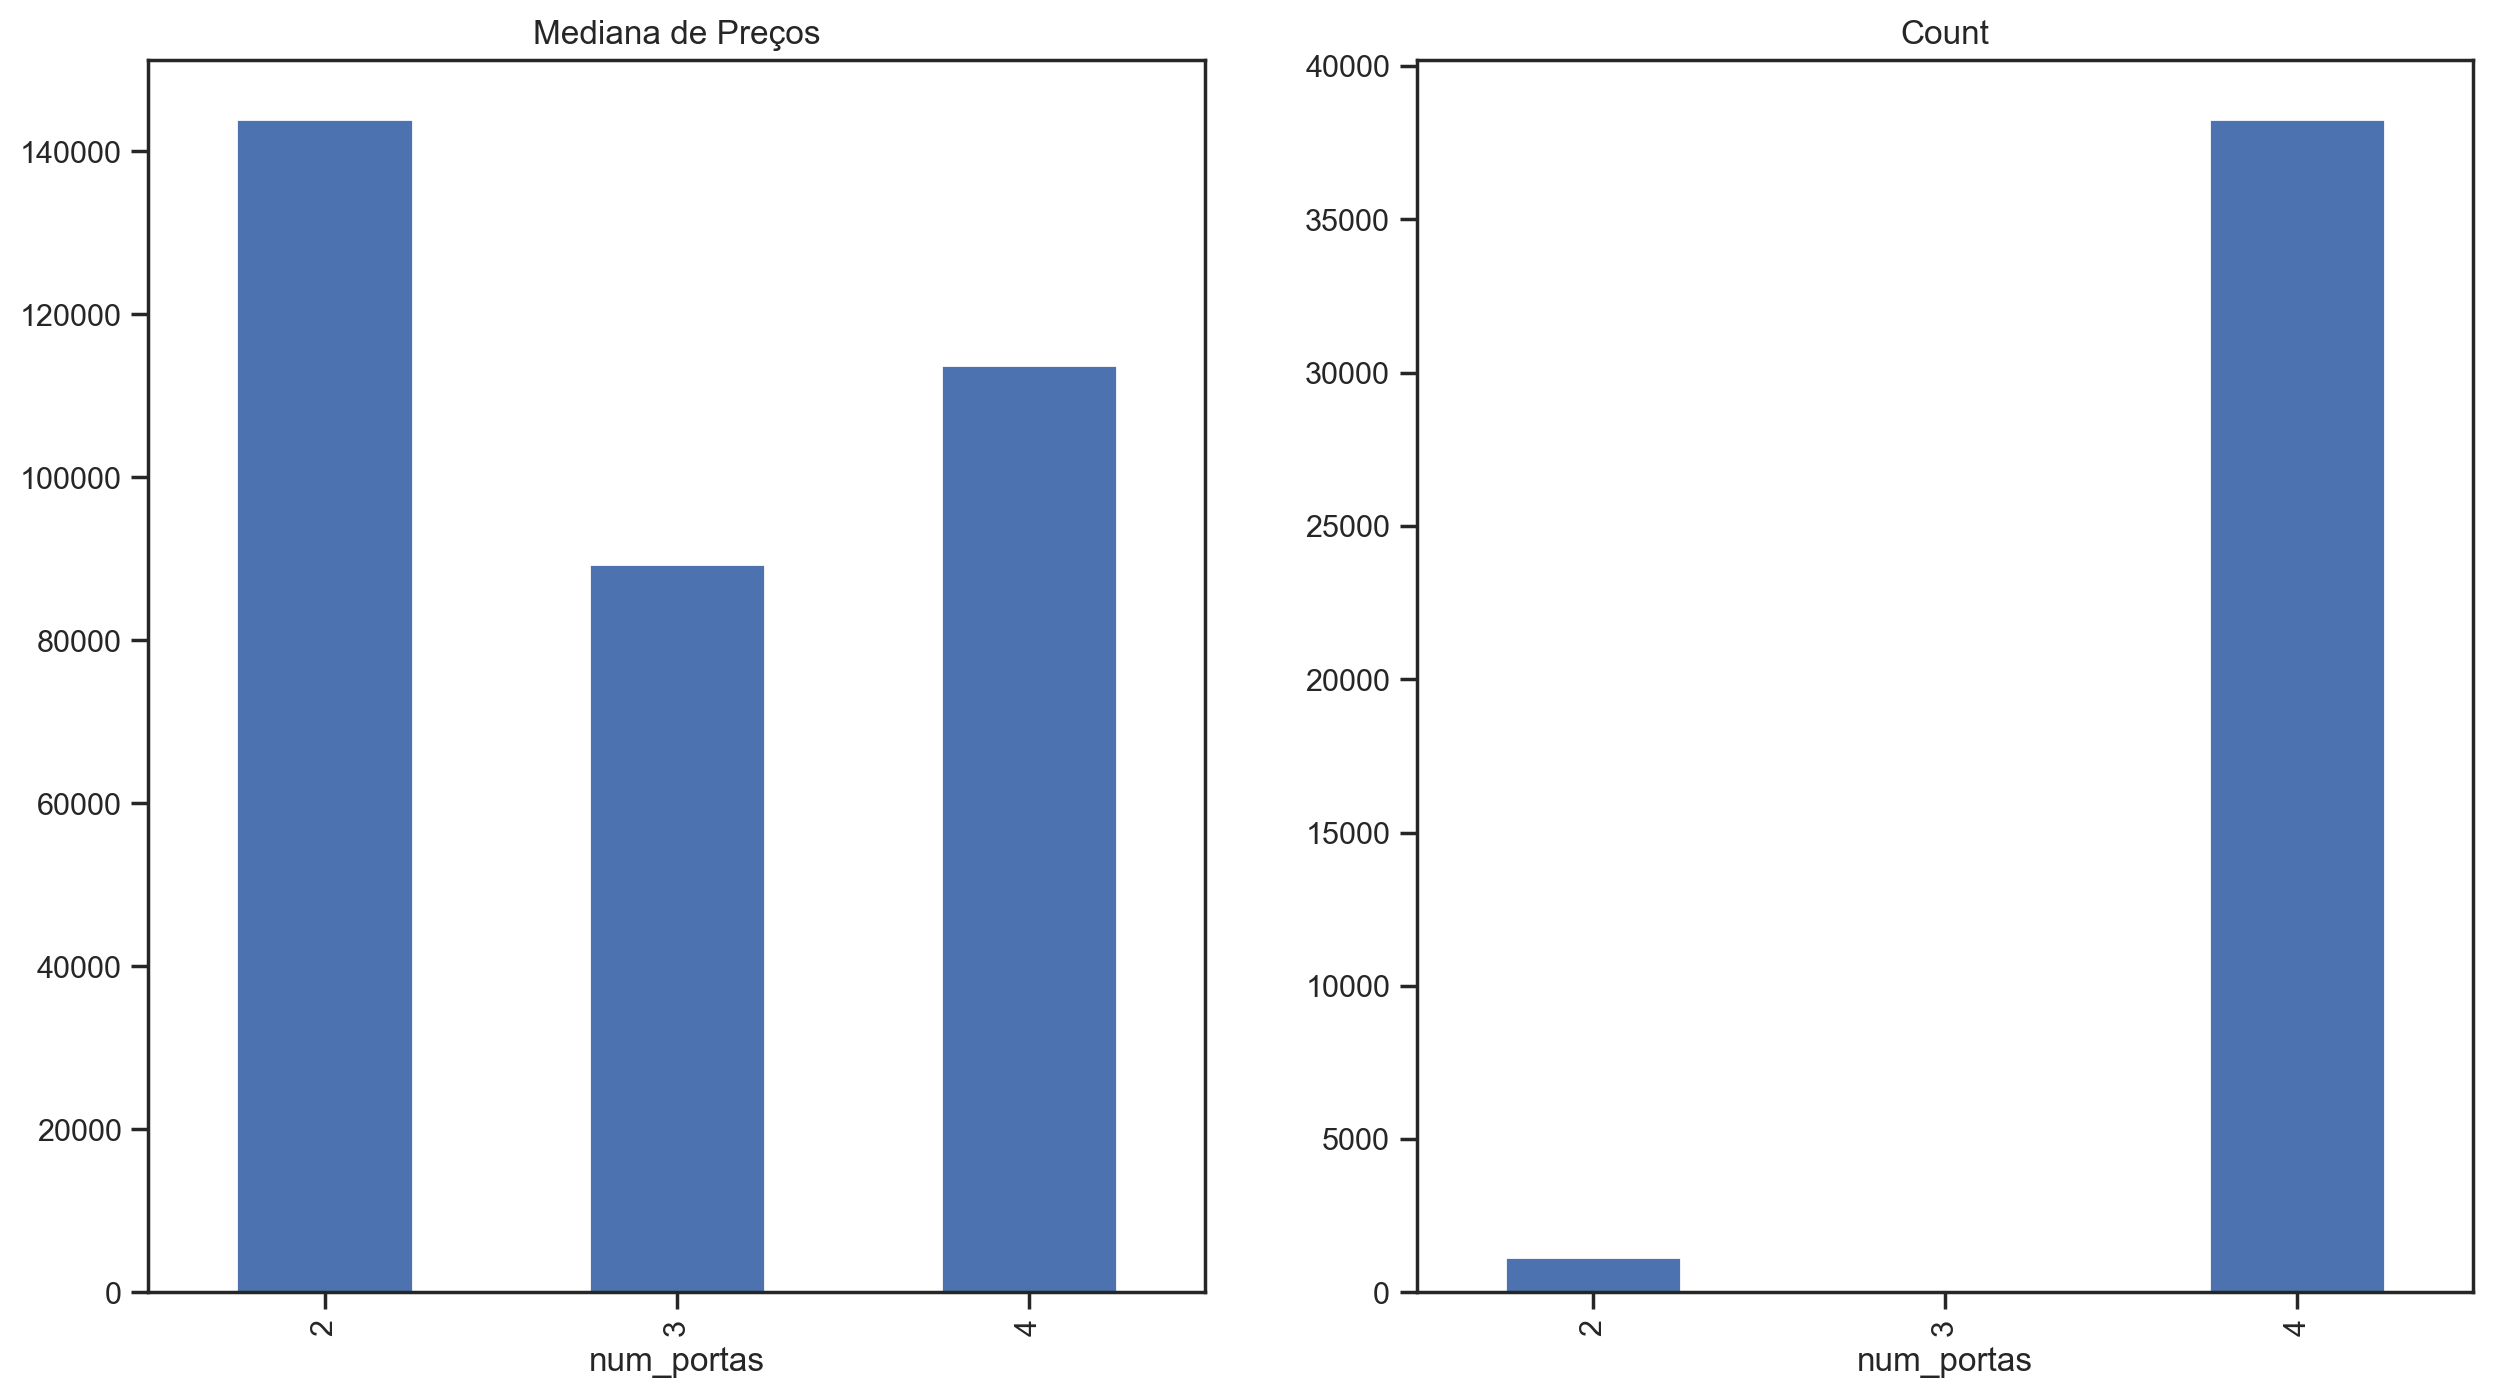

In [429]:
fig, axes = plt.subplots(1,2)

df.groupby('num_portas').preco.median().plot(kind='bar', ax=axes[0]).set_title('Mediana de Preços')
df.groupby('num_portas').preco.count().plot(kind='bar', ax=axes[1]).set_title('Count')

<AxesSubplot:xlabel='marca'>

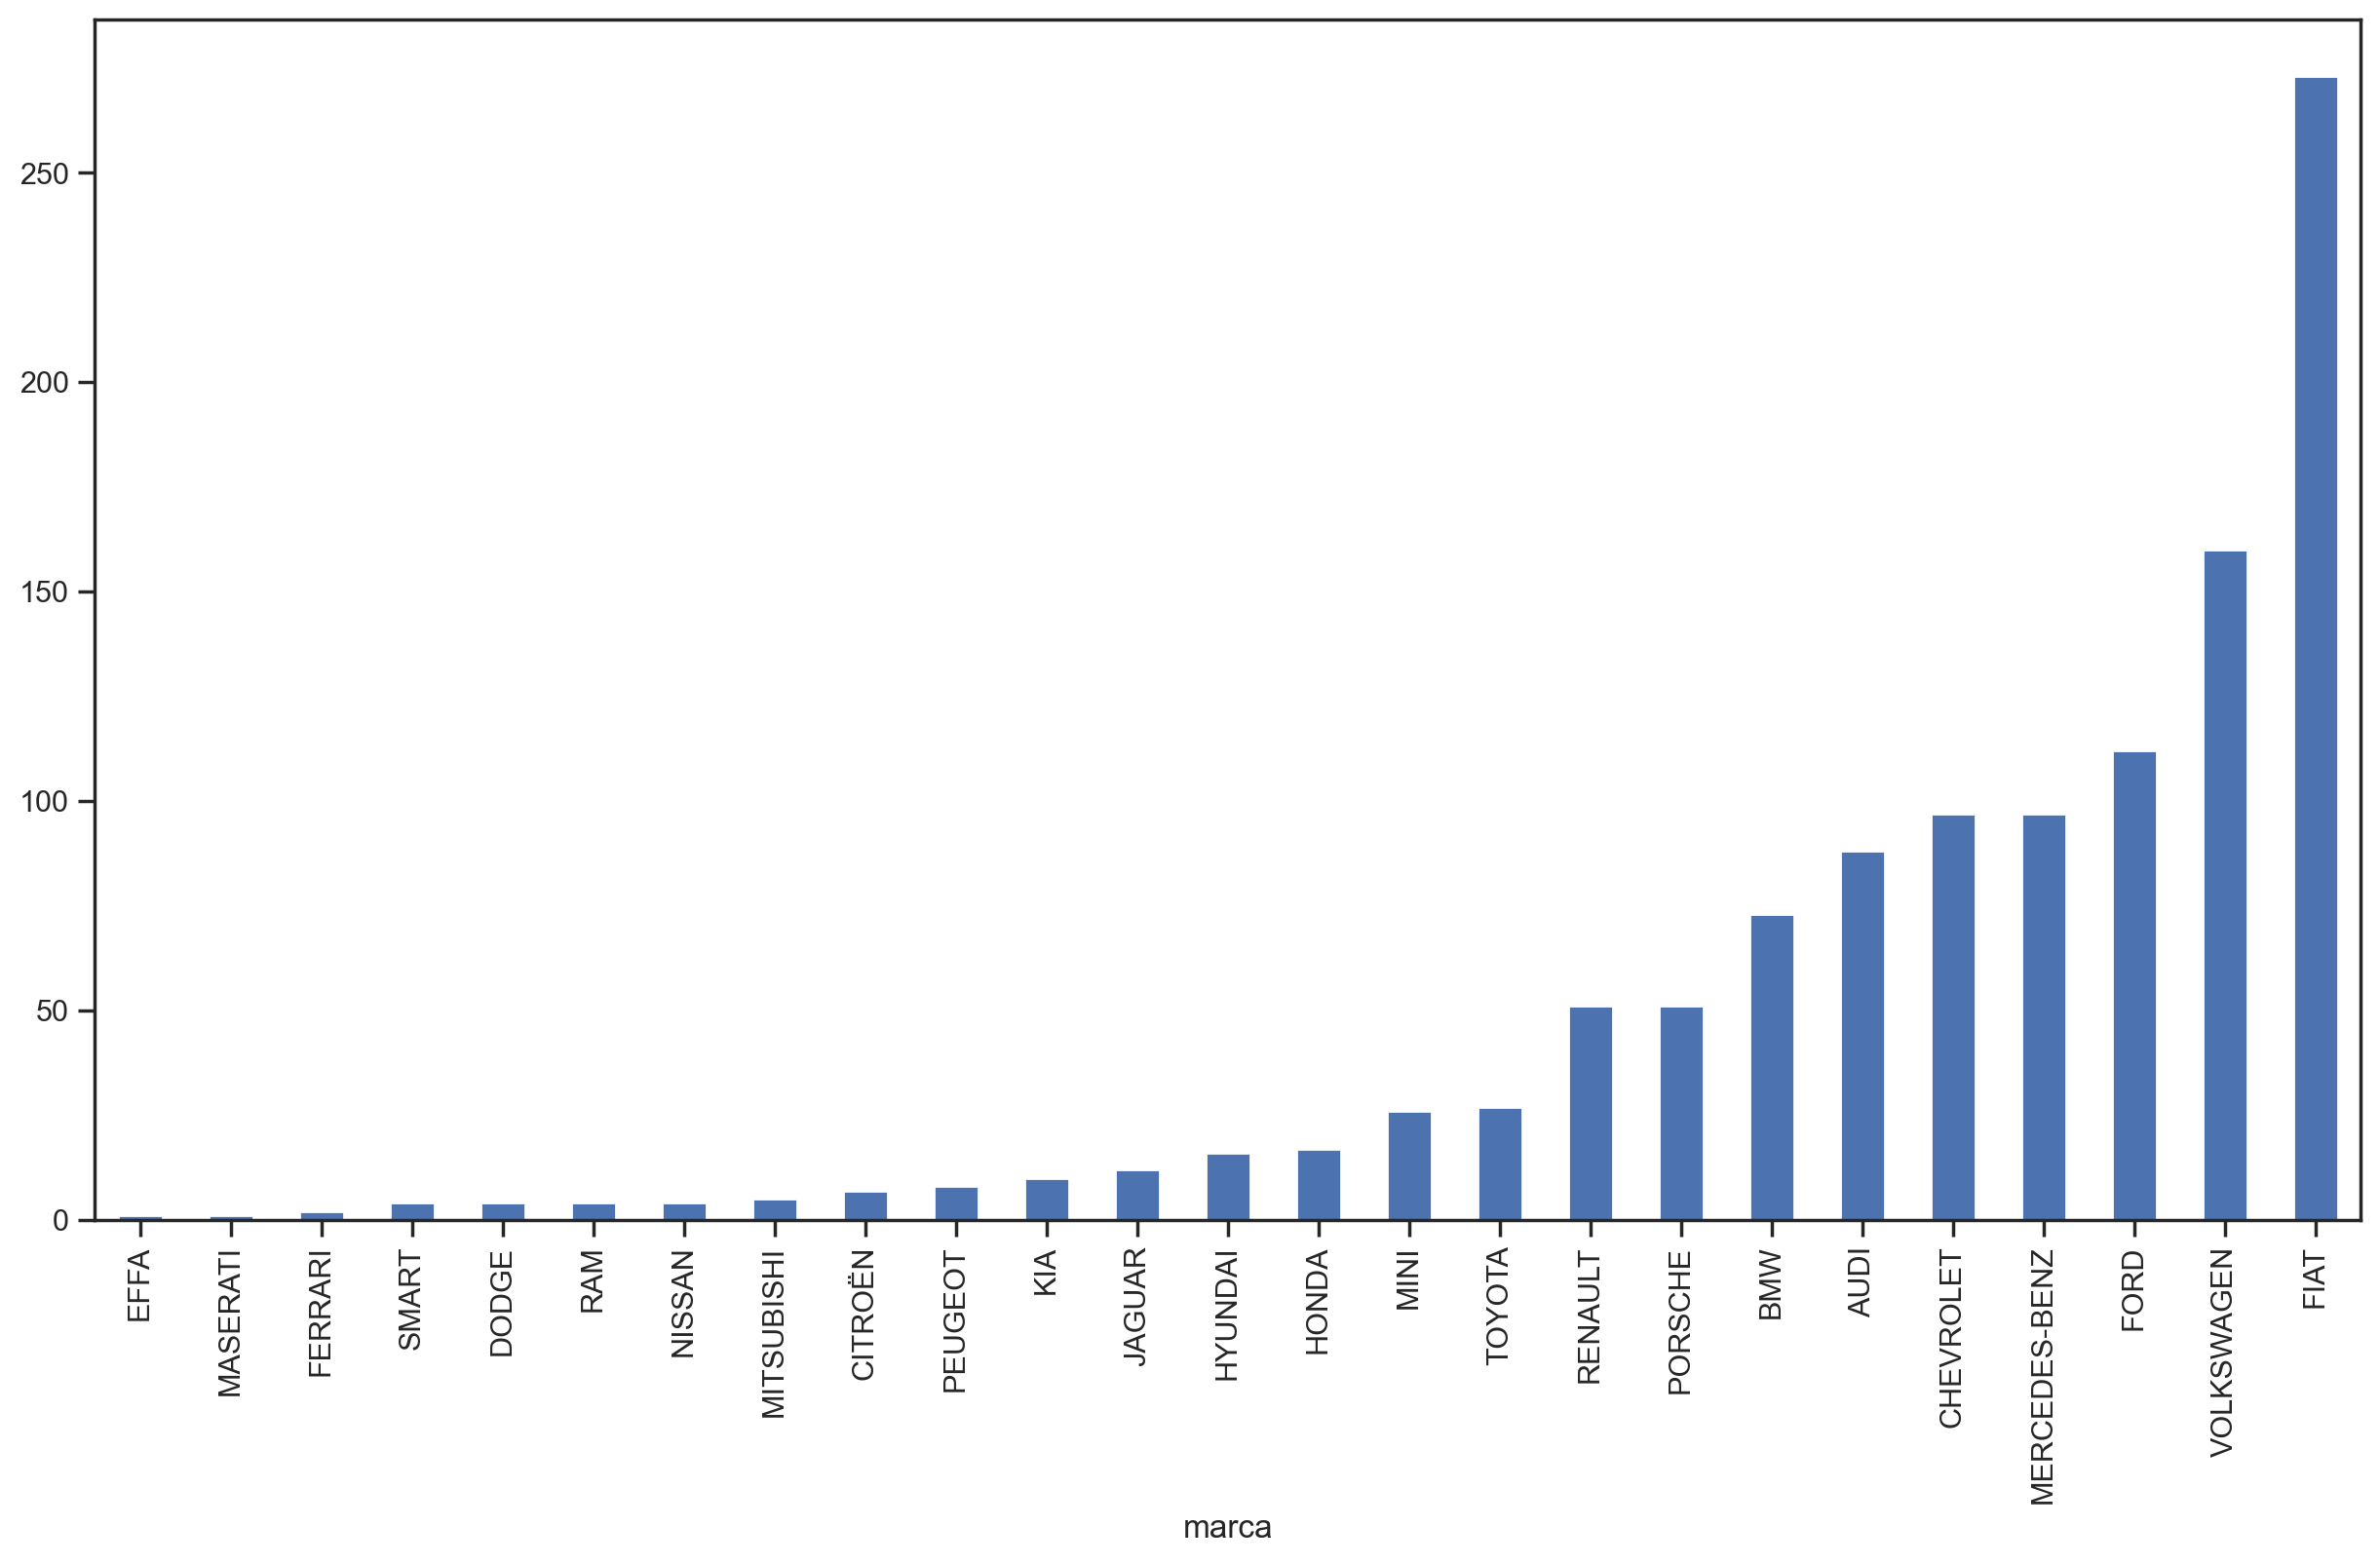

In [434]:
df.loc[df.num_portas==2].groupby('marca').preco.count().sort_values().plot(kind='bar')

**Insights**:
- num_portas parece ser um pouco relevante para o preço do carro.
- num_fotos doesn't show any significant trend with price.
- odometro - seem to have a significant negative correlation with price.

## Ano de Fabricação e Modelo

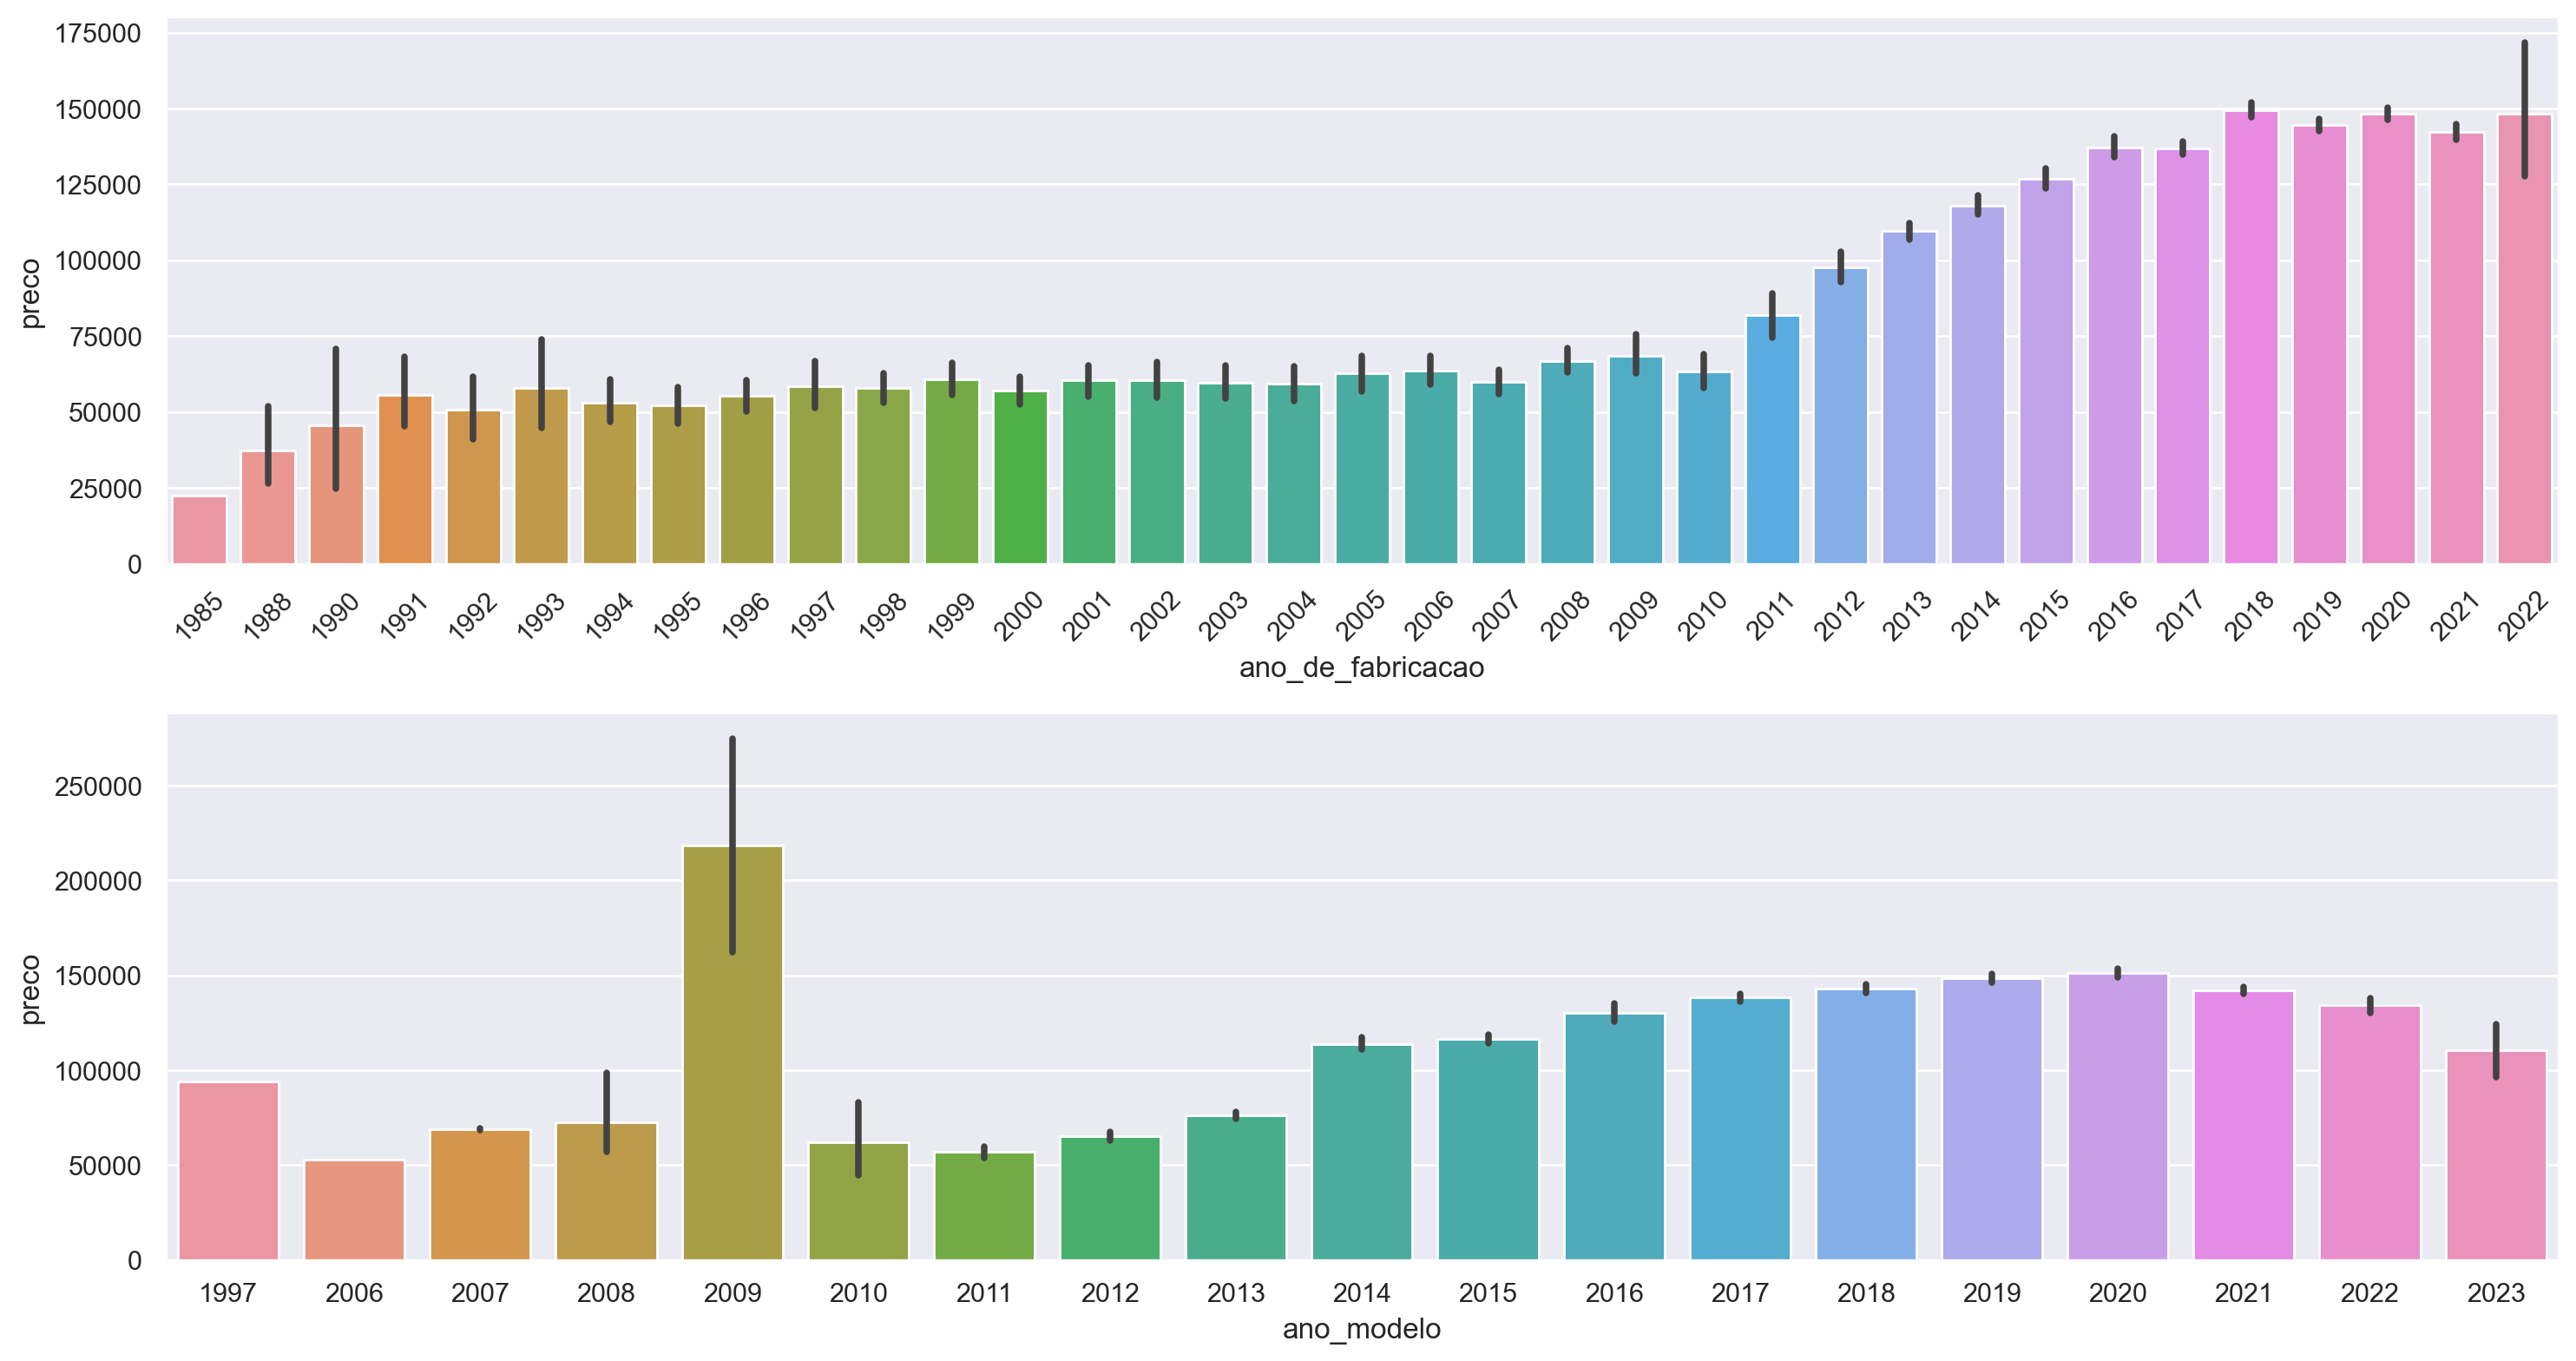

In [312]:
# Média de preços por ano de fabricação e ano do modelo com intervalo de confiança de 95%

ax1 = plt.subplot(2,1,1)
sns.barplot(x='ano_de_fabricacao', y='preco', data=df_num, ax=ax1)
plt.xticks(rotation=45)

ax2 = plt.subplot(2,1,2)
sns.barplot(x='ano_modelo', y='preco', data=df_num, ax=ax2)

plt.tight_layout()

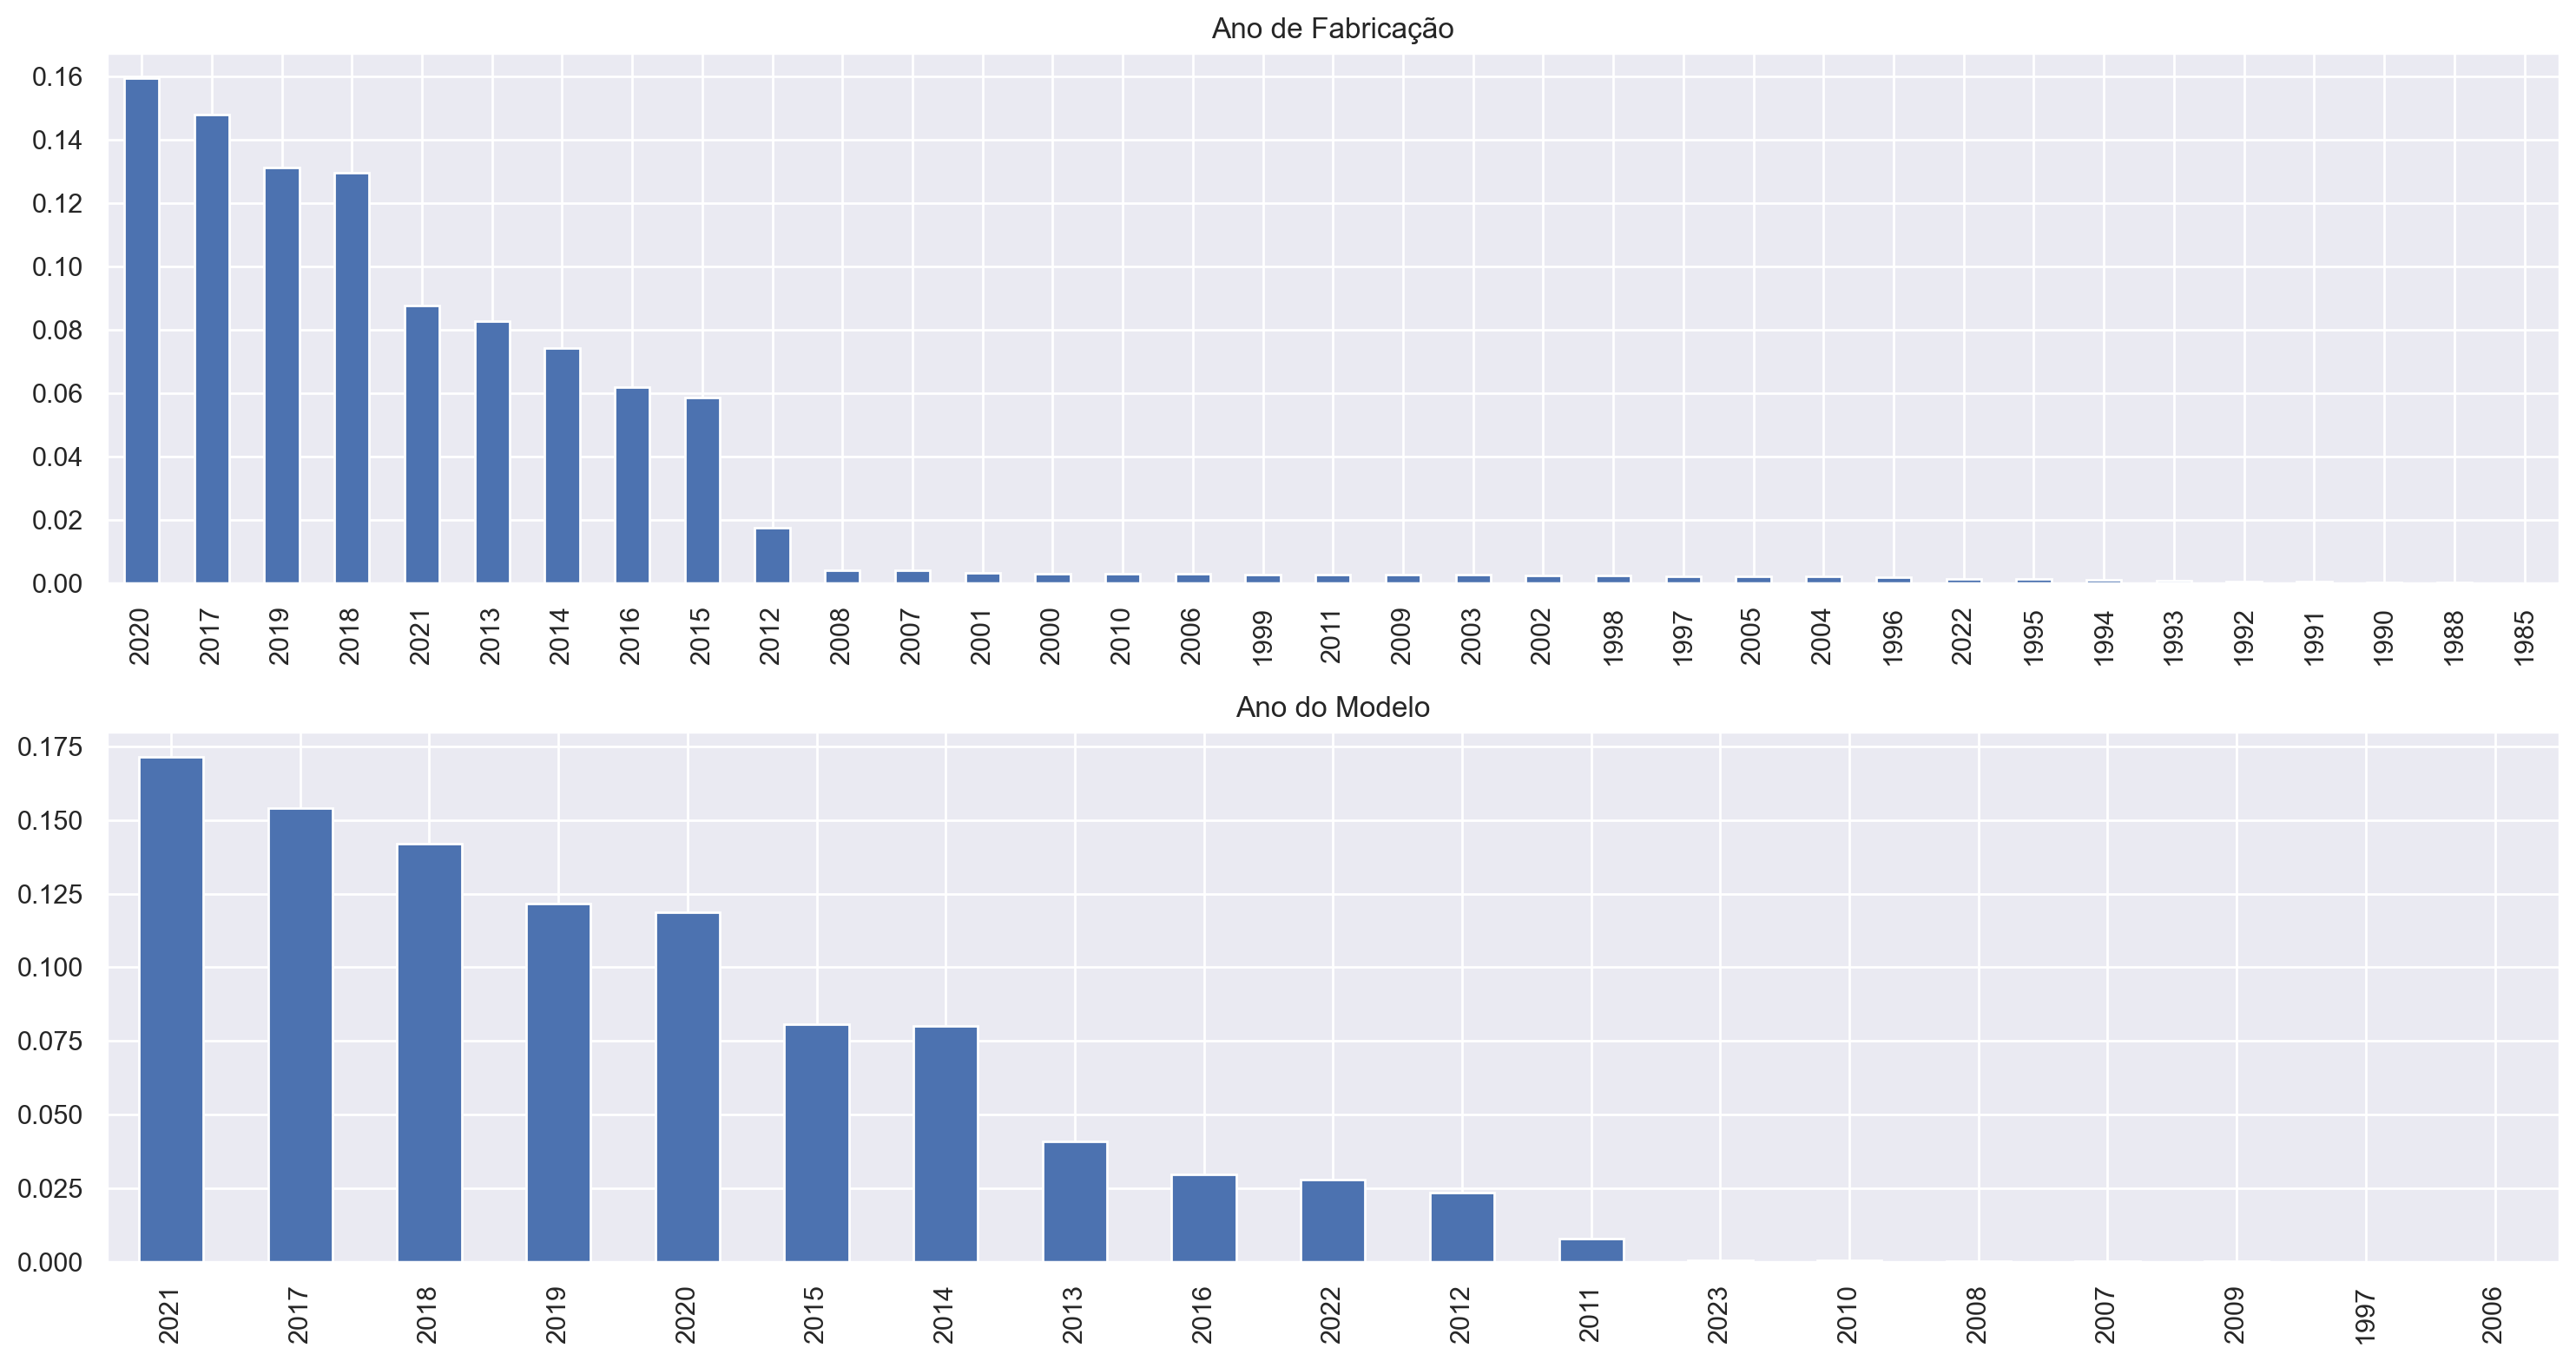

In [327]:
fig, axes = plt.subplots(nrows=2, ncols=1)

df.ano_de_fabricacao.value_counts(normalize=True).plot(kind='bar', ax=axes[0]).set_title('Ano de Fabricação')
df.ano_modelo.value_counts(normalize=True).plot(kind='bar', ax=axes[1]).set_title('Ano do Modelo')
plt.tight_layout()

In [323]:
# Investigando o ano de 2009

df.loc[df.ano_modelo==2009]

num_fotos marca modelo  ano_de_fabricacao  ano_modelo    odometro  \
21412  8          KIA   BONGO  2004               2009       381728.0000   
34253  8          AUDI  TTS    1997               2009       31432.0000    

           cambio  num_portas    tipo blindado     cor tipo_vendedor  \
21412  Manual      2           Picape  N        Branco  PF             
34253  Automática  2           Picape  N        Branco  PF             

      cidade_vendedor estado_vendedor   tipo_anuncio entrega_delivery  troca  \
21412  Ilha Solteira   São Paulo (SP)  Pessoa Física  False            False   
34253  São Paulo       São Paulo (SP)  Pessoa Física  False            False   

      elegivel_revisao attr_veiculo_aceita_troca attr_veiculo_único_dono  \
21412  False            Aceita troca              NaN                      
34253  False            Aceita troca              NaN                      

      attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
21412  NaN                                                        
34253  NaN                                                        

      attr_veiculo_ipva_pago attr_veiculo_licenciado  \
21412  IPVA pago              Licenciado               
34253  IPVA pago              Licenciado               

      attr_veiculo_garantia_de_fábrica  \
21412  NaN                               
34253  NaN                               

      attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro       preco  
21412  NaN                                                       162013.5102  
34253  NaN                                                       274590.4397

In [333]:
print(f'Apenas {len(df.loc[df.ano_de_fabricacao<2012])*100/len(df):.2f}% dos carros foram fabricados antes de 2012.')
print(f'Apenas {len(df.loc[df.ano_modelo<2012])*100/len(df):.2f}% dos carros são de modelos anteriores ao ano de 2012.')

Apenas 4.73% dos carros foram fabricados antes de 2012.
Apenas 0.84% dos carros são de modelos anteriores ao ano de 2012.


In [321]:
# Correlação das duas variáveis

df['ano_de_fabricacao'].corr(df['ano_modelo'])

0.8585951668713082

**Insights:**
- ano_fabricacao: a média de preços aumenta a partir de 2011, se estabilizando por volta de 2016.
- ano_modelo: a média de preços aumenta um pouco a partir de 2014. Em 2009 há um pico devido a apenas dois carros cadastrados com um valor acima de 160.000 reais.
- Em vários casos o ano_modelo e ano_de_fabricacao estão muito distantes. Talvez seja um erro no cadastro ou uma interpretação errada que estou fazendo.
- A correlação entre as duas variáveis é bem alta (0.86). Posso excluir uma delas futuramente.
- Apenas 4.73% dos carros foram fabricados antes de 2012.
- Apenas 0.84% dos carros são de modelos anteriores ao ano de 2012.


In [410]:
sns.displot(data=df, kind="ecdf", x="ano_de_fabricacao", rug=True)
sns.displot(data=df, kind="ecdf", x="ano_modelo", rug=True)

## Tipos

In [344]:
fig, axes = plt.subplots(1,2)

df.groupby('tipo').preco.median().plot(kind='bar', ax=axes[0]).set_title('Mediana de Preços por Tipo de Carro')
df.groupby('tipo').preco.count().plot(kind='bar', ax=axes[1]).set_title('Contagem de Preços por Tipo de Carro')
plt.tight_layout()

**Insights:**
- Sedã 21,910 - 56%
- Hatchback 6,570 - 17%
- Picape 6,426 - 16%
- Utilitário esportivo 4,458 - 11%
- Perua/SW 37 - <1%
- Cupê 34 - <1%
- Minivan 10 - <1%
- Conversível 1 - <1%

In [334]:
sns.catplot(x='tipo', y='preco', kind='bar', data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='preco', ylabel='Count'>

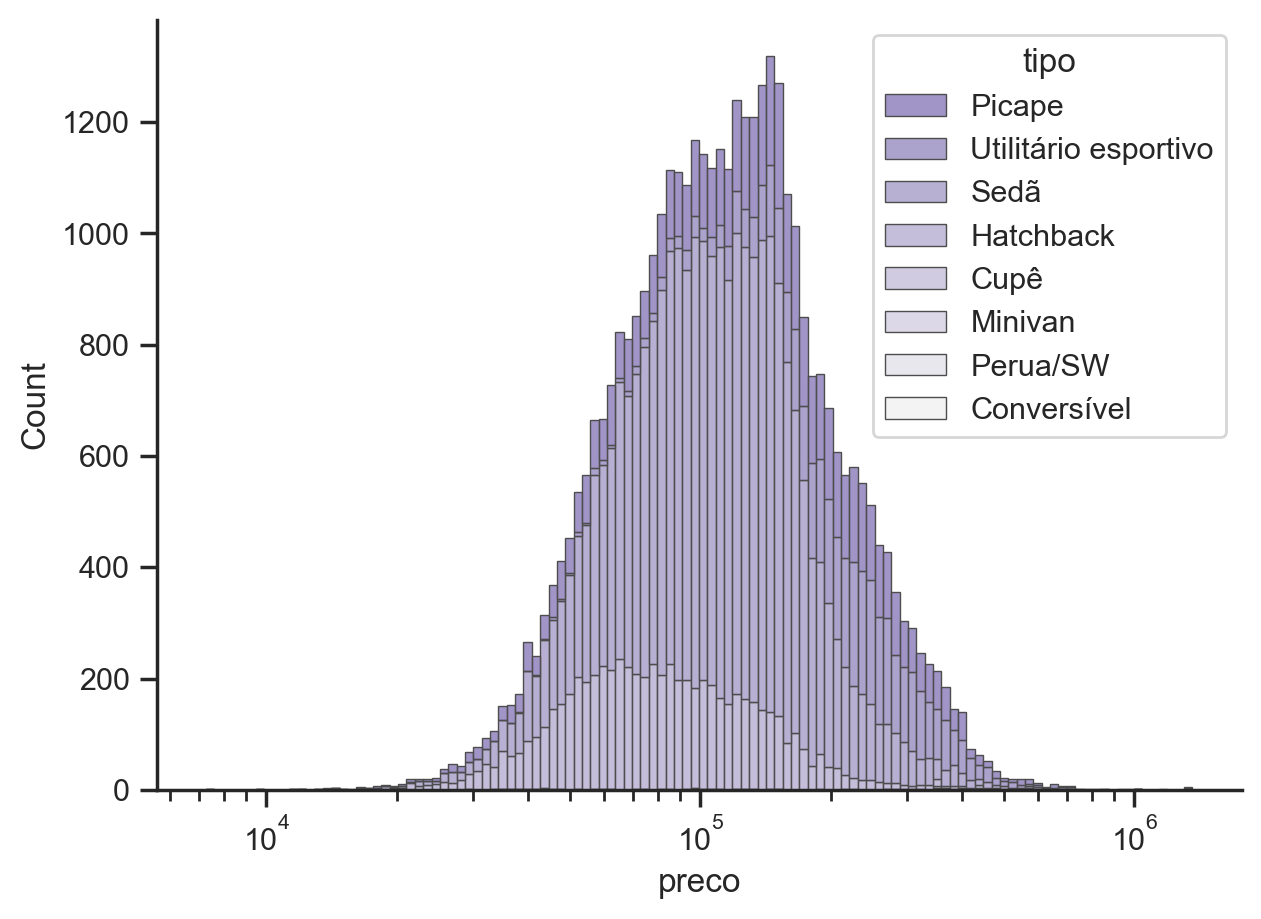

In [392]:
# Stacked histogram on a log scale

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="preco", hue="tipo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [393]:
df['tipo'].value_counts().index

Index(['Sedã', 'Hatchback', 'Picape', 'Utilitário esportivo', 'Perua/SW',
       'Cupê', 'Minivan', 'Conversível'],
      dtype='object')

In [408]:
sns.displot(data=df, kind="ecdf", x="preco", hue="tipo", rug=True)

In [419]:
sns.jointplot(data=df, x="ano_modelo", y="preco", hue="tipo", alpha=0.5)

In [422]:
# Carros acima de 1M.
df_auto.loc[df.preco>1000000,['versao','preco','tipo','marca','modelo']]

versao        preco  \
1123   6.7 I6 TURBO DIESEL LARAMIE CD 4X4 AUTOMÁTICO 1154360.1655   
1594   5.2 V10 GASOLINA LP 580-2 LDF                 1352089.1299   
4204   3.0 V6 P380 GASOLINA R-DYNAMIC HSE AUTOMÁTICO 1349747.7114   
6512   3.0 24V I6 GASOLINA COMPETITION COUPÉ M DCT   1019840.6147   
20969  3.0 24V H6 GASOLINA TARGA 4S PDK              1359812.8923   
27078  2.0 16V H4 GASOLINA CAYMAN PDK                1028431.2642   
32004  3.0 24V H6 GASOLINA TARGA 4 GTS PDK           1140112.6509   
32390  3.0 24V H6 GASOLINA TARGA 4 GTS PDK           1346822.7072   
39377  2.9 V6 E-HYBRID 4 PDK                         1305782.4401   

                       tipo        marca             modelo  
1123   Picape                RAM          2500               
1594   Cupê                  LAMBORGHINI  HURACÁN            
4204   Utilitário esportivo  LAND ROVER   RANGE ROVER VELAR  
6512   Cupê                  BMW          M2                 
20969  Picape                PORSCHE      911                
27078  Picape                PORSCHE      718                
32004  Picape                PORSCHE      911                
32390  Cupê                  PORSCHE      911                
39377  Sedã                  PORSCHE      PANAMERA

**Insights:**
- Aqui podemos observar que alguns carros tem tipo errado. O Porsche 911 é classificado como picape e sedã.


In [184]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

## Câmbio, Cor, Tipo de Anúncio, Blindado, Tipo de Vendedor 

In [343]:
df_cat

marca  modelo      cambio                  tipo blindado     cor  \
0      VOLKSWAGEN  AMAROK  Automática  Picape                N        Preto    
1      JAGUAR      F-PACE  Automática  Utilitário esportivo  N        Branco   
2      CHEVROLET   CRUZE   Automática  Sedã                  N        Prata    
3      PORSCHE     718     Automática  Picape                N        Branco   
4      VOLVO       XC90    Automática  Utilitário esportivo  N        Preto    
...      ...        ...           ...                   ... ..          ...    
39441  VOLKSWAGEN  FOX     Manual      Sedã                  N        Prata    
39442  BMW         120i    Automática  Hatchback             N        Branco   
39443  PEUGEOT     2008    Automática  Sedã                  N        Cinza    
39444  VOLKSWAGEN  AMAROK  Automática  Sedã                  N        Branco   
39445  PORSCHE     MACAN   Automática  Utilitário esportivo  S        Preto    

      tipo_vendedor cidade_vendedor         estado_vendedor    tipo_anuncio  \
0      PF            São Paulo       São Paulo (SP)          Pessoa Física    
1      PF            Rio de Janeiro  Rio Grande do Sul (RS)  Pessoa Física    
2      PJ            Rio de Janeiro  São Paulo (SP)          Loja             
3      PF            São Paulo       São Paulo (SP)          Pessoa Física    
4      PF            Ribeirão Preto  São Paulo (SP)          Pessoa Física    
...    ..                       ...             ...                    ...    
39441  PJ            Fortaleza       Ceará (CE)              Loja             
39442  PJ            Santos          São Paulo (SP)          Loja             
39443  PF            São Paulo       São Paulo (SP)          Pessoa Física    
39444  PJ            Campinas        São Paulo (SP)          Concessionária   
39445  PF            São Paulo       São Paulo (SP)          Pessoa Física    

      entrega_delivery  troca elegivel_revisao attr_veiculo_aceita_troca  \
0      False            False  False            Aceita troca               
1      False            False  False            Aceita troca               
2      True             True   False            Aceita troca               
3      False            False  False            Aceita troca               
4      False            False  False            Aceita troca               
...      ...              ...    ...                     ...               
39441  False            False  False            Aceita troca               
39442  True             True   False            Aceita troca               
39443  False            False  False            NaN                        
39444  True             False  False            Aceita troca               
39445  False            False  False            Aceita troca               

      attr_veiculo_único_dono  \
0      NaN                      
1      NaN                      
2      NaN                      
3      NaN                      
4      NaN                      
...    ...                      
39441  Único dono               
39442  NaN                      
39443  Único dono               
39444  NaN                      
39445  NaN                      

      attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
0      Todas as revisões feitas pela concessionária               
1      Todas as revisões feitas pela concessionária               
2      NaN                                                        
3      Todas as revisões feitas pela concessionária               
4      Todas as revisões feitas pela concessionária               
...                                             ...               
39441  NaN                                                        
39442  NaN                                                        
39443  Todas as revisões feitas pela concessionária               
39444  NaN                                                        
39445  NaN                                             

In [174]:
# Outra forma de fazer o gráfico abaixo

# plt.figure(figsize=(20, 15))
# plt.subplot(3,3,1)
# #sns.barplot(x = 'marca', y = 'preco', data = df_auto)
# plt.subplot(3,3,2)
# plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.boxplot(x = 'cambio', y = 'preco', data = df_auto)
# plt.subplot(3,3,3)
# plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.boxplot(x = 'tipo', y = 'preco', data = df_auto)
# plt.subplot(3,3,4)
# sns.boxplot(x = 'blindado', y = 'preco', data = df_auto)
# plt.subplot(3,3,5)
# sns.boxplot(x = 'cor', y = 'preco', data = df_auto)
# plt.subplot(3,3,6)
# sns.boxplot(x = 'tipo_vendedor', y = 'preco', data = df_auto)
# plt.subplot(3,3,7)
# #sns.boxplot(x = 'estado_vendedor', y = 'preco', data = df_auto)
# plt.subplot(3,3,8)
# plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.boxplot(x = 'tipo_anuncio', y = 'preco', data = df_auto)
# plt.subplot(3,3,9)
# sns.boxplot(x = 'attr_veiculo_aceita_troca', y = 'preco', data = df_auto)
# plt.show()

Comando para ajustar espaços entre subplots

plt.subplots_adjust(hspace=0.4, wspace=0.4)

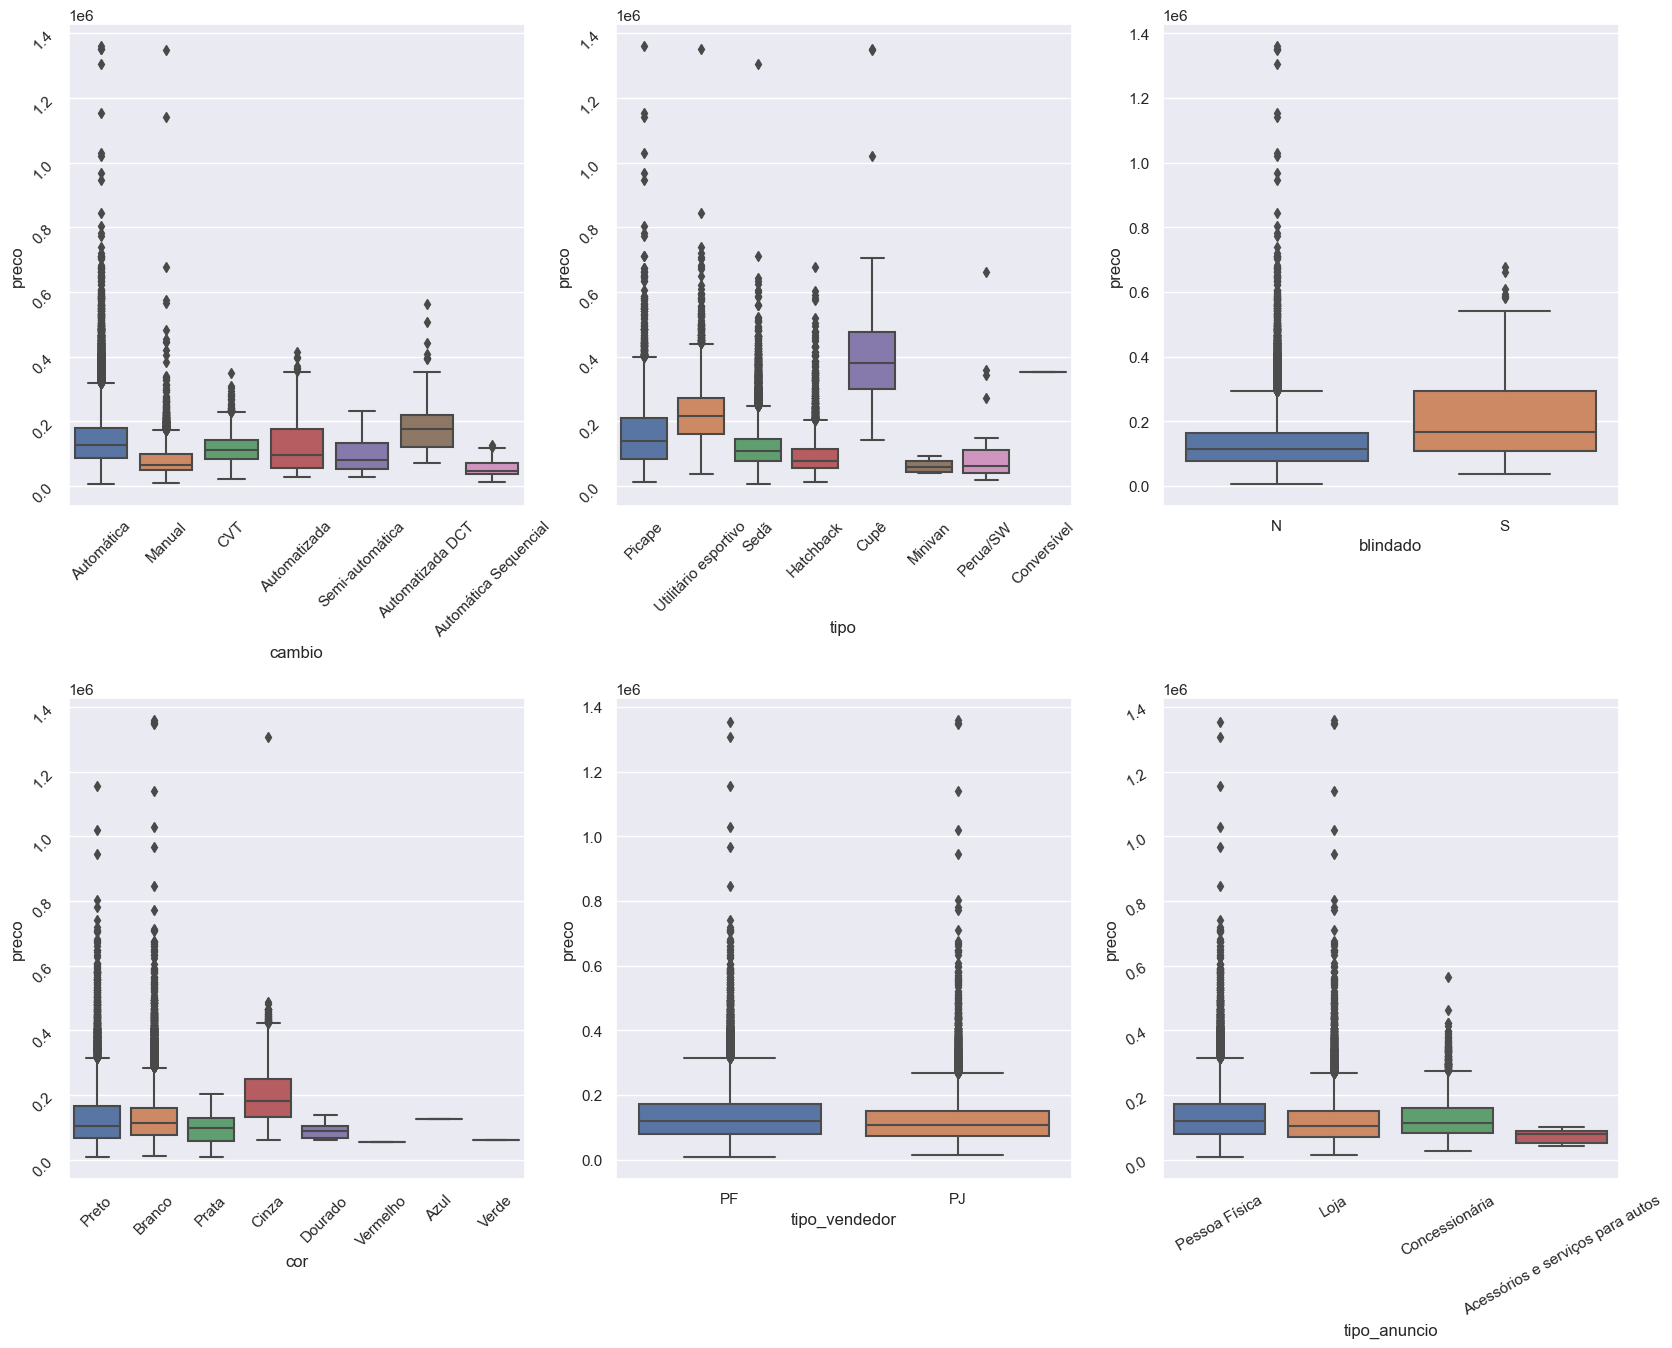

In [130]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(2, 3, hspace=0.4)
axs = gs.subplots()

sns.boxplot(x = 'cambio', y = 'preco', data = df_auto, ax=axs[0,0])
#plt.xticks(rotation=45)
axs[0,0].tick_params(labelrotation=45)

sns.boxplot(x = 'tipo', y = 'preco', data = df_auto, ax=axs[0,1])
axs[0,1].tick_params(labelrotation=45)

sns.boxplot(x = 'blindado', y = 'preco', data = df_auto, ax=axs[0,2])

sns.boxplot(x = 'cor', y = 'preco', data = df_auto, ax=axs[1,0])
axs[1,0].tick_params(labelrotation=45)

sns.boxplot(x = 'tipo_vendedor', y = 'preco', data = df_auto, ax=axs[1,1])

sns.boxplot(x = 'tipo_anuncio', y = 'preco', data = df_auto, ax=axs[1,2])
axs[1,2].tick_params(labelrotation=30)

plt.show()

In [377]:
for ax in axes:
    # Rest of the code
    ax[0].tick_params(labelsize=8)
    ax[1].tick_params(labelsize=8)
    print(1)

1
1
1
1
1


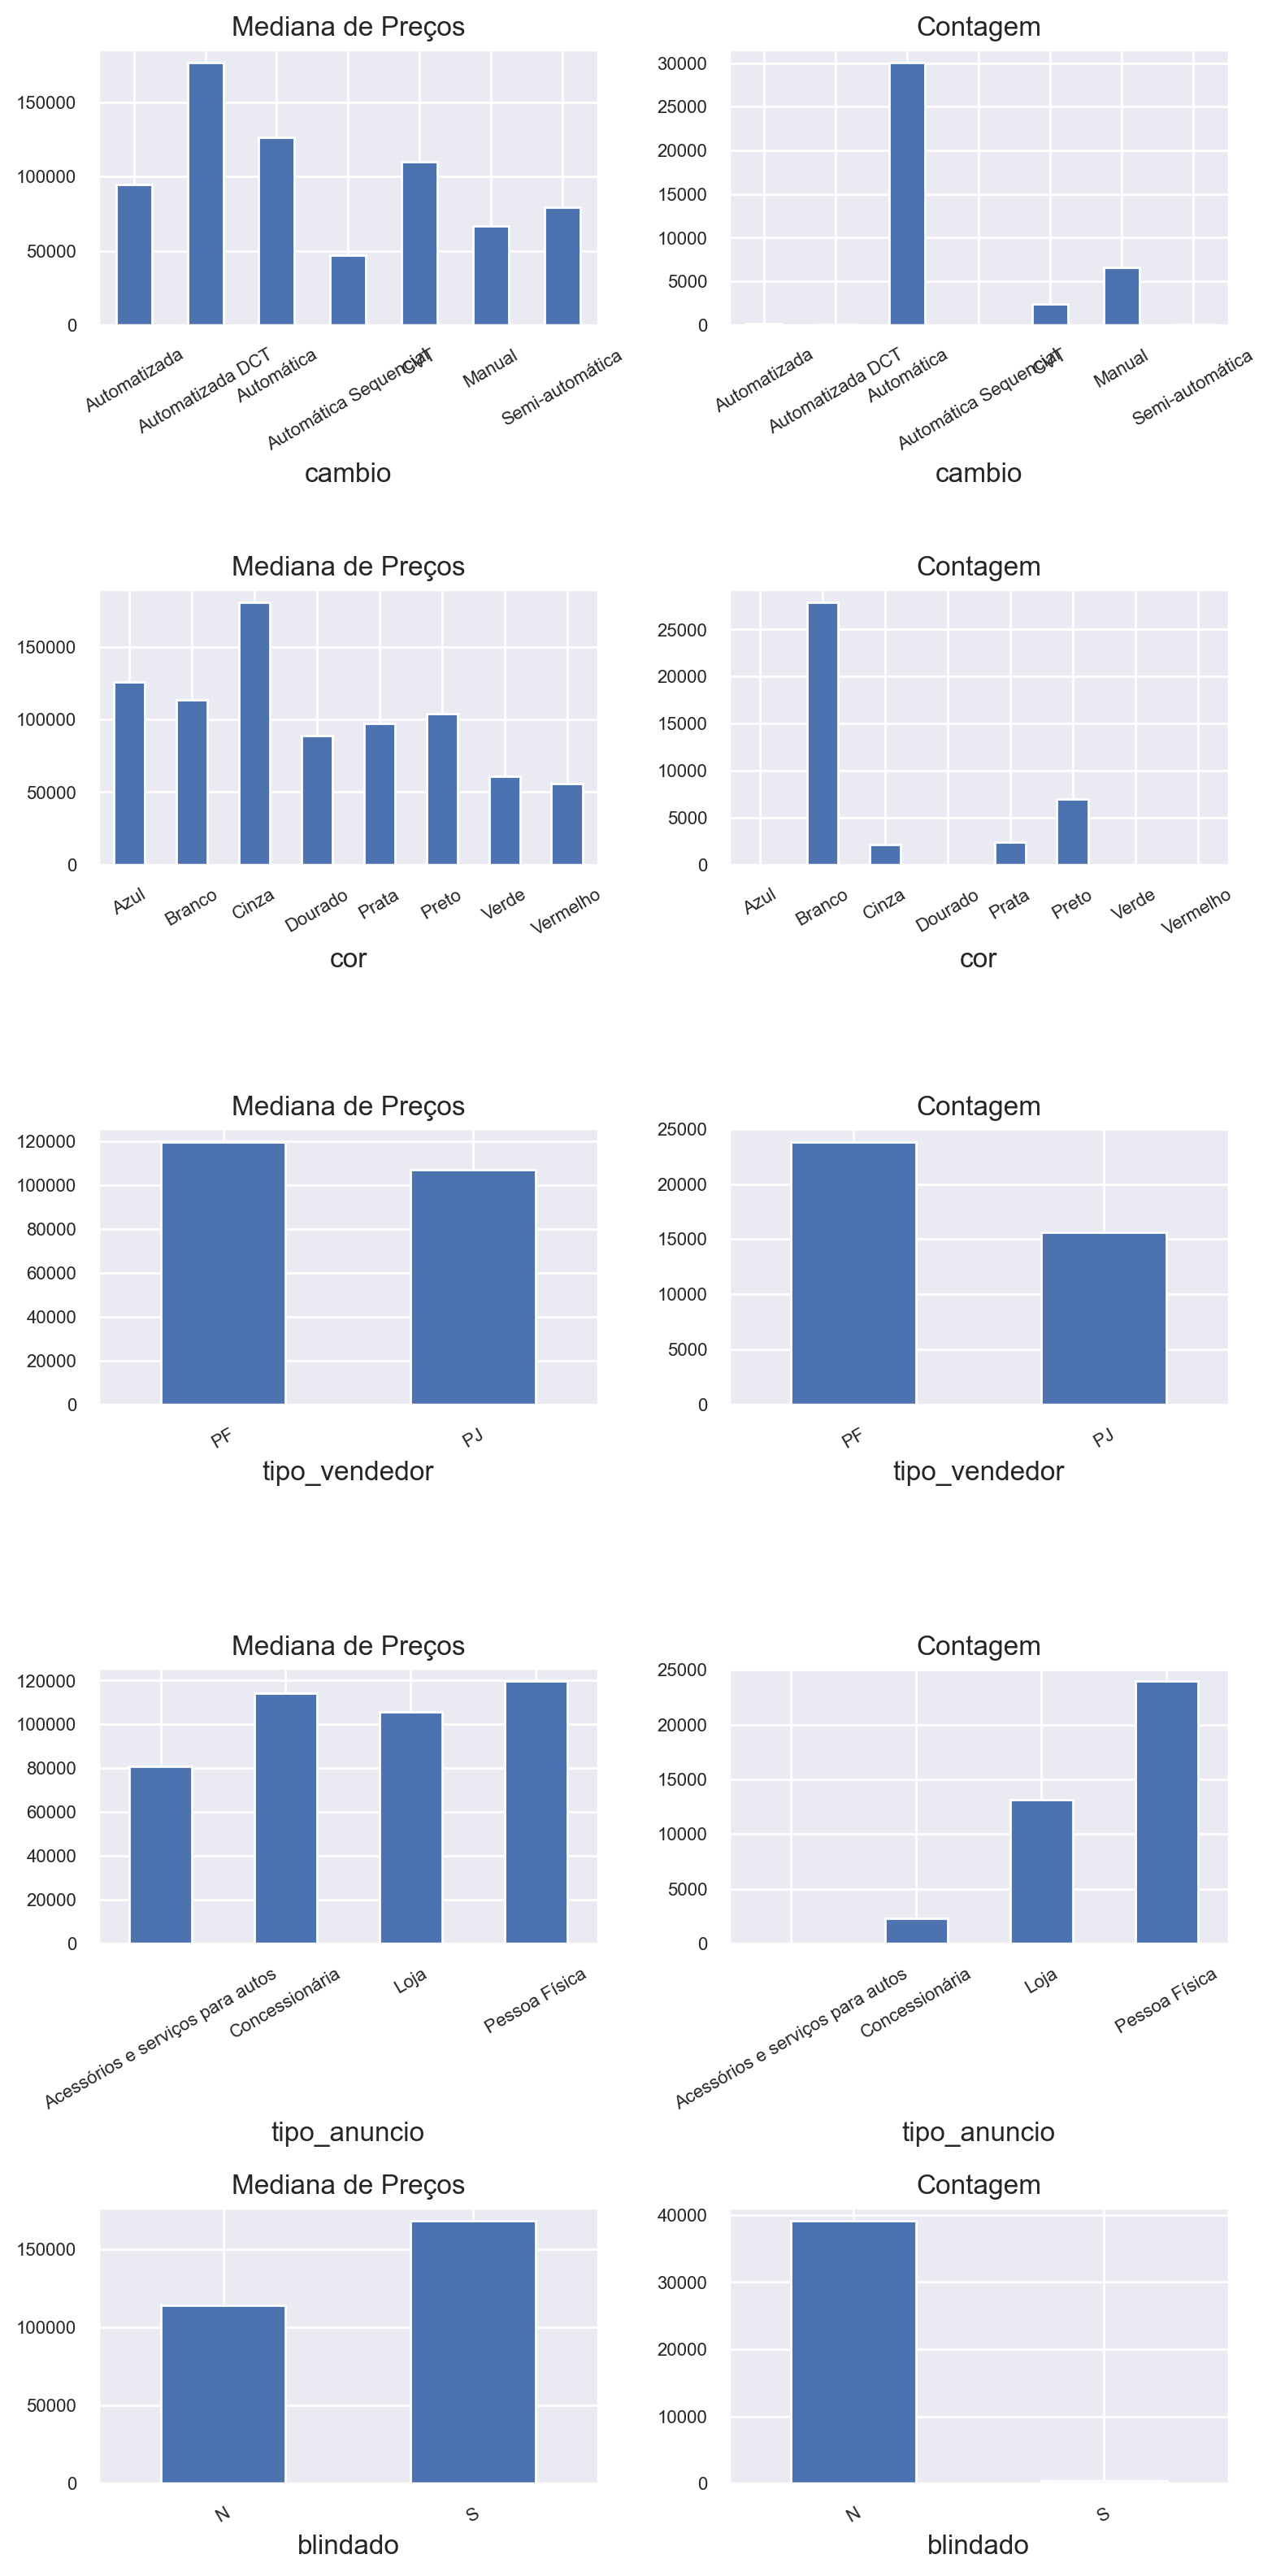

In [378]:
fig, axes = plt.subplots(5,2, figsize=(8,16))

#axes[0,0].tick_params(labelsize=8)
for ax in axes:
    ax[0].tick_params(labelsize=8)
    ax[1].tick_params(labelsize=8)
    
df.groupby('cambio').preco.median().plot(kind='bar',ax=axes[0,0],rot=30).set_title('Mediana de Preços')
df.groupby('cambio').preco.count().plot(kind='bar',ax=axes[0,1],rot=30).set_title('Contagem')

df.groupby('cor').preco.median().plot(kind='bar',ax=axes[1,0],rot=30).set_title('Mediana de Preços')
df.groupby('cor').preco.count().plot(kind='bar',ax=axes[1,1],rot=30).set_title('Contagem')

df.groupby('tipo_vendedor').preco.median().plot(kind='bar',ax=axes[2,0],rot=30).set_title('Mediana de Preços')
df.groupby('tipo_vendedor').preco.count().plot(kind='bar',ax=axes[2,1],rot=30).set_title('Contagem')

df.groupby('tipo_anuncio').preco.median().plot(kind='bar',ax=axes[3,0],rot=30).set_title('Mediana de Preços')
df.groupby('tipo_anuncio').preco.count().plot(kind='bar',ax=axes[3,1],rot=30).set_title('Contagem')

df.groupby('blindado').preco.median().plot(kind='bar',ax=axes[4,0],rot=30).set_title('Mediana de Preços')
df.groupby('blindado').preco.count().plot(kind='bar',ax=axes[4,1],rot=30).set_title('Contagem')
plt.tight_layout()

**Insights:**
- Câmbio parece ser relevante:
- - Automática: 30,073 - 76%
- - Manual: 6,631 - 17%
- - CVT: 2,39 - 16%
- - Automatizada: 192 - <1%
- - Automatizada: DCT 71 - <1%
- - Semi-automática: 56 - <1%

- cor, tipo_anuncio, blindado parecem ser features relevantes. a cor cinza se destaca com preços mais elevados.
- Não notei grande alteração nos preços com a feature tipo_vendedor


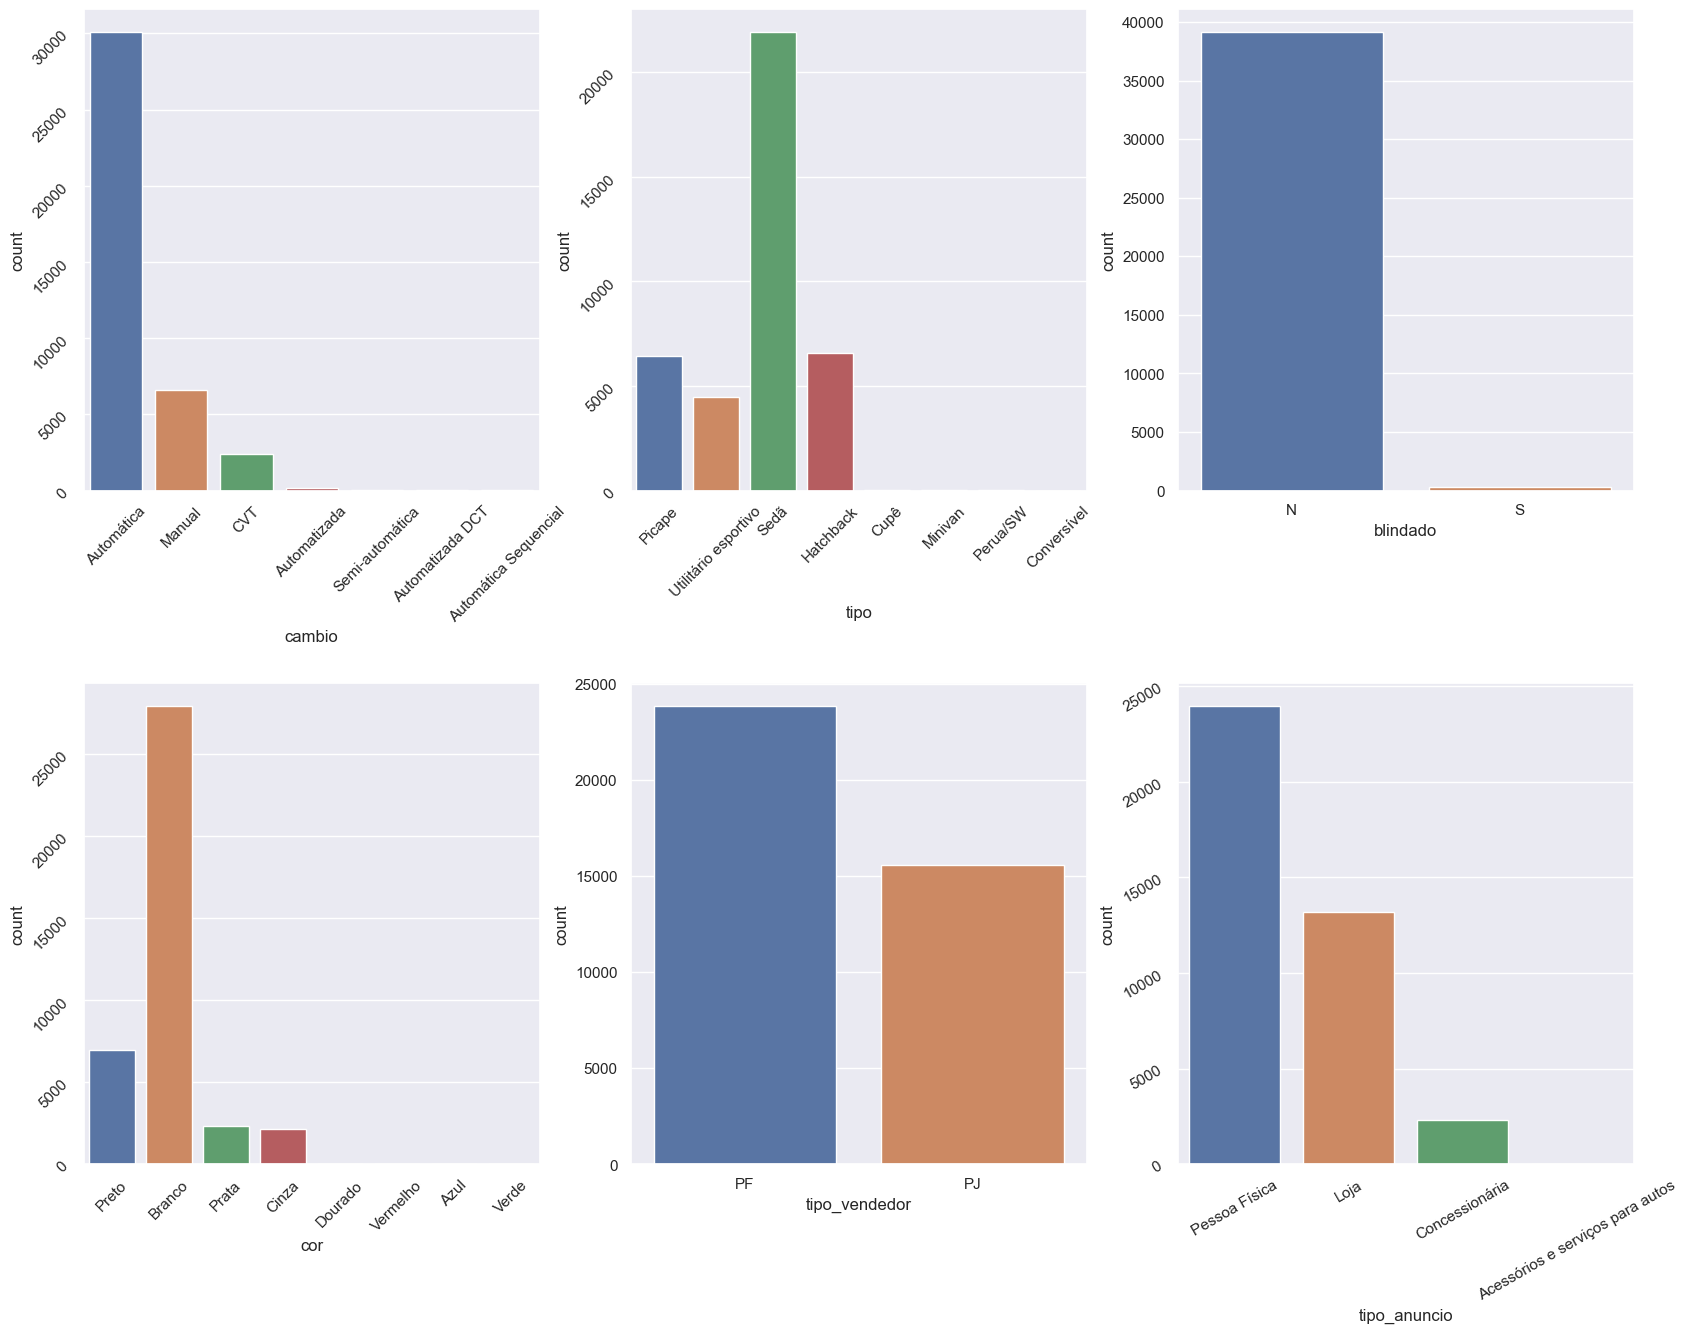

In [178]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(2, 3, hspace=0.4)
axs = gs.subplots()

sns.countplot(x = 'cambio', data = df_auto, ax=axs[0,0])
#plt.xticks(rotation=45)
axs[0,0].tick_params(labelrotation=45)

sns.countplot(x = 'tipo', data = df_auto, ax=axs[0,1])
axs[0,1].tick_params(labelrotation=45)

sns.countplot(x = 'blindado', data = df_auto, ax=axs[0,2])

sns.countplot(x = 'cor', data = df_auto, ax=axs[1,0])
axs[1,0].tick_params(labelrotation=45)

sns.countplot(x = 'tipo_vendedor', data = df_auto, ax=axs[1,1])

sns.countplot(x = 'tipo_anuncio', data = df_auto, ax=axs[1,2])
axs[1,2].tick_params(labelrotation=30)

plt.show()

In [176]:
df_auto.cambio.value_counts(normalize=True)

Automática              0.7624
Manual                  0.1681
CVT                     0.0606
Automatizada            0.0049
Automatizada DCT        0.0018
Semi-automática         0.0014
Automática Sequencial   0.0008
Name: cambio, dtype: float64

**Insights:**
- Na coluna 'cambio' a mediana da categoria 'automatizada_dct' é a mais cara porém representa 0,18% do dataset.

In [402]:
df1 = df.fillna(0)

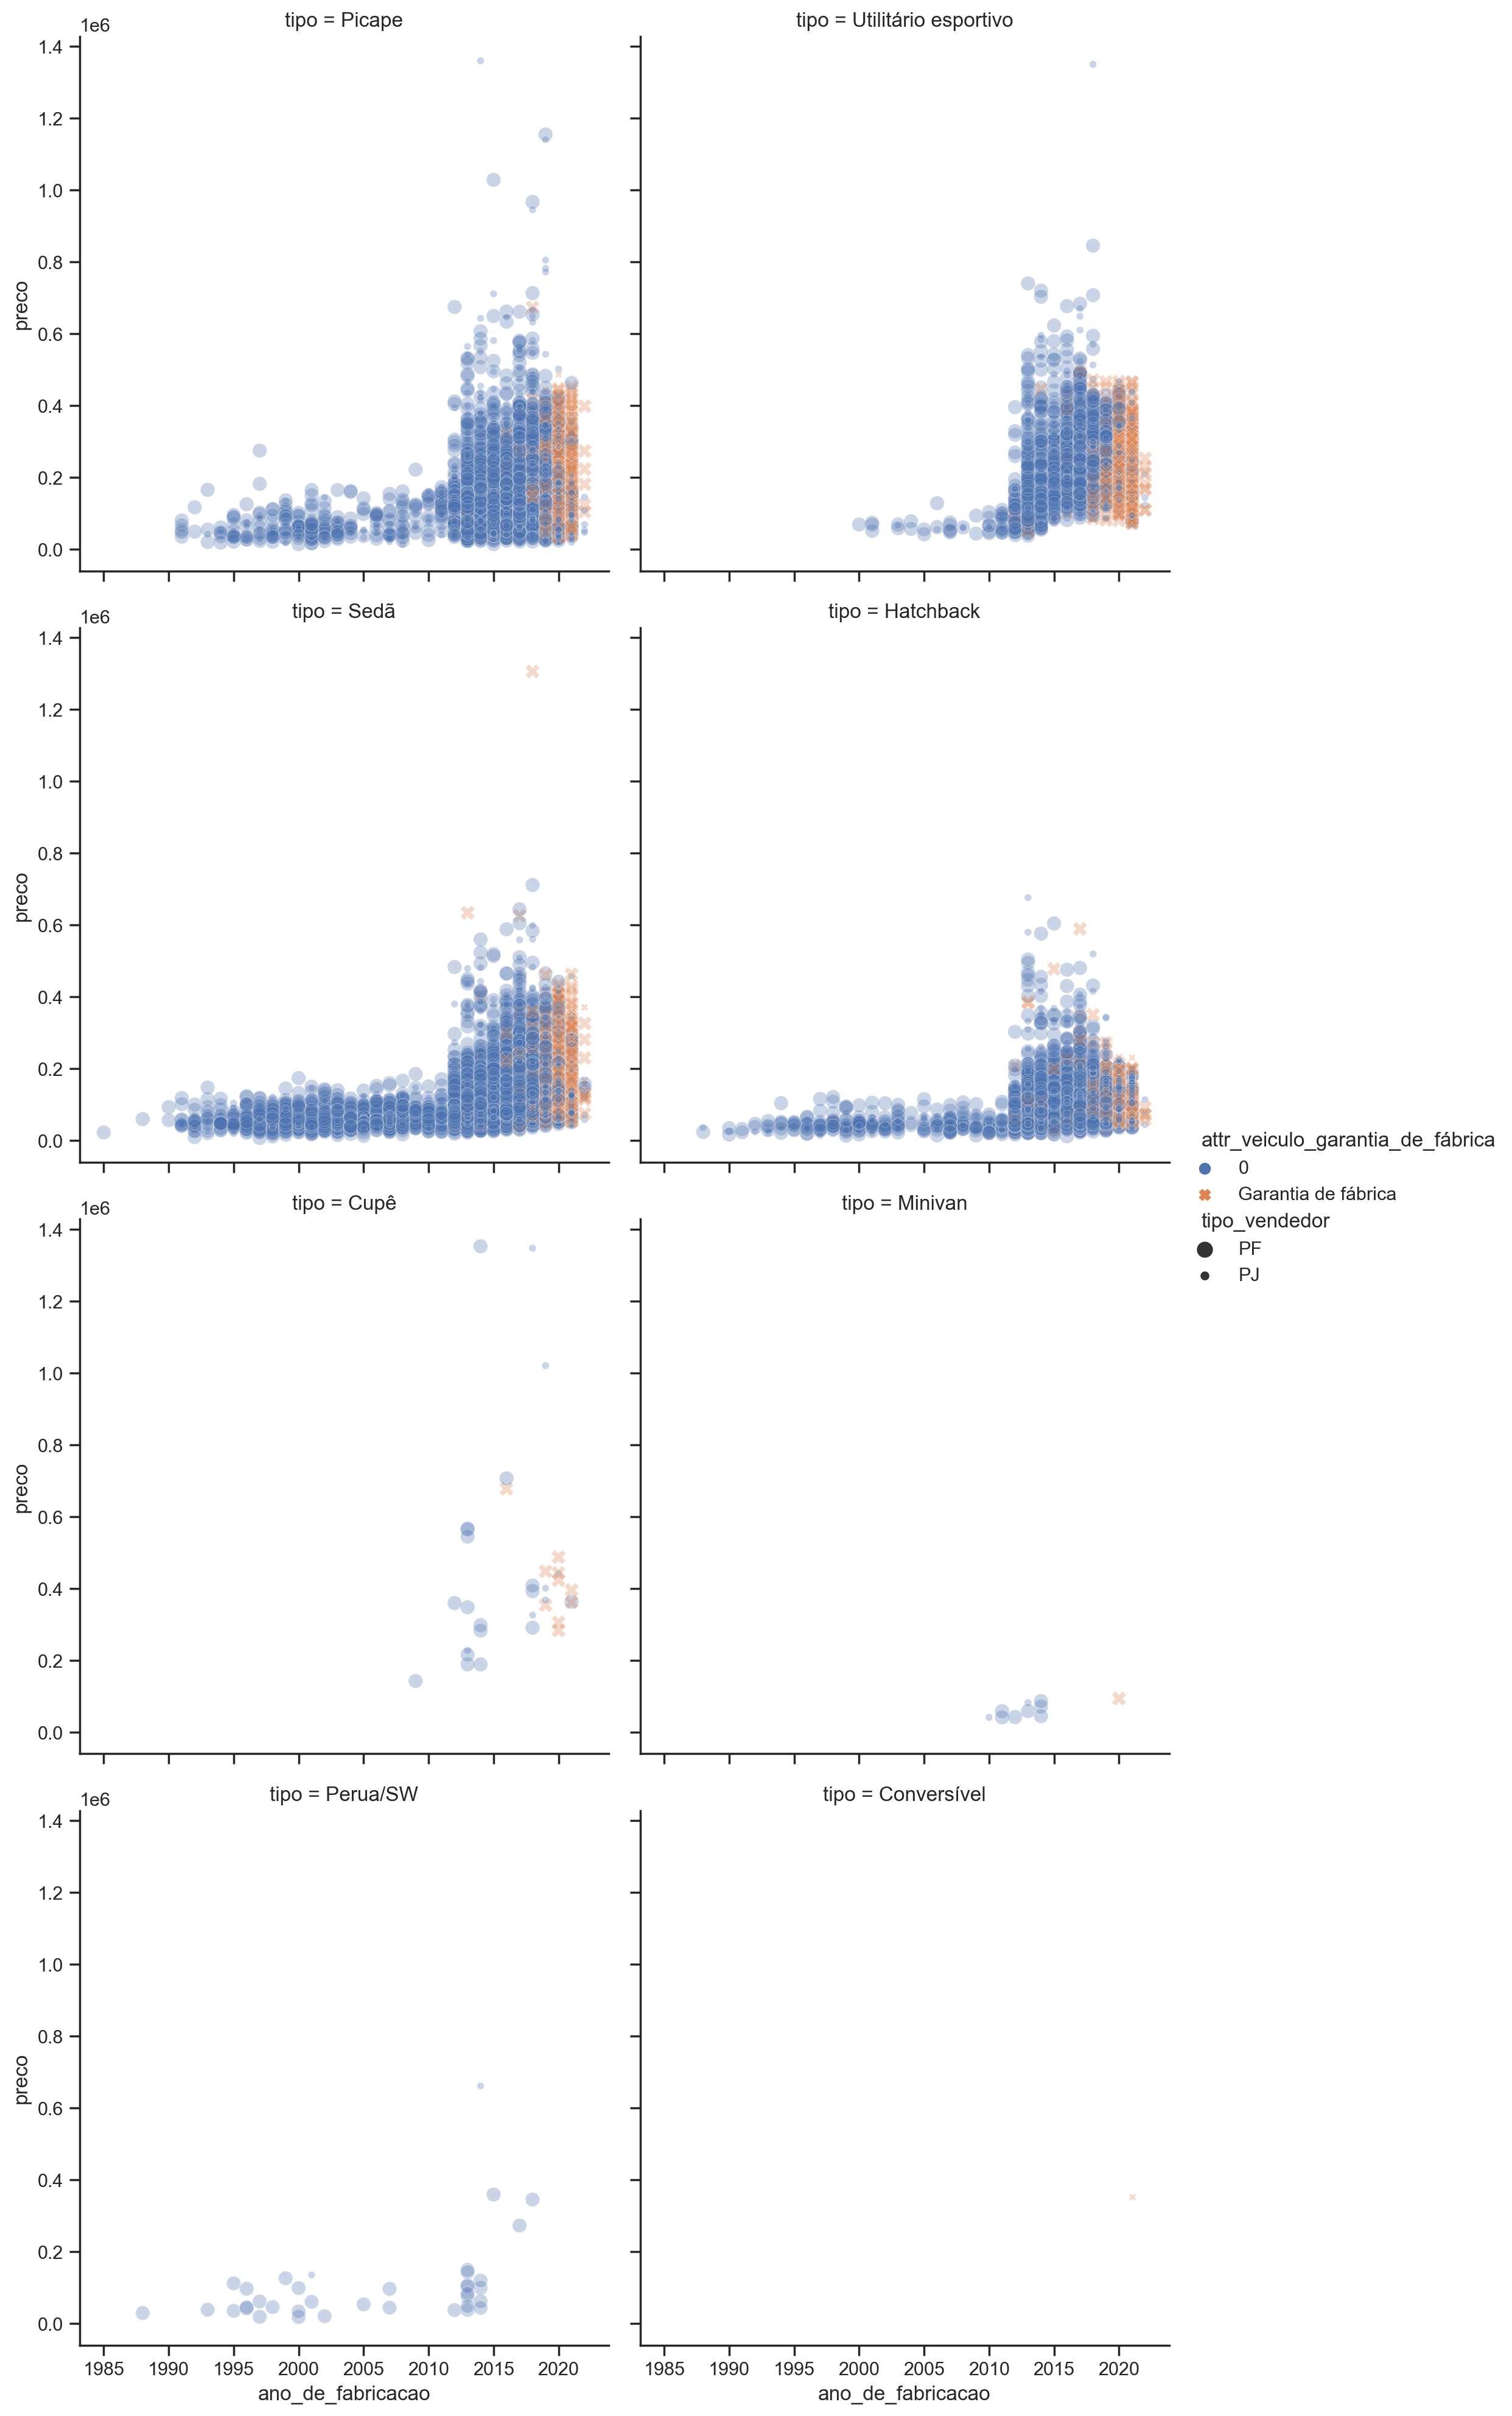

In [405]:
sns.relplot(data=df1, x='ano_de_fabricacao', y='preco', alpha=0.3,
            col='tipo', col_wrap = 2,
            hue='attr_veiculo_garantia_de_fábrica', style='attr_veiculo_garantia_de_fábrica', size='tipo_vendedor')

**Insights:**
- Os carros mais novos tendem a possuir garantia de fábrica.

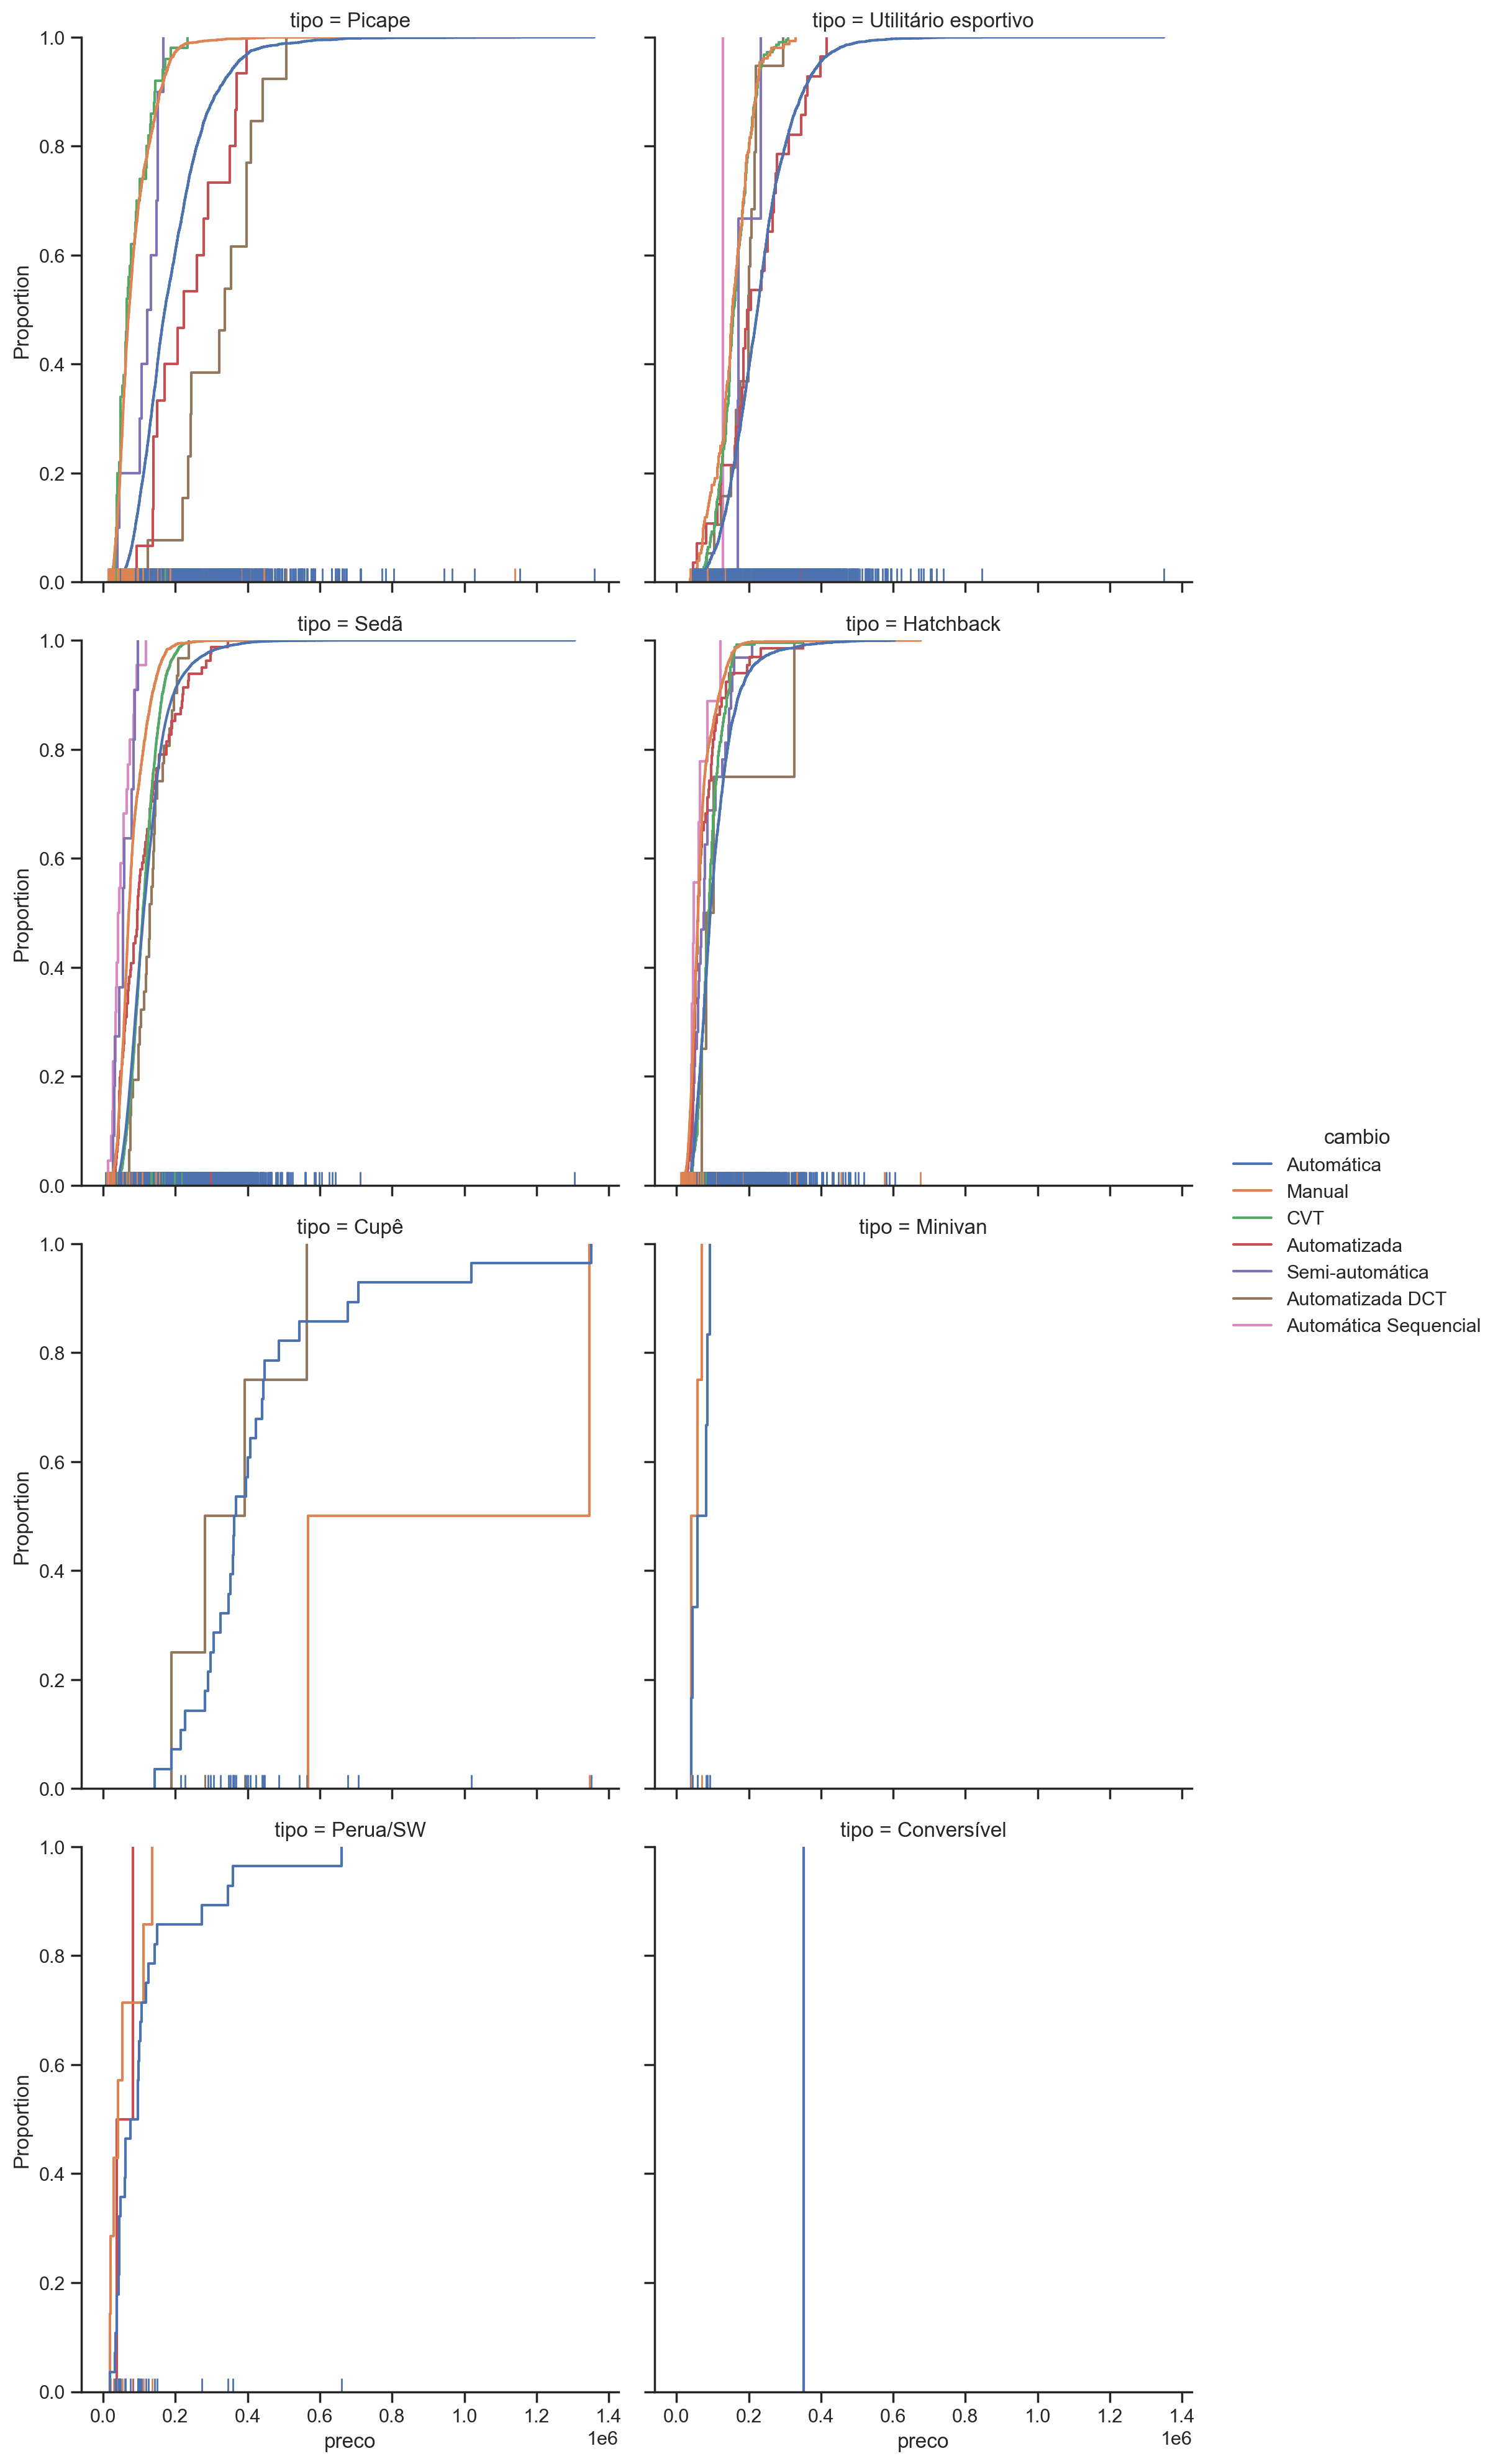

In [413]:
sns.displot(data=df, kind="ecdf", x="preco", col="tipo", col_wrap=2,
            hue="cambio", rug=True)

## Attr

**Analisando colunas que começam com 'attr'**

Essas colunas tem muitos valores faltantes

In [148]:
df_attr = df_auto.filter(regex='attr')
df_attr.head()

attr_veiculo_aceita_troca attr_veiculo_único_dono  \
0  Aceita troca              NaN                      
1  Aceita troca              NaN                      
2  Aceita troca              NaN                      
3  Aceita troca              NaN                      
4  Aceita troca              NaN                      

  attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
0  Todas as revisões feitas pela concessionária               
1  Todas as revisões feitas pela concessionária               
2  NaN                                                        
3  Todas as revisões feitas pela concessionária               
4  Todas as revisões feitas pela concessionária               

  attr_veiculo_ipva_pago attr_veiculo_licenciado  \
0  IPVA pago              Licenciado               
1  IPVA pago              NaN                      
2  NaN                    NaN                      
3  NaN                    NaN                      
4  NaN                    NaN                      

  attr_veiculo_garantia_de_fábrica  \
0  NaN                               
1  NaN                               
2  NaN                               
3  NaN                               
4  NaN                               

  attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro  
0  Todas as revisões feitas pela agenda do carro              
1  Todas as revisões feitas pela agenda do carro              
2  NaN                                                        
3  NaN                                                        
4  Todas as revisões feitas pela agenda do carro

In [172]:
# Comentei porque as figuras ficaram muito grandes. Fiz os mesmos gráficos na célula abaixo


# for feature in df_attr.columns:
#     data = df_auto.copy()
    
#     # let's make a variable that indicates 1 if the observation was missing or zero otherwise
#     data[feature] = np.where(data[feature].isnull(), 0, data[feature])
    
#     # let's calculate the mean SalePrice where the information is missing or present
#     data.groupby(feature)['preco'].mean().plot.bar()
#     plt.title(feature)
#     plt.show()


In [161]:
df_attr = df_attr.fillna(0)
df_attr_preco = pd.concat([df_attr, df_auto['preco']], axis=1)
df_attr_preco.head()

attr_veiculo_aceita_troca attr_veiculo_único_dono  \
0  Aceita troca              0                        
1  Aceita troca              0                        
2  Aceita troca              0                        
3  Aceita troca              0                        
4  Aceita troca              0                        

  attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
0  Todas as revisões feitas pela concessionária               
1  Todas as revisões feitas pela concessionária               
2  0                                                          
3  Todas as revisões feitas pela concessionária               
4  Todas as revisões feitas pela concessionária               

  attr_veiculo_ipva_pago attr_veiculo_licenciado  \
0  IPVA pago              Licenciado               
1  IPVA pago              0                        
2  0                      0                        
3  0                      0                        
4  0                      0                        

  attr_veiculo_garantia_de_fábrica  \
0  0                                 
1  0                                 
2  0                                 
3  0                                 
4  0                                 

  attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro       preco  
0  Todas as revisões feitas pela agenda do carro             123231.9928  
1  Todas as revisões feitas pela agenda do carro             272076.0236  
2  0                                                         53411.5395   
3  0                                                         299697.0719  
4  Todas as revisões feitas pela agenda do carro             255164.3442

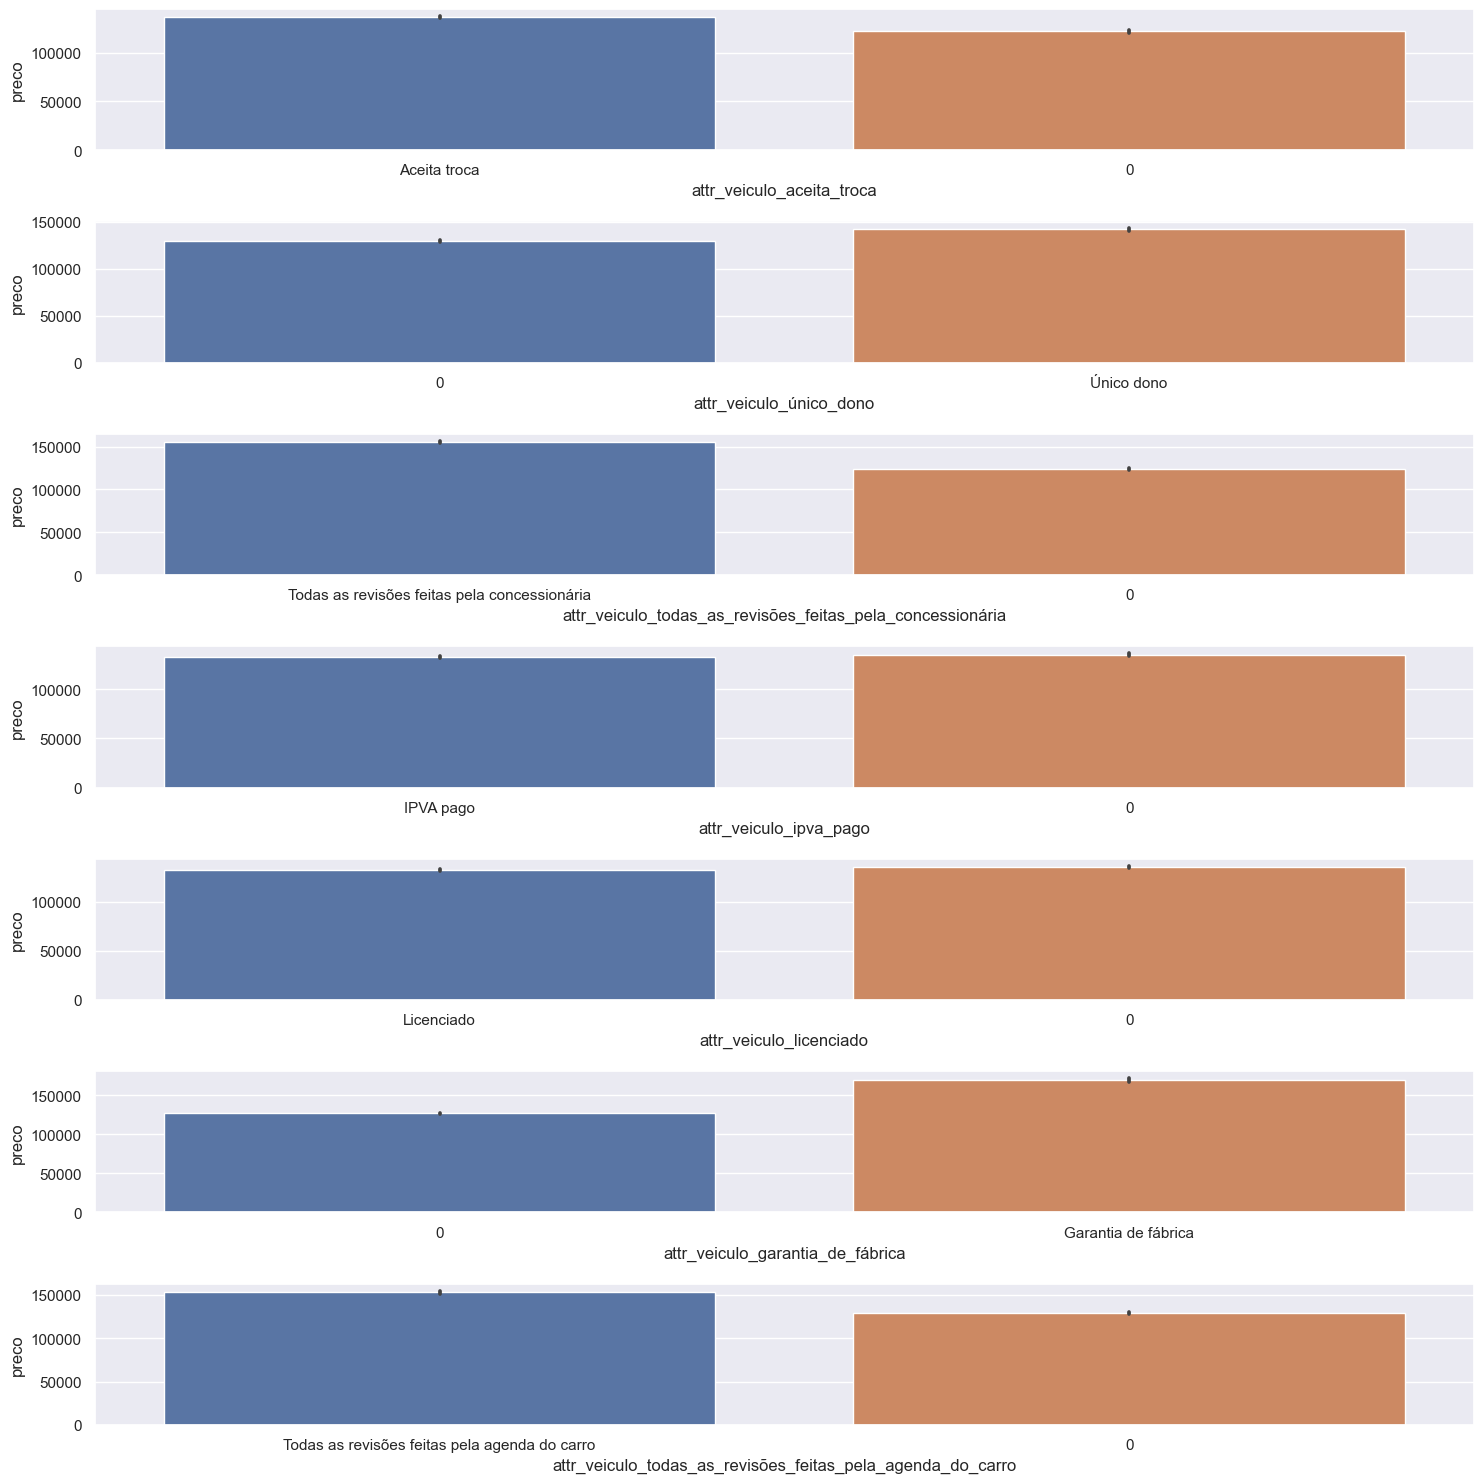

In [160]:
fig, ax = plt.subplots(7,1, figsize=(15,15))
i=0
for feature in df_attr.columns:
    sns.barplot(x=feature, y='preco', data=df_attr_preco, ax=ax[i])
    i=i+1
plt.tight_layout()

In [173]:
for feature in df_attr.columns:
    print(df_attr_preco.groupby(feature).preco.count())
    print('\n')

attr_veiculo_aceita_troca
0               10216
Aceita troca    29230
Name: preco, dtype: int64


attr_veiculo_único_dono
0             25548
Único dono    13898
Name: preco, dtype: int64


attr_veiculo_todas_as_revisões_feitas_pela_concessionária
0                                               27207
Todas as revisões feitas pela concessionária    12239
Name: preco, dtype: int64


attr_veiculo_ipva_pago
0            13223
IPVA pago    26223
Name: preco, dtype: int64


attr_veiculo_licenciado
0             18196
Licenciado    21250
Name: preco, dtype: int64


attr_veiculo_garantia_de_fábrica
0                      33658
Garantia de fábrica    5788 
Name: preco, dtype: int64


attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro
0                                                31543
Todas as revisões feitas pela agenda do carro    7903 
Name: preco, dtype: int64




In [170]:
for feature in df_attr.columns:
    print(df_attr_preco.groupby(feature).preco.mean())
    print('\n')

attr_veiculo_aceita_troca
0              122209.1057
Aceita troca   137292.1990
Name: preco, dtype: float64


attr_veiculo_único_dono
0            128855.6688
Único dono   141713.5252
Name: preco, dtype: float64


attr_veiculo_todas_as_revisões_feitas_pela_concessionária
0                                              123583.7359
Todas as revisões feitas pela concessionária   155175.7902
Name: preco, dtype: float64


attr_veiculo_ipva_pago
0           135108.2558
IPVA pago   132517.3601
Name: preco, dtype: float64


attr_veiculo_licenciado
0            135200.5065
Licenciado   131832.0368
Name: preco, dtype: float64


attr_veiculo_garantia_de_fábrica
0                     127083.0128
Garantia de fábrica   170037.8636
Name: preco, dtype: float64


attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro
0                                               128542.5541
Todas as revisões feitas pela agenda do carro   152716.8691
Name: preco, dtype: float64




**Insights**:
- A única coluna que parece gerar uma diferença relevante é 'attr_veiculo_garantia_de_fabrica'. Apenas 5788 carros de 39446 (14,67%) tem garantia de fábrica.

In [162]:
fig=plt.figure(figsize=(8, 8))

df_autox = pd.DataFrame(df_auto.groupby(['marca'])['preco'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 800x800 with 0 Axes>

## Estado do Vendedor 

In [218]:
df_auto.cidade_vendedor.value_counts()

São Paulo              8198
Rio de Janeiro         7739
Belo Horizonte         2925
Presidente Prudente    2022
Goiânia                1871
                       ... 
Santos Dumont          1   
Mirandópolis           1   
Quatro Barras          1   
Igarapé                1   
Cristalina             1   
Name: cidade_vendedor, Length: 648, dtype: int64

In [391]:
fig, axes = plt.subplots(1,2,figsize=(8, 8))
axes[0].tick_params(labelsize=8)
axes[1].tick_params(labelsize=8)

df_median = pd.DataFrame(df.groupby(['estado_vendedor'])['preco'].median().sort_values(ascending = False))
df_median.plot(kind='bar', ax=axes[0]).set_title('State vs Average Price')

df_count = pd.DataFrame(df.groupby(['estado_vendedor'])['preco'].count().sort_values(ascending = False))
df_count.plot(kind='bar', ax=axes[1]).set_title('State vs Count')

plt.show()

In [219]:
df_auto.estado_vendedor.value_counts()

São Paulo (SP)              21794
Rio de Janeiro (RJ)         3384 
Paraná (PR)                 3380 
Santa Catarina (SC)         3119 
Minas Gerais (MG)           2350 
Rio Grande do Sul (RS)      2191 
Goiás (GO)                  1043 
Bahia (BA)                  827  
Pernambuco (PE)             411  
Alagoas (AL)                171  
Paraíba (PB)                147  
Rio Grande do Norte (RN)    119  
Pará (PA)                   107  
Ceará (CE)                  87   
Amazonas (AM)               66   
Mato Grosso (MT)            48   
Mato Grosso do Sul (MS)     46   
Acre (AC)                   40   
Tocantins (TO)              34   
Espírito Santo (ES)         29   
Sergipe (SE)                29   
Piauí (PI)                  9    
Maranhão (MA)               7    
Rondônia (RO)               5    
Roraima (RR)                3    
Name: estado_vendedor, dtype: int64

In [222]:
df_auto.columns

Index(['num_fotos', 'marca', 'modelo', 'ano_de_fabricacao', 'ano_modelo',
       'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor',
       'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'tipo_anuncio',
       'entrega_delivery', 'troca', 'elegivel_revisao',
       'attr_veiculo_aceita_troca', 'attr_veiculo_único_dono',
       'attr_veiculo_todas_as_revisões_feitas_pela_concessionária',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fábrica',
       'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro', 'preco'],
      dtype='object')

<AxesSubplot:>

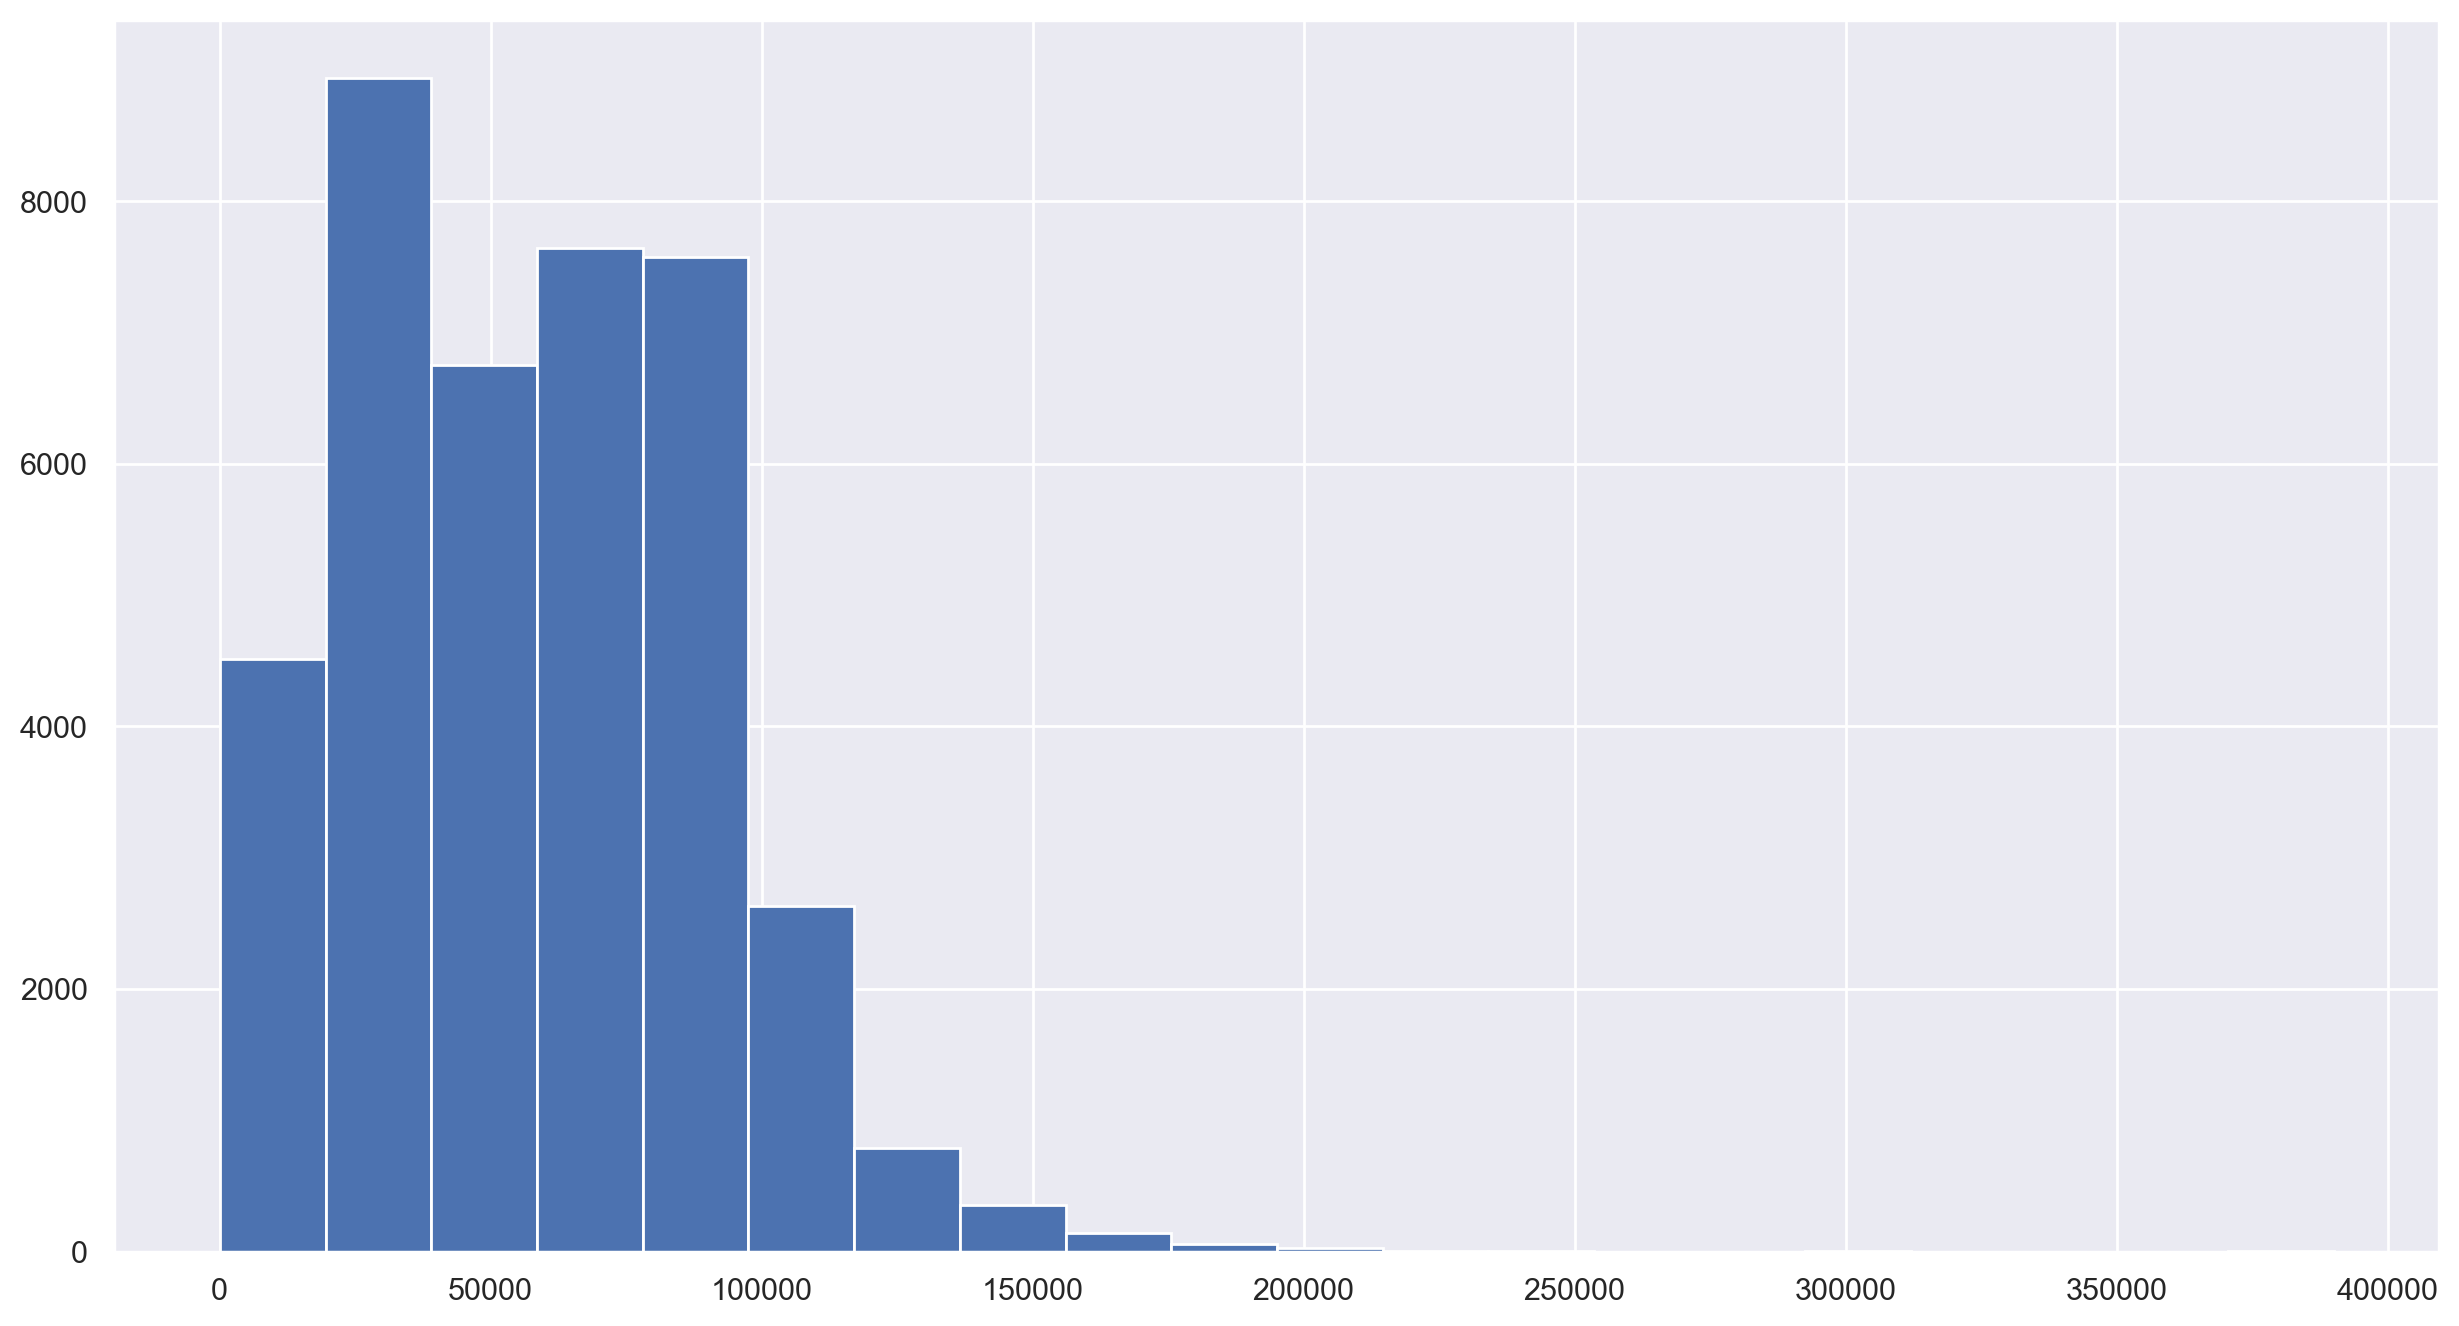

In [224]:
df_auto.odometro.hist(bins=20)

In [226]:
sns.relplot(x='odometro',y='preco',data=df_auto,alpha=0.6 )

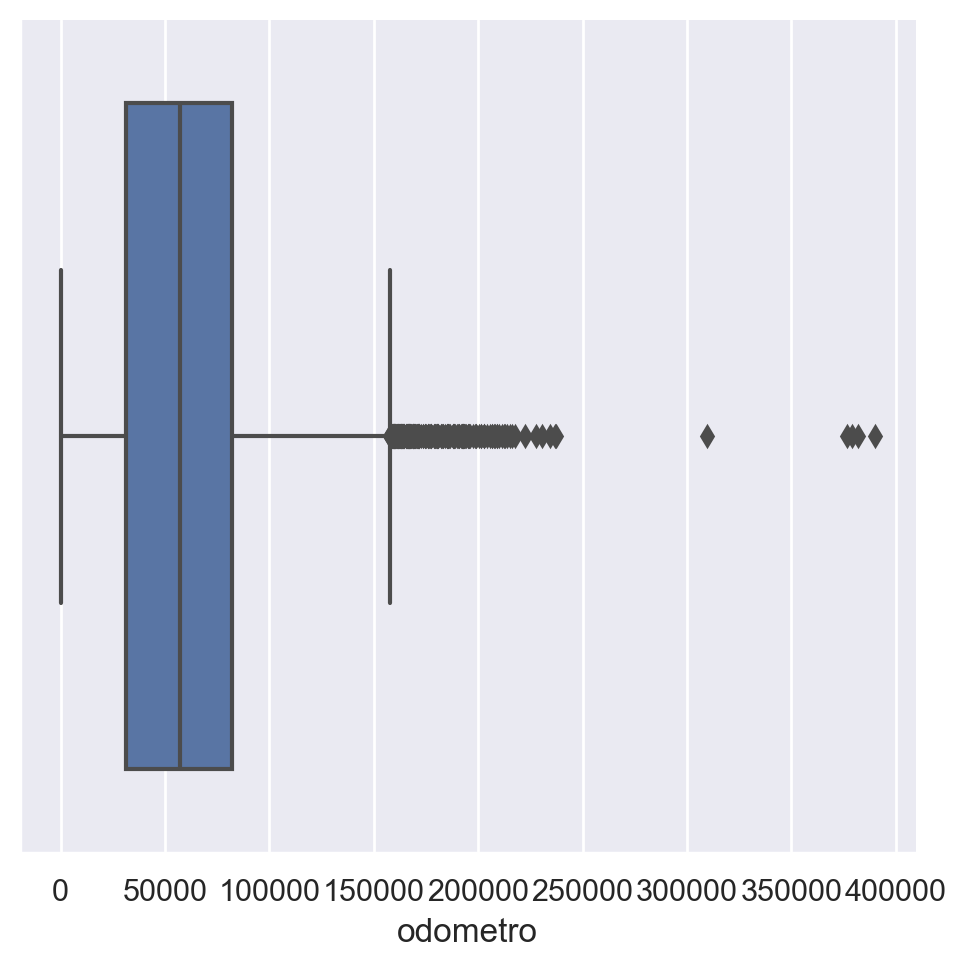

In [228]:
sns.catplot(x='odometro',data=df_auto,kind='box')

## 'entrega_delivery', 'troca', 'elegivel_revisao'

Text(0.5, 1.0, 'Count')

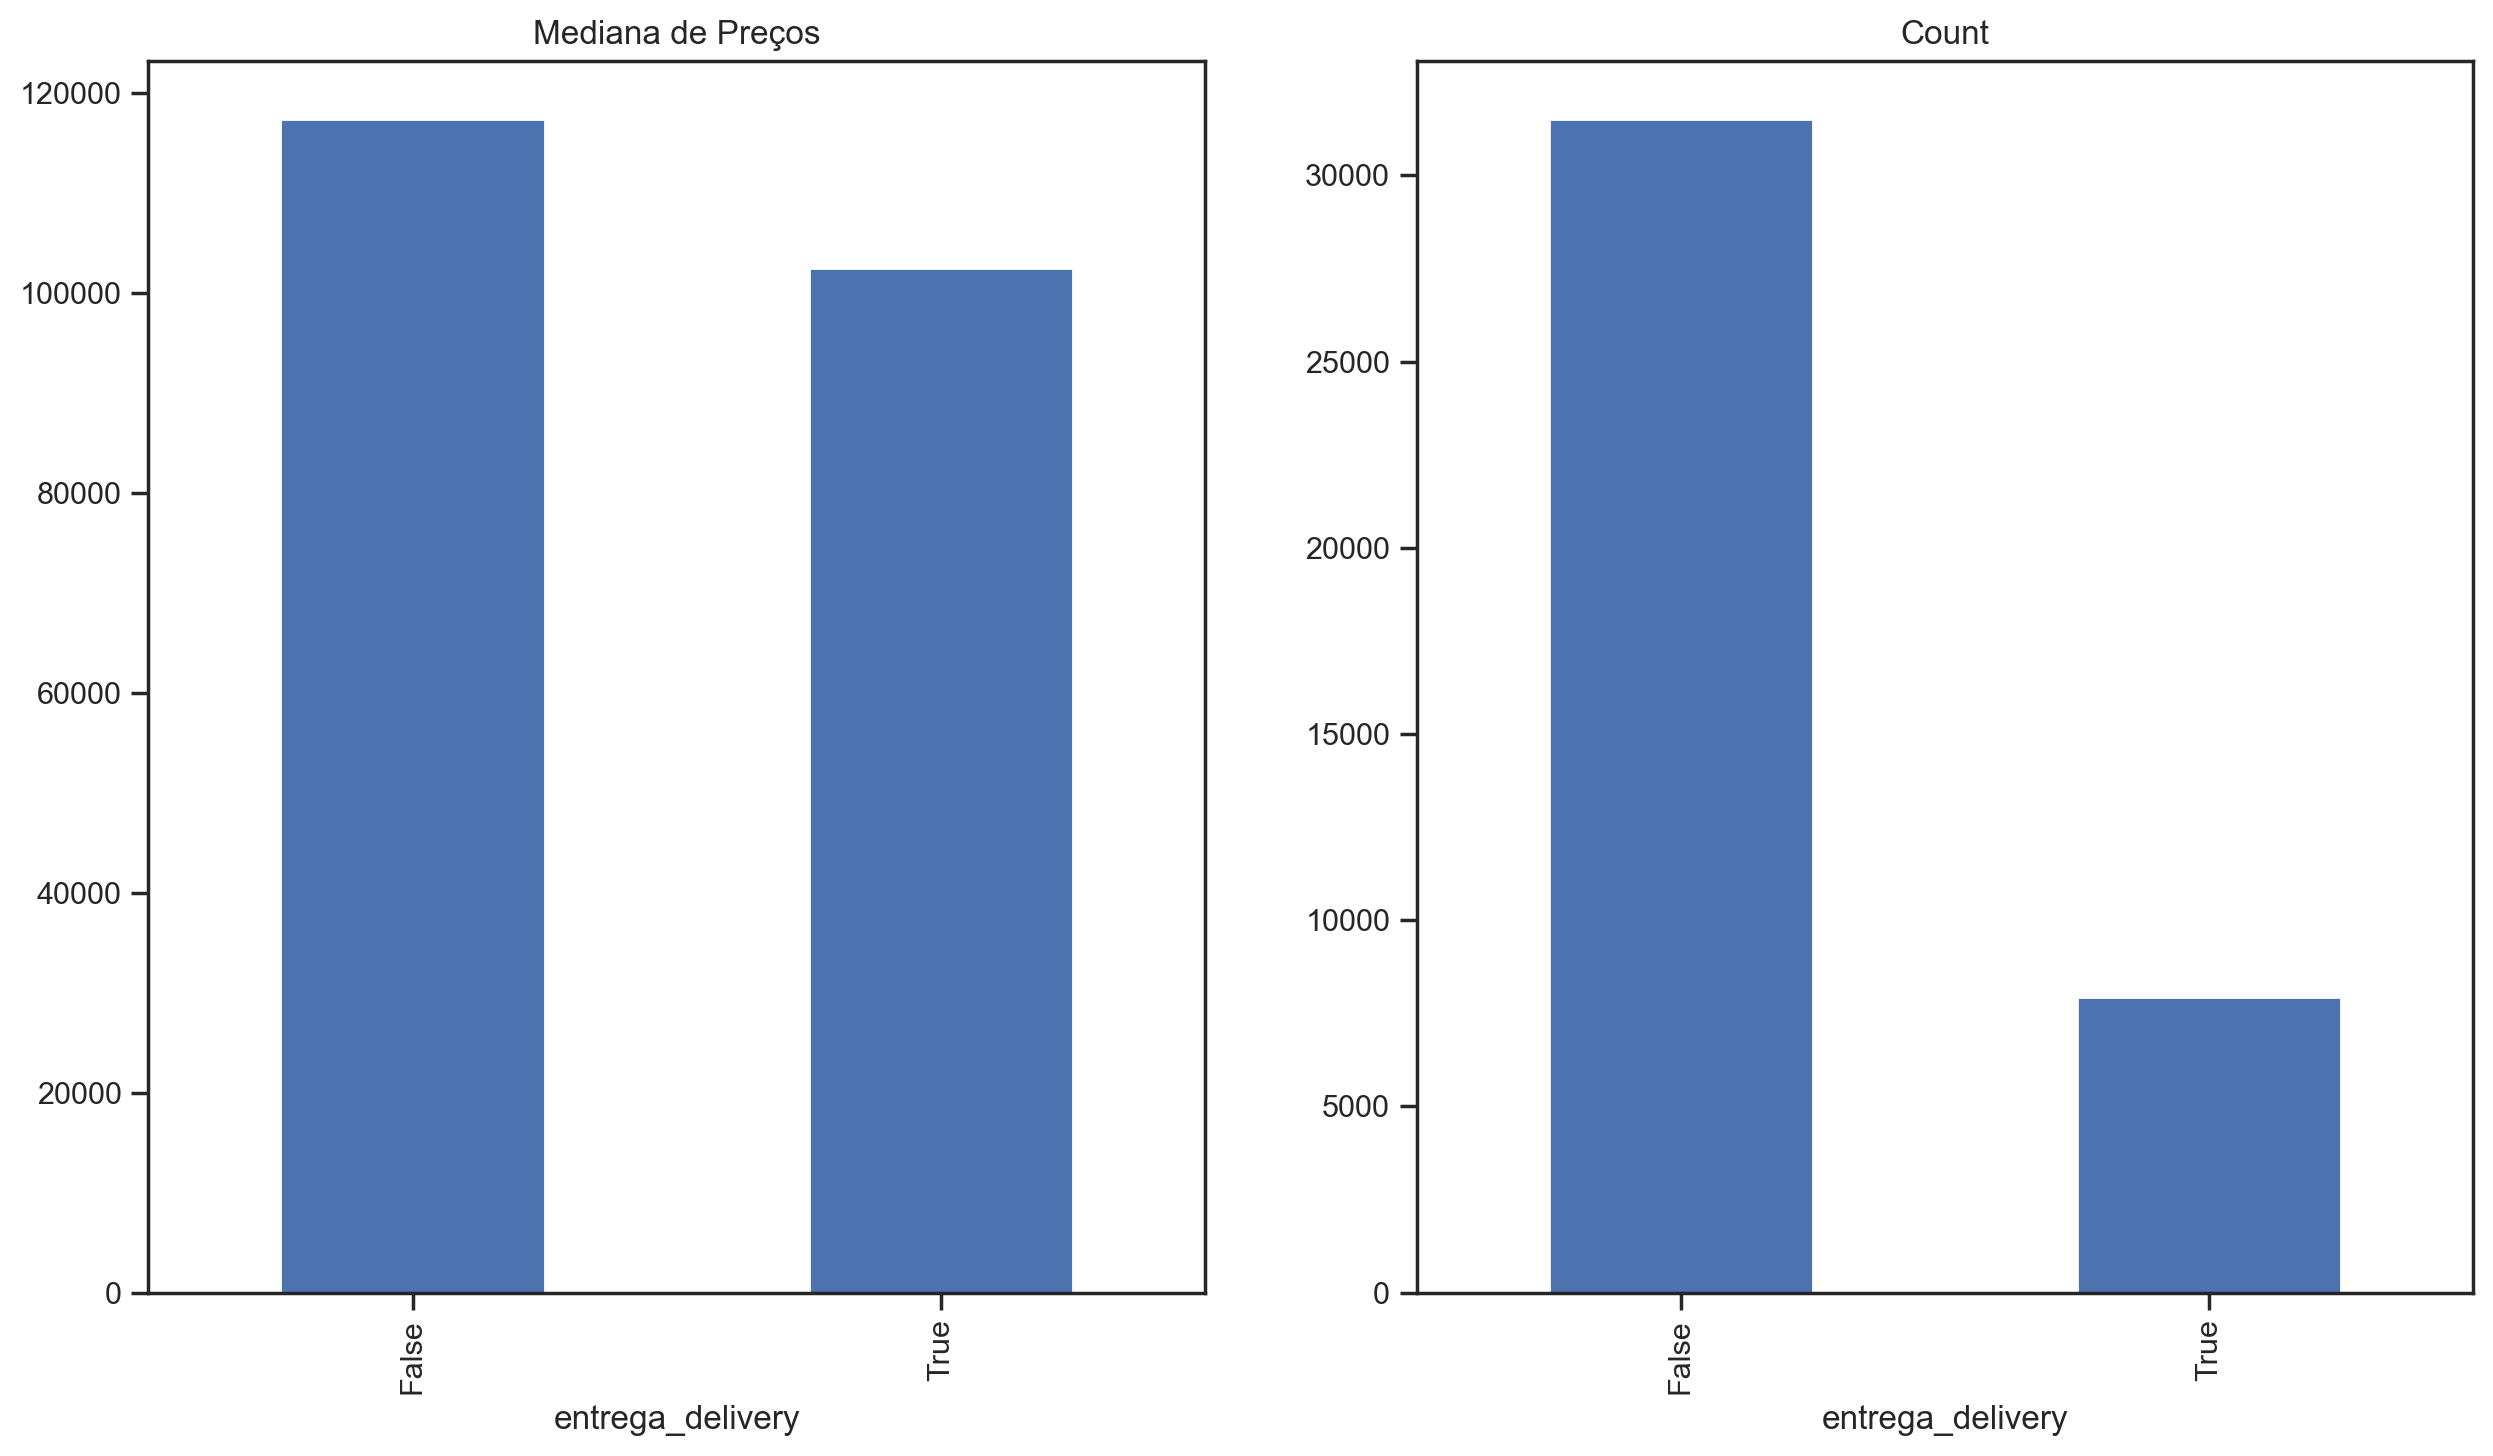

In [426]:
fig, axes = plt.subplots(1,2)

df.groupby('entrega_delivery').preco.median().plot(kind='bar', ax=axes[0]).set_title('Mediana de Preços')
df.groupby('entrega_delivery').preco.count().plot(kind='bar', ax=axes[1]).set_title('Count')

Text(0.5, 1.0, 'Count')

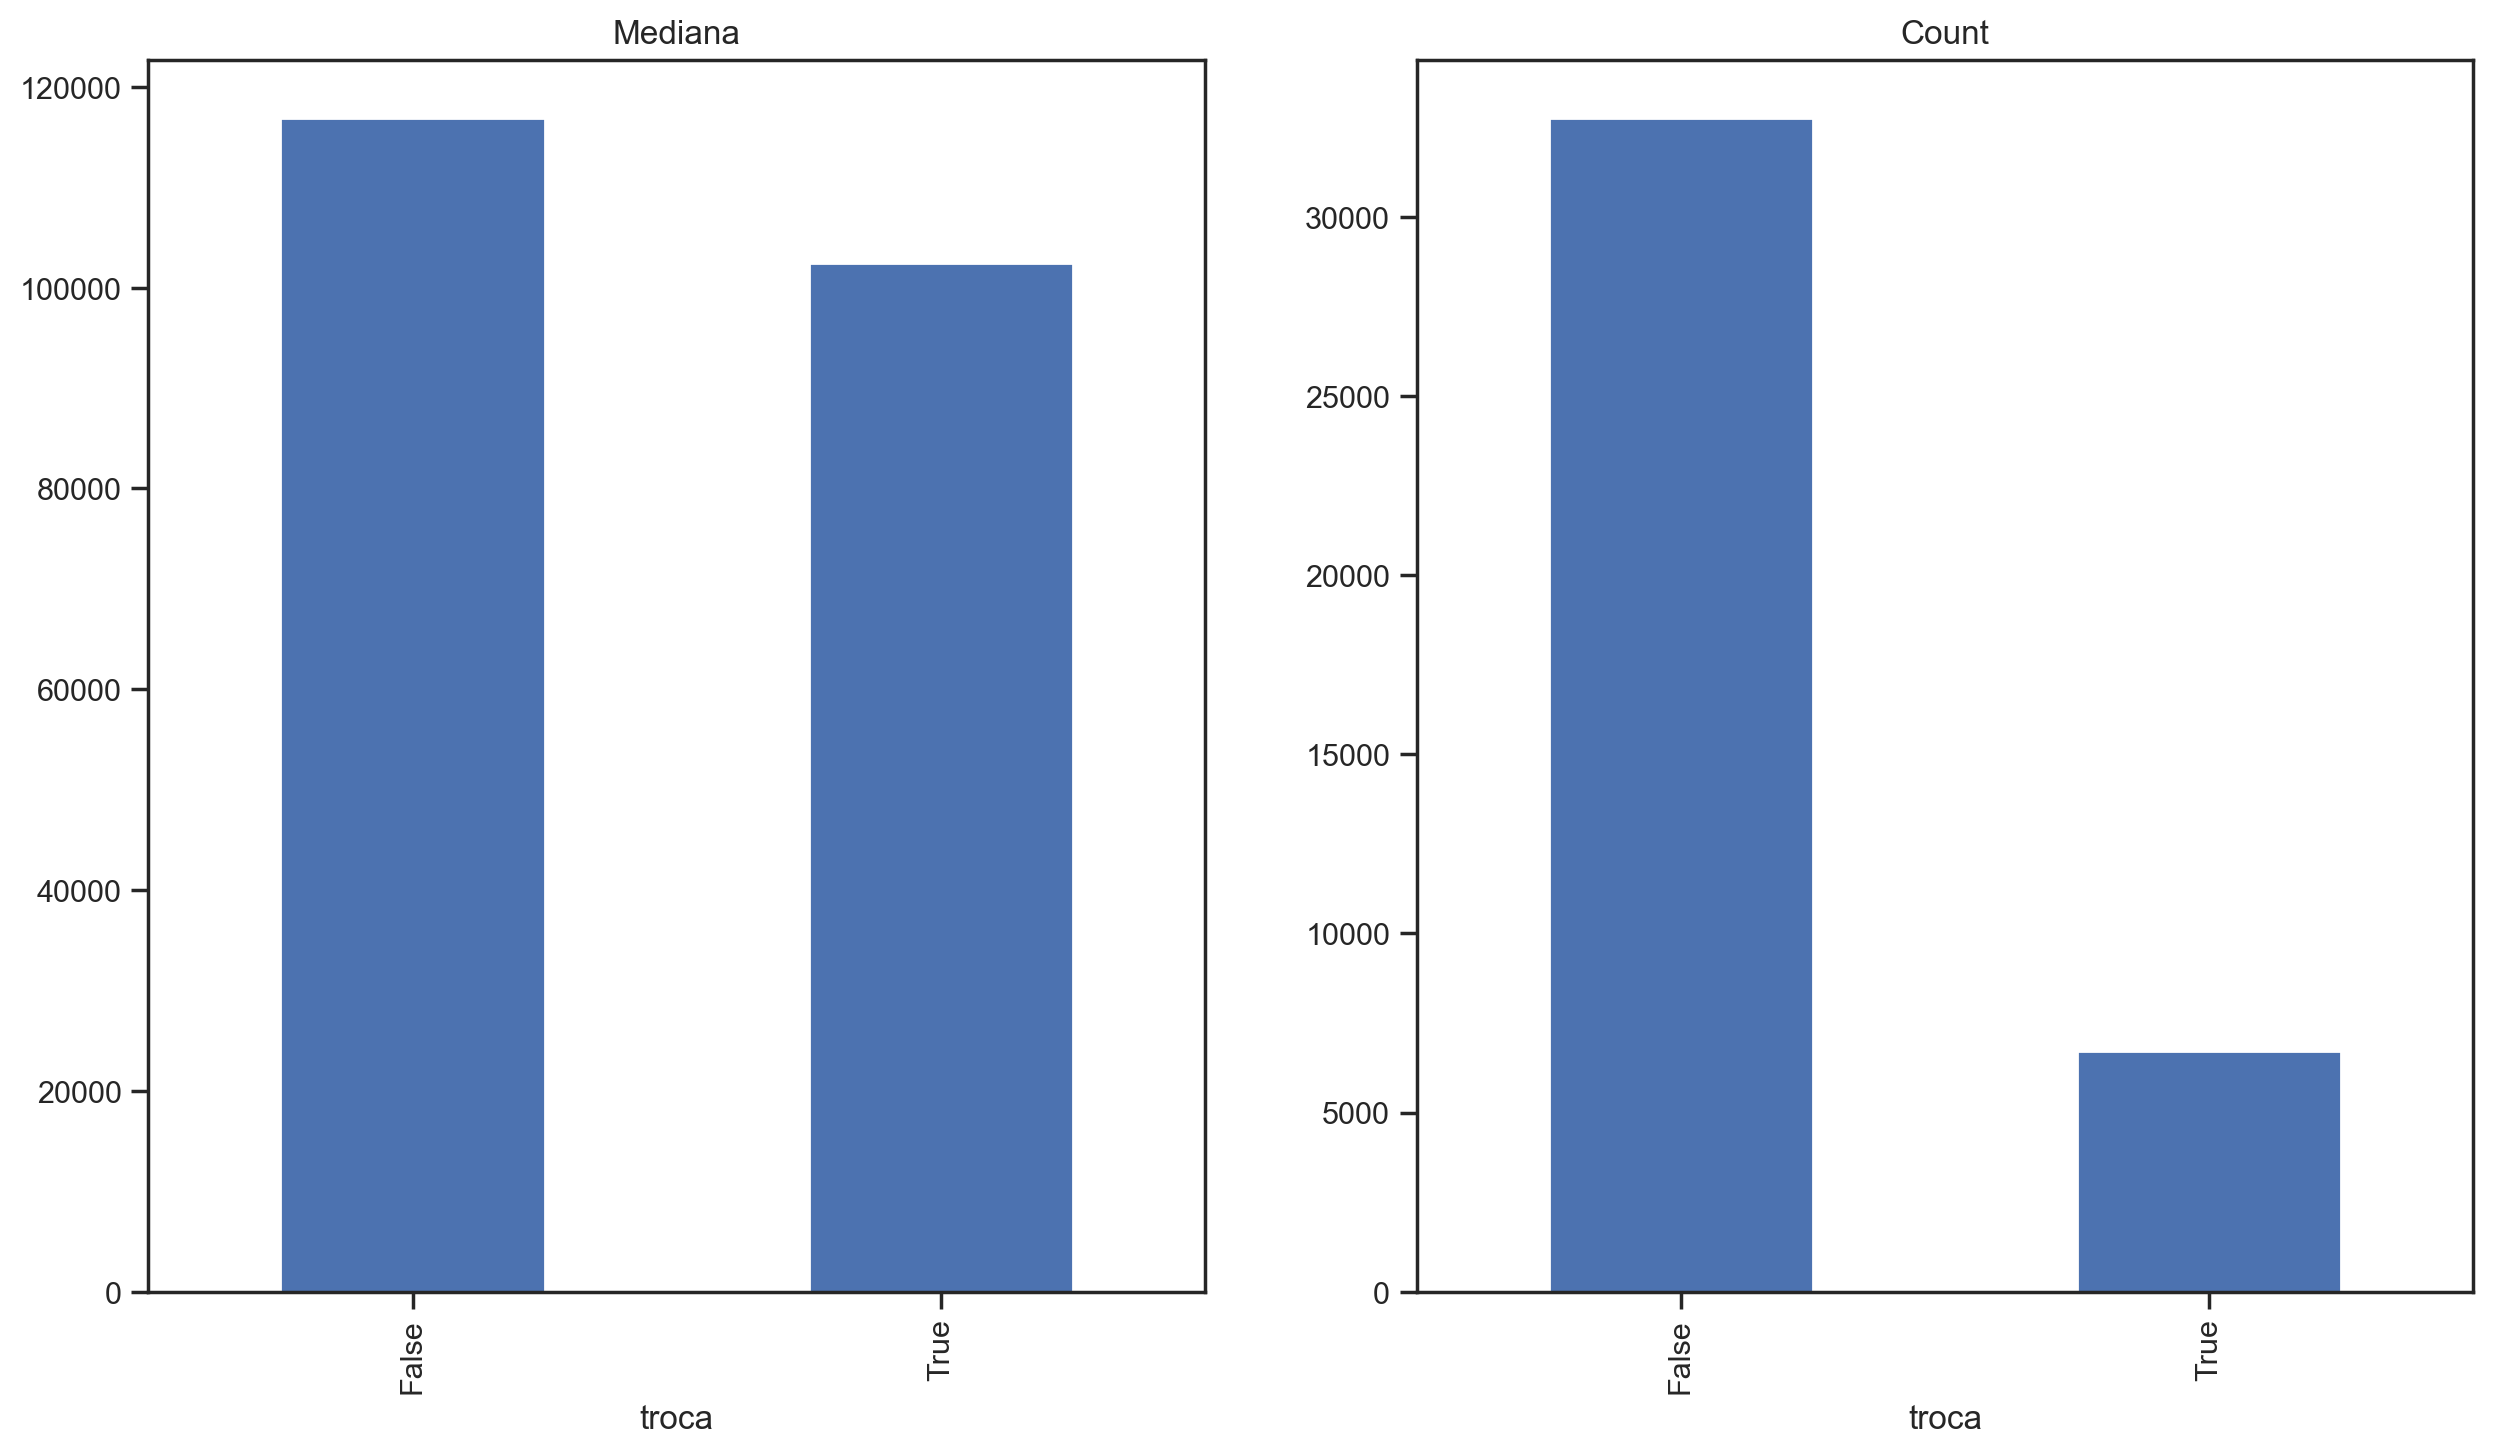

In [427]:
fig, axes = plt.subplots(1,2)

df.groupby('troca').preco.median().plot(kind='bar', ax=axes[0]).set_title('Mediana')
df.groupby('troca').preco.count().plot(kind='bar', ax=axes[1]).set_title('Count')

Text(0.5, 1.0, 'Count')

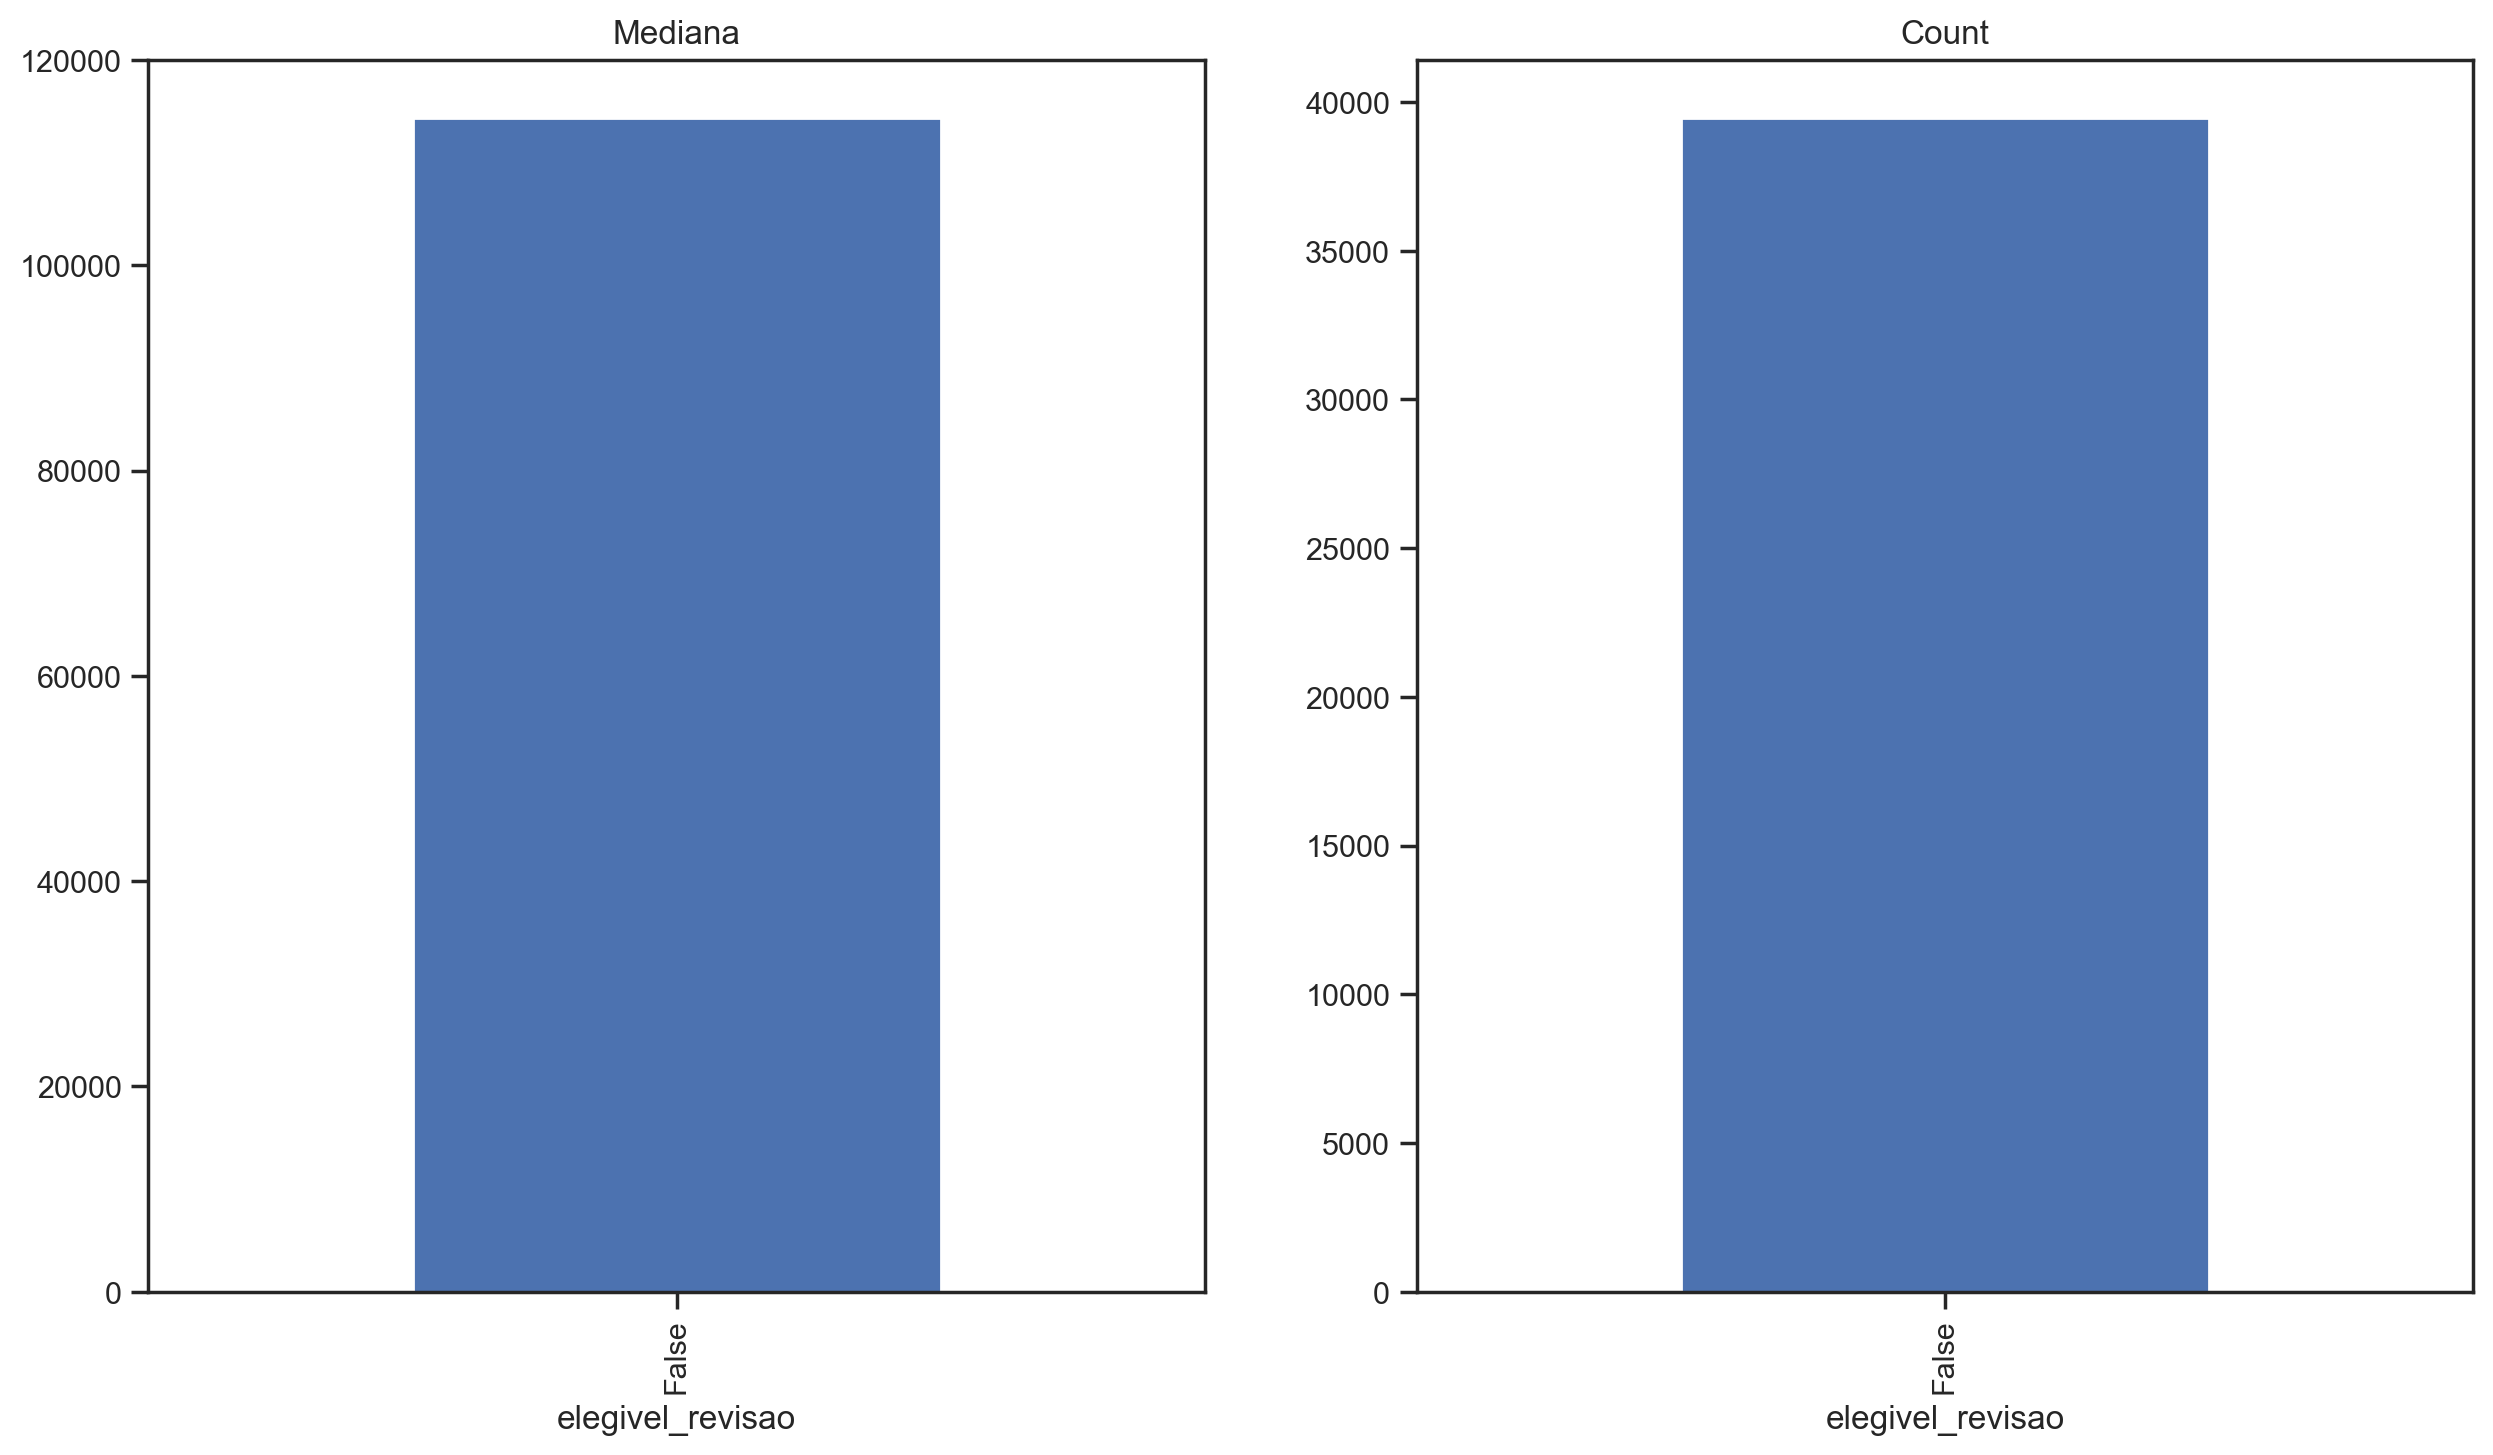

In [428]:
fig, axes = plt.subplots(1,2)

df.groupby('elegivel_revisao').preco.median().plot(kind='bar', ax=axes[0]).set_title('Mediana')
df.groupby('elegivel_revisao').preco.count().plot(kind='bar', ax=axes[1]).set_title('Count')

**Insights:** 
- Carros que não possuem 'entrega_delivery' e 'troca' parecem ser um pouco mais caros.
- A feature 'elegivel_revisao' possui todos os valores idênticos e pode ser descartada.

## Car Level

(0.0, 400000.0)

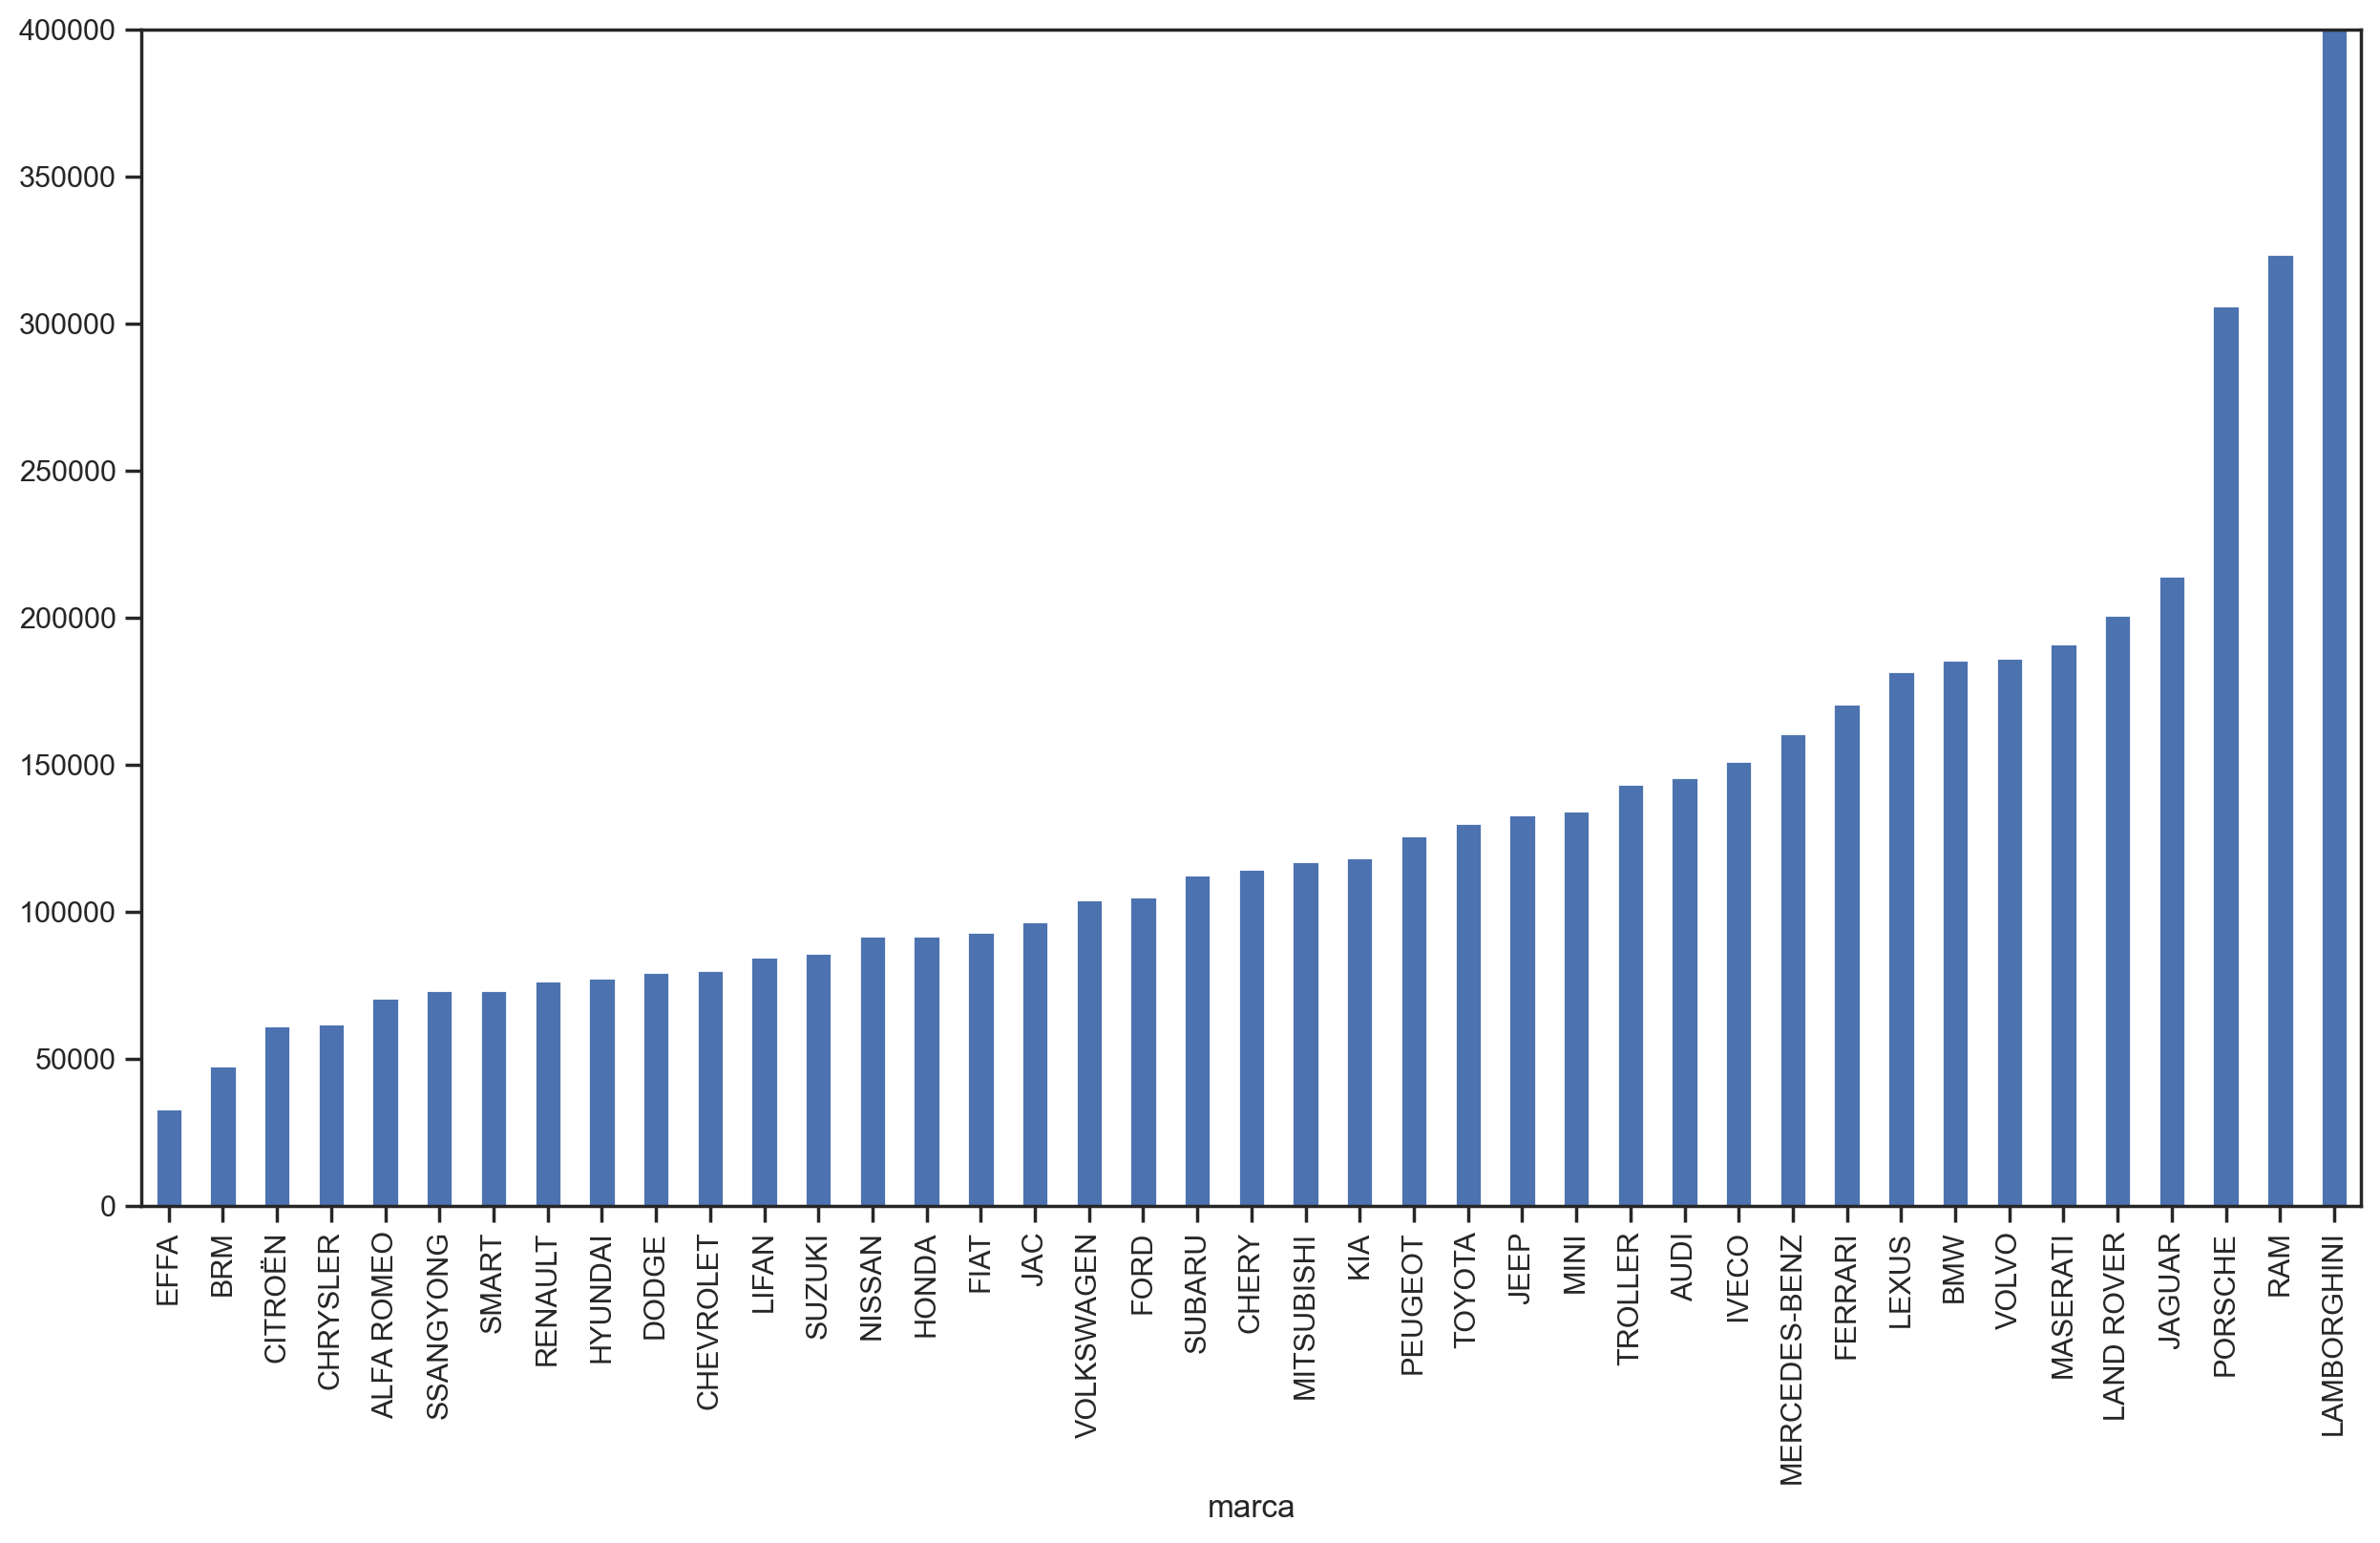

In [452]:
df.groupby('marca').preco.median().sort_values().plot(kind='bar')
plt.ylim([0,400000])

In [453]:
#Binning the Car Companies based on avg prices of each car Company.

df2=df.copy()
df2['preco'] = df2['preco'].astype('int')
df2_temp = df2.copy()
t = df2_temp.groupby(['marca'])['preco'].median()
df2_temp = df2_temp.merge(t.reset_index(), how='left',on='marca')
bins = [0,100000,150000,300000,2000000]
label =['Budget_Friendly','Medium_Range','High_Range','TopNotch_Cars']
df2['Cars_Category'] = pd.cut(df2_temp['preco_y'],bins,right=False,labels=label)
df2.head()

num_fotos       marca  modelo  ano_de_fabricacao  ano_modelo    odometro  \
0  8          VOLKSWAGEN  AMAROK  2017               2017       55672.0000    
1  8          JAGUAR      F-PACE  2017               2017       47858.0000    
2  14         CHEVROLET   CRUZE   2012               2013       122323.0000   
3  8          PORSCHE     718     2020               2021       14207.0000    
4  8          VOLVO       XC90    2015               2016       43760.0000    

       cambio  num_portas                  tipo blindado     cor  \
0  Automática  4           Picape                N        Preto    
1  Automática  4           Utilitário esportivo  N        Branco   
2  Automática  4           Sedã                  N        Prata    
3  Automática  2           Picape                N        Branco   
4  Automática  4           Utilitário esportivo  N        Preto    

  tipo_vendedor cidade_vendedor         estado_vendedor   tipo_anuncio  \
0  PF            São Paulo       São Paulo (SP)          Pessoa Física   
1  PF            Rio de Janeiro  Rio Grande do Sul (RS)  Pessoa Física   
2  PJ            Rio de Janeiro  São Paulo (SP)          Loja            
3  PF            São Paulo       São Paulo (SP)          Pessoa Física   
4  PF            Ribeirão Preto  São Paulo (SP)          Pessoa Física   

  entrega_delivery  troca elegivel_revisao attr_veiculo_aceita_troca  \
0  False            False  False            Aceita troca               
1  False            False  False            Aceita troca               
2  True             True   False            Aceita troca               
3  False            False  False            Aceita troca               
4  False            False  False            Aceita troca               

  attr_veiculo_único_dono  \
0  NaN                      
1  NaN                      
2  NaN                      
3  NaN                      
4  NaN                      

  attr_veiculo_todas_as_revisões_feitas_pela_concessionária  \
0  Todas as revisões feitas pela concessionária               
1  Todas as revisões feitas pela concessionária               
2  NaN                                                        
3  Todas as revisões feitas pela concessionária               
4  Todas as revisões feitas pela concessionária               

  attr_veiculo_ipva_pago attr_veiculo_licenciado  \
0  IPVA pago              Licenciado               
1  IPVA pago              NaN                      
2  NaN                    NaN                      
3  NaN                    NaN                      
4  NaN                    NaN                      

  attr_veiculo_garantia_de_fábrica  \
0  NaN                               
1  NaN                               
2  NaN                               
3  NaN                               
4  NaN                               

  attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro   preco  \
0  Todas as revisões feitas pela agenda do carro              123231   
1  Todas as revisões feitas pela agenda do carro              272076   
2  NaN                                                        53411    
3  NaN                                                        299697   
4  Todas as revisões feitas pela agenda do carro              255164   

     Cars_Category  
0  Medium_Range     
1  High_Range       
2  Budget_Friendly  
3  TopNotch_Cars    
4  High_Range

In [454]:
df2.Cars_Category.value_counts()

Medium_Range       20045
Budget_Friendly    13124
High_Range         5585 
TopNotch_Cars      692  
Name: Cars_Category, dtype: int64

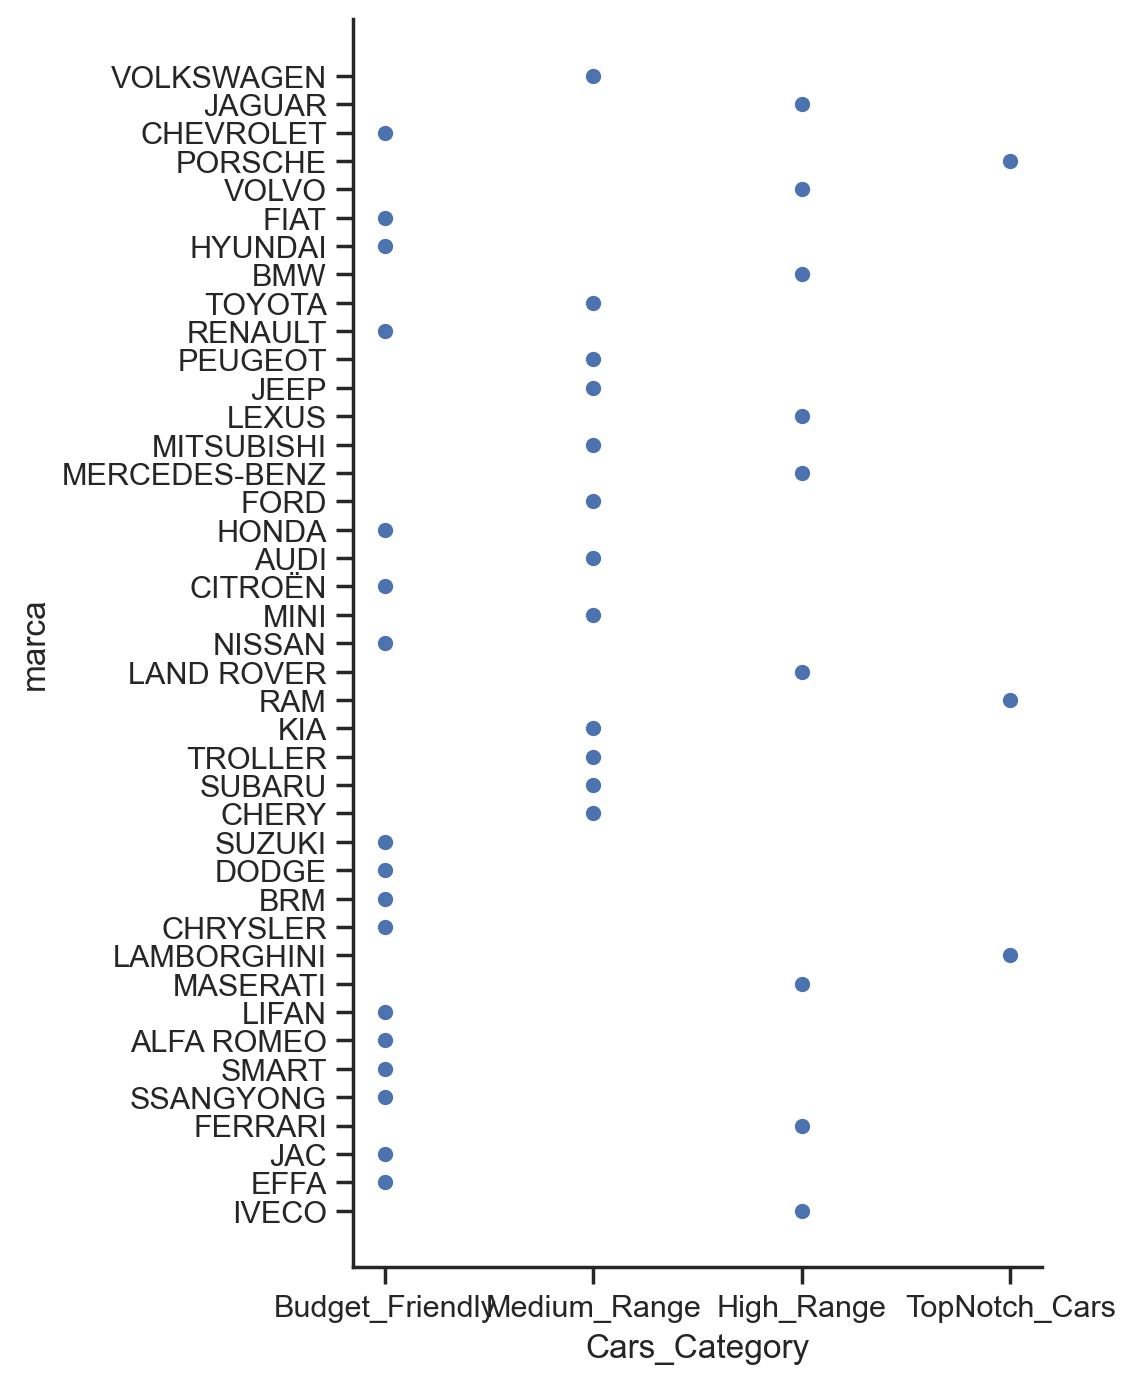

In [455]:
g=sns.relplot(data=df2, y='marca', x='Cars_Category' )
g.figure.set_size_inches(6.5, 7.5)

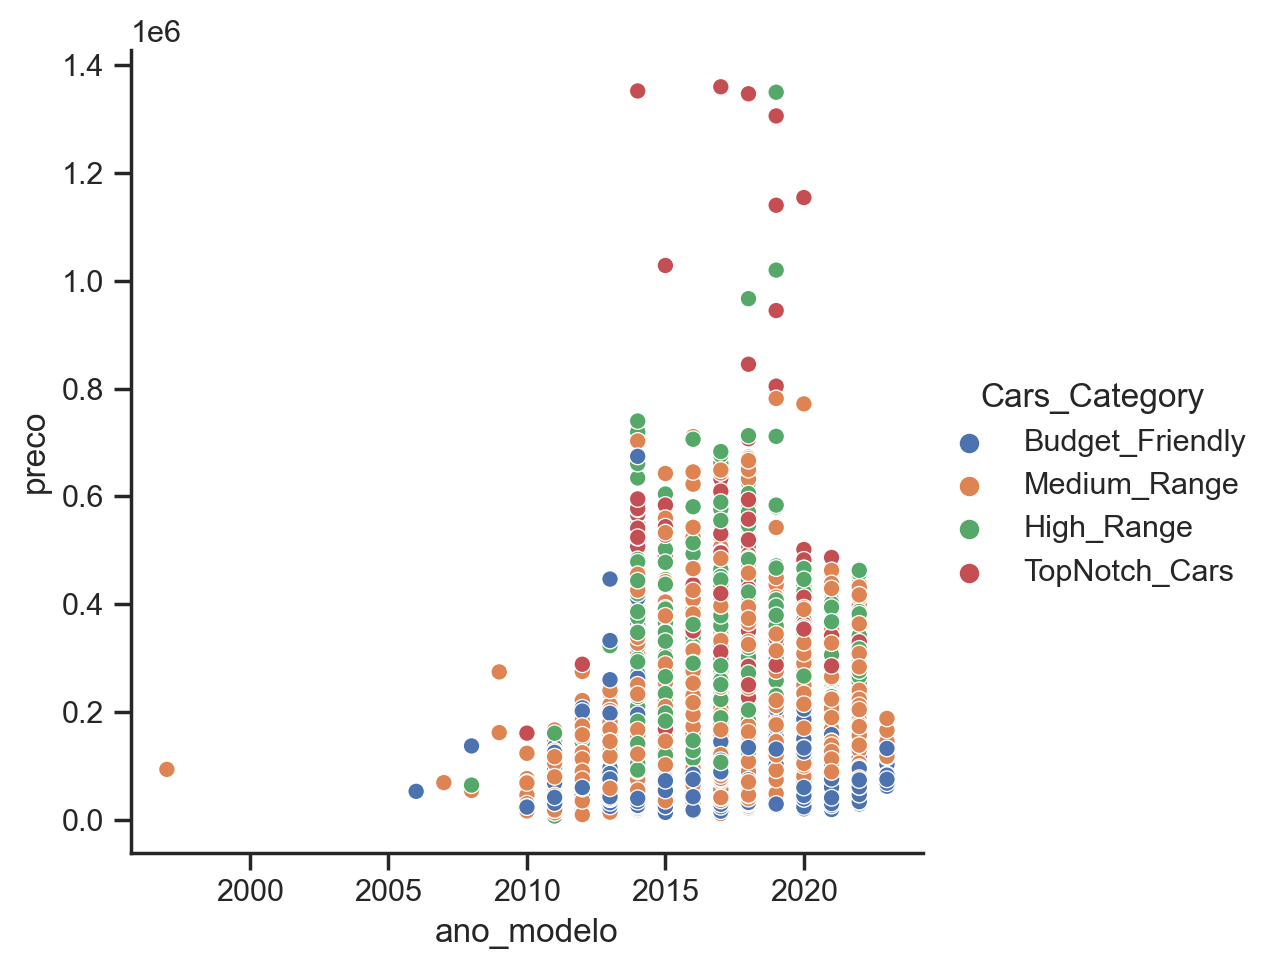

In [456]:
sns.relplot(data=df2, x='ano_modelo', y='preco', hue='Cars_Category')

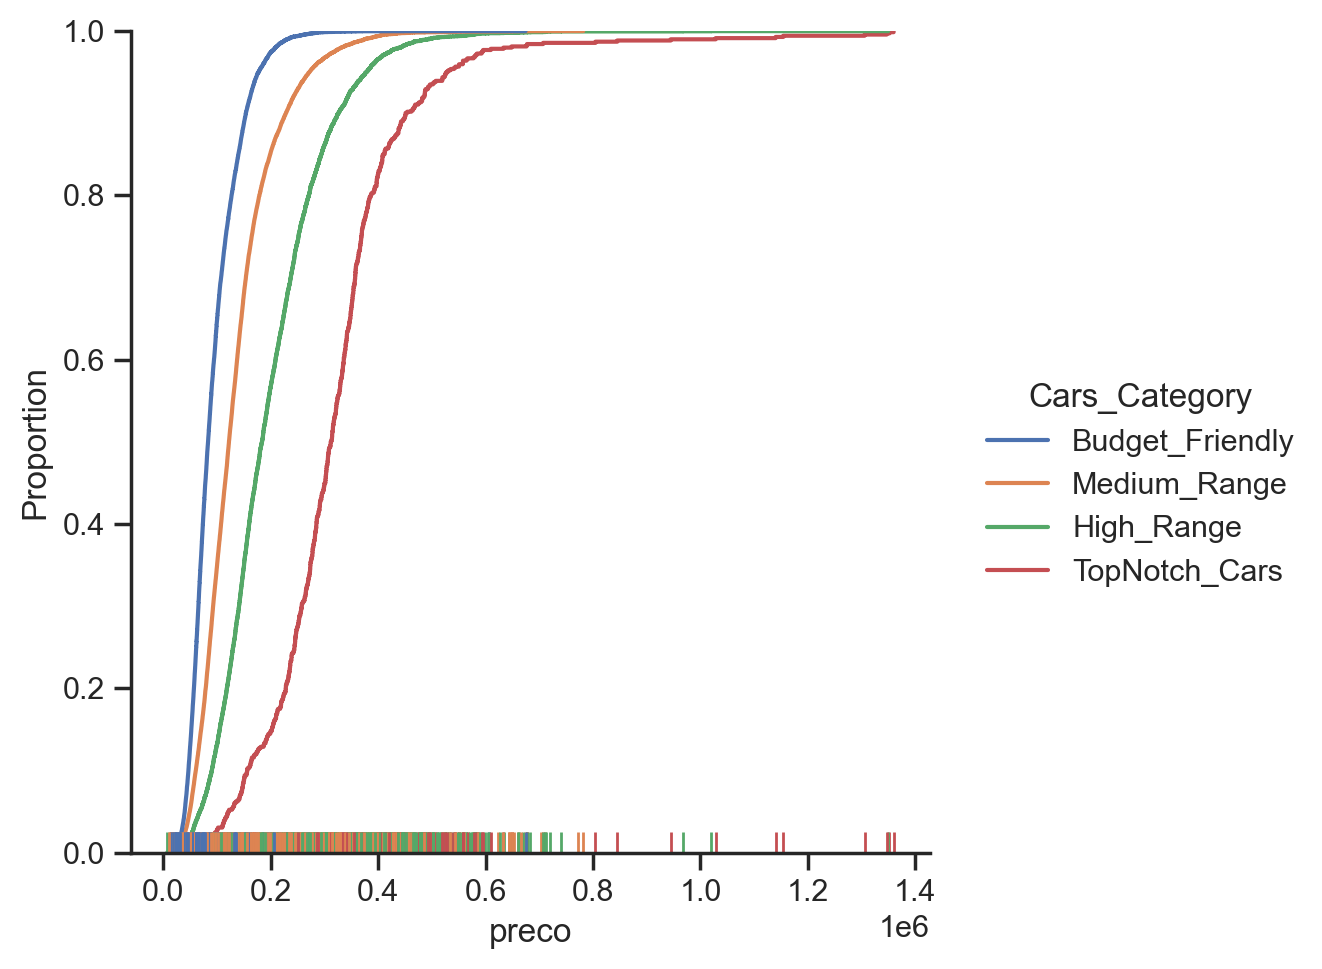

In [457]:
sns.displot(data=df2, kind="ecdf", x="preco", 
            hue="Cars_Category", rug=True)
#col="tipo", col_wrap=2,

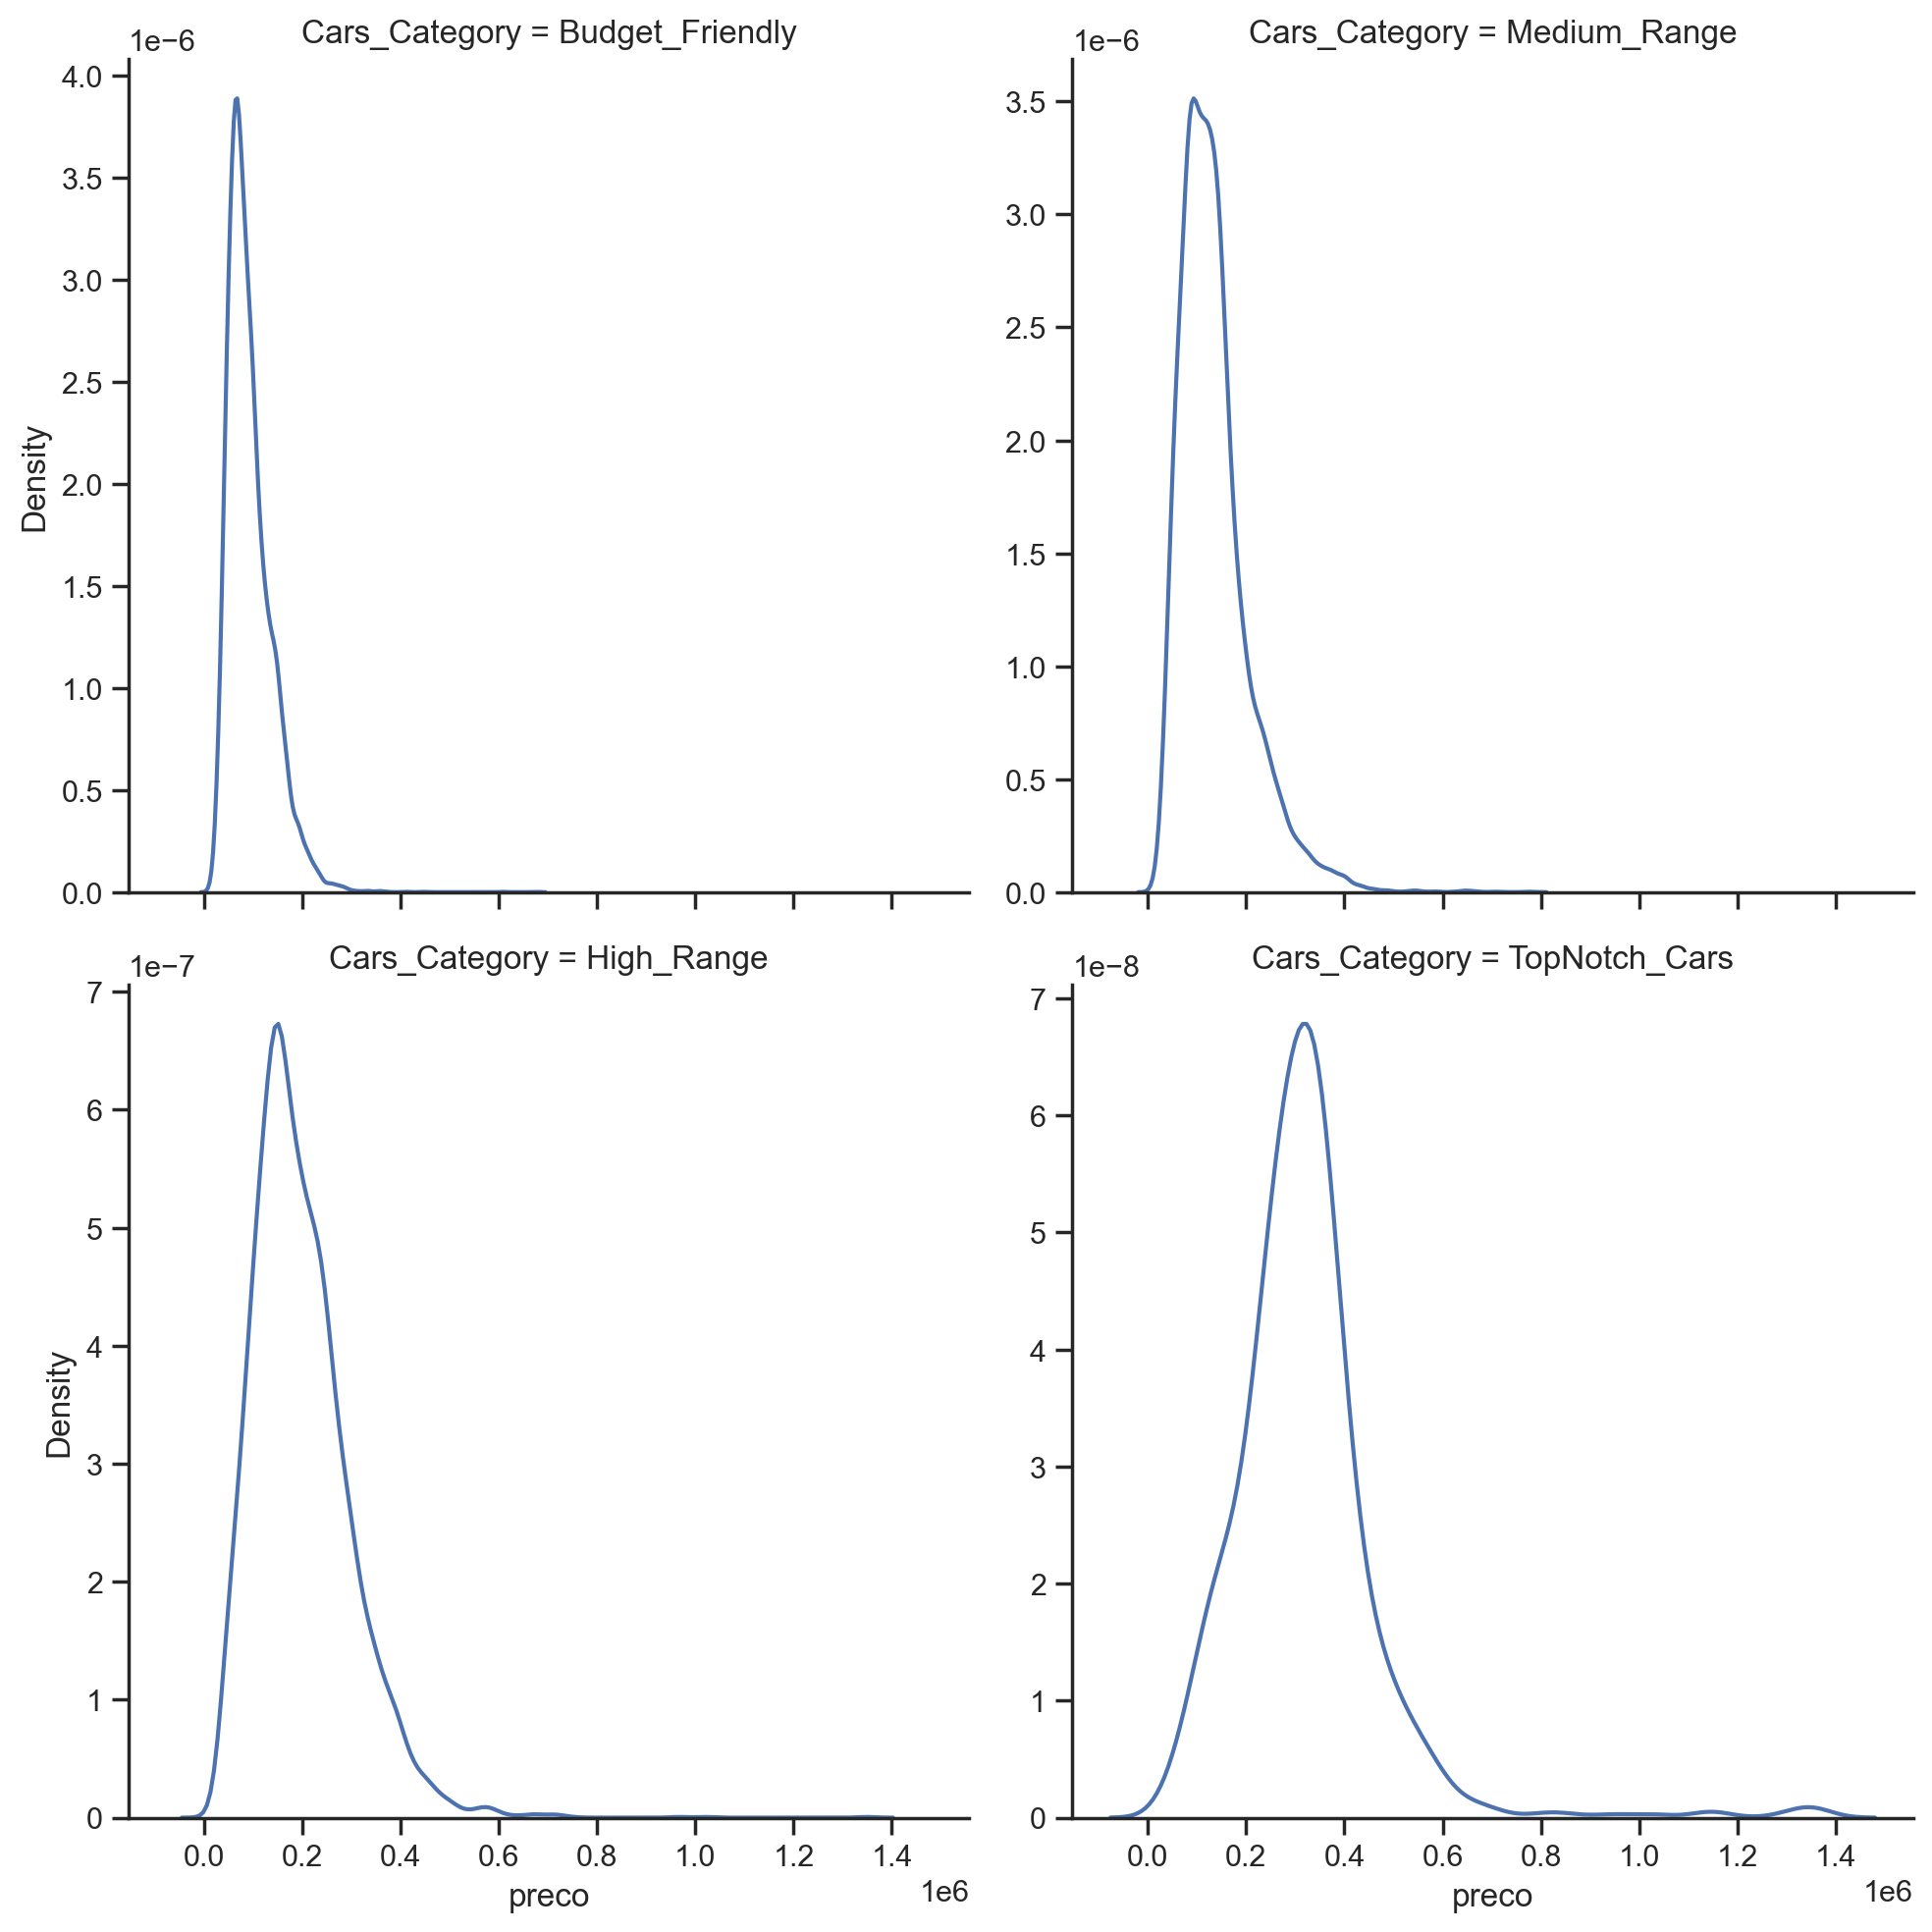

In [475]:
sns.displot(data=df2, x="preco", col="Cars_Category", col_wrap=2, kind='kde', facet_kws=dict(sharey=False))
#, multiple="stack"

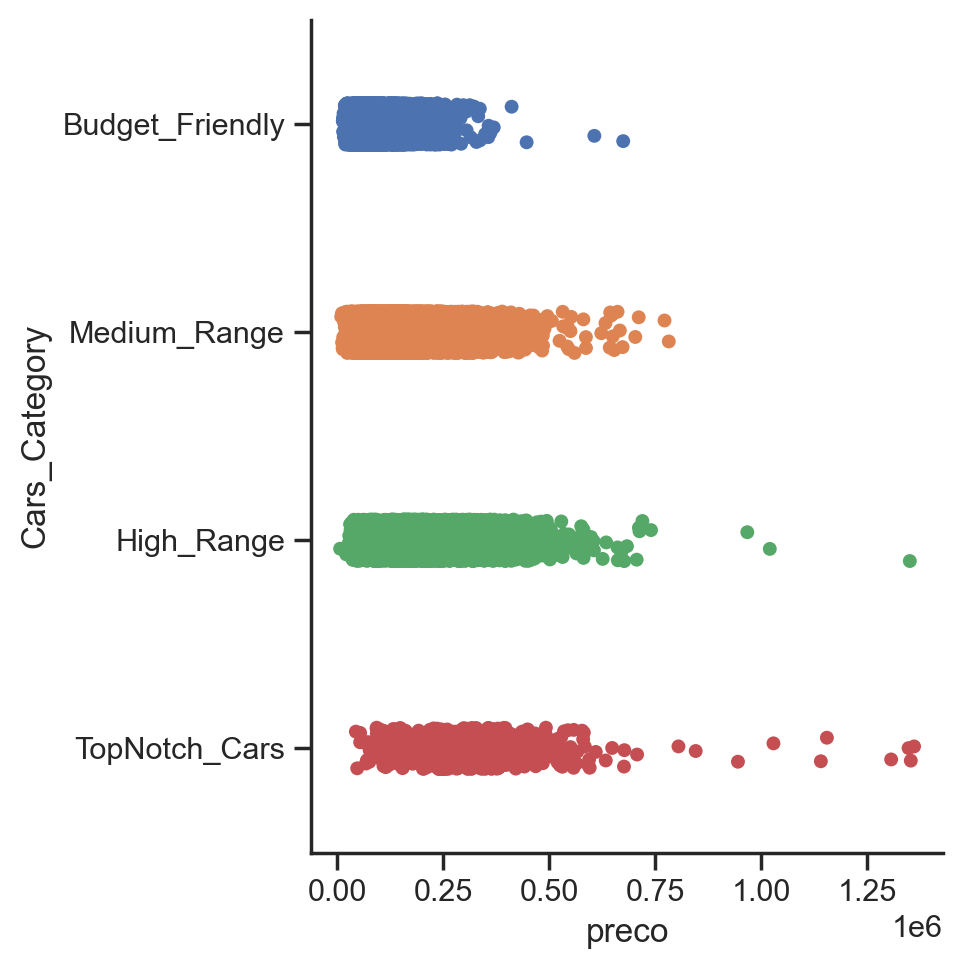

In [467]:
sns.catplot(data=df2, x="preco", y='Cars_Category')

In [468]:
sns.catplot(data=df2, x="preco", y='Cars_Category', kind='box')

In [470]:
df2.loc[df2.Cars_Category=='TopNotch_Cars'].sort_values('preco')

num_fotos        marca    modelo  ano_de_fabricacao  ano_modelo  \
19409  8          PORSCHE      CAYENNE   1999               2013         
14665  8          PORSCHE      CAYENNE   1997               2014         
28036  8          PORSCHE      CAYENNE   2013               2014         
36350  16         PORSCHE      PANAMERA  2013               2014         
3811   8          PORSCHE      CAYENNE   2000               2012         
...   ..              ...          ...    ...                ...         
1123   8          RAM          2500      2019               2020         
39377  8          PORSCHE      PANAMERA  2018               2019         
32390  16         PORSCHE      911       2018               2018         
1594   8          LAMBORGHINI  HURACÁN   2014               2014         
20969  13         PORSCHE      911       2014               2017         

         odometro      cambio  num_portas    tipo blindado     cor  \
19409 124413.0000  Automática  4           Sedã    N        Preto    
14665 154569.0000  Automática  4           Sedã    N        Preto    
28036 91375.0000   Automática  4           Sedã    N        Preto    
36350 78629.0000   Automática  2           Picape  N        Prata    
3811  113076.0000  Automática  4           Sedã    N        Preto    
...           ...         ... ..            ...   ..          ...    
1123  10993.0000   Automática  4           Picape  N        Preto    
39377 7836.0000    Automática  4           Sedã    N        Cinza    
32390 10529.0000   Manual      4           Cupê    N        Branco   
1594  2230.0000    Automática  4           Cupê    N        Branco   
20969 10249.0000   Automática  2           Picape  N        Branco   

      tipo_vendedor      cidade_vendedor      estado_vendedor   tipo_anuncio  \
19409  PF            São Paulo            São Paulo (SP)       Pessoa Física   
14665  PF            Osasco               São Paulo (SP)       Pessoa Física   
28036  PF            São Paulo            São Paulo (SP)       Pessoa Física   
36350  PJ            Rio de Janeiro       São Paulo (SP)       Loja            
3811   PF            Osasco               São Paulo (SP)       Pessoa Física   
...    ..               ...                          ...                 ...   
1123   PF            São Paulo            São Paulo (SP)       Pessoa Física   
39377  PF            Santana de Parnaíba  São Paulo (SP)       Pessoa Física   
32390  PJ            Sorocaba             São Paulo (SP)       Loja            
1594   PF            Rio de Janeiro       São Paulo (SP)       Pessoa Física   
20969  PJ            Cocalzinho de Goiás  Santa Catarina (SC)  Loja            

      entrega_delivery  troca elegivel_revisao attr_veiculo_aceita_troca  \
19409  False            False  False            Aceita troca               
14665  False            False  False            Aceita troca               
28036  False            False  False            Aceita troca               
36350  True             True   False            Aceita troca               
3811   False            False  False            Aceita troca               
...      ...              ...    ...                     ...               
1123   False            False  False            Aceita troca               
39377  False            False  False            Aceita troca               
32390  True             True   False            Aceita troca               
1594   False            False  False            Aceita troca               
20969  True             True   False            Aceita troca               

      attr_veiculo_único_dono  \
19409  NaN                      
14665  NaN                      
28036  NaN                      
36350  NaN                      
3811   NaN                      
...    ...                      
1123   NaN                      
39377  Único dono               
32390  Único dono               
1594   NaN                      
20969  NaN                      

      

## Significant Variables

In [476]:
df2.columns

Index(['num_fotos', 'marca', 'modelo', 'ano_de_fabricacao', 'ano_modelo',
       'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor',
       'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'tipo_anuncio',
       'entrega_delivery', 'troca', 'elegivel_revisao',
       'attr_veiculo_aceita_troca', 'attr_veiculo_único_dono',
       'attr_veiculo_todas_as_revisões_feitas_pela_concessionária',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fábrica',
       'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro', 'preco',
       'Cars_Category'],
      dtype='object')

Significant variables after Visualization:
'Cars_Category' , 'ano_de_fabricacao', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor','attr_veiculo_garantia_de_fábrica'


In [477]:
sig_col = ['Cars_Category' , 'ano_de_fabricacao', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor','attr_veiculo_garantia_de_fábrica','preco']

# Step 4: Data Preparation

In [487]:
df3 = df2[sig_col]
df3

Cars_Category  ano_de_fabricacao    odometro      cambio  num_portas  \
0      Medium_Range     2017              55672.0000   Automática  4            
1      High_Range       2017              47858.0000   Automática  4            
2      Budget_Friendly  2012              122323.0000  Automática  4            
3      TopNotch_Cars    2020              14207.0000   Automática  2            
4      High_Range       2015              43760.0000   Automática  4            
...           ...        ...                     ...          ... ..            
39441  Medium_Range     2015              73755.0000   Manual      4            
39442  High_Range       2016              78859.0000   Automática  4            
39443  Medium_Range     2021              9793.0000    Automática  4            
39444  Medium_Range     2018              51592.0000   Automática  4            
39445  TopNotch_Cars    2017              55225.0000   Automática  4            

                       tipo blindado     cor attr_veiculo_garantia_de_fábrica  \
0      Picape                N        Preto   NaN                               
1      Utilitário esportivo  N        Branco  NaN                               
2      Sedã                  N        Prata   NaN                               
3      Picape                N        Branco  NaN                               
4      Utilitário esportivo  N        Preto   NaN                               
...                     ... ..          ...   ...                               
39441  Sedã                  N        Prata   NaN                               
39442  Hatchback             N        Branco  NaN                               
39443  Sedã                  N        Cinza   Garantia de fábrica               
39444  Sedã                  N        Branco  NaN                               
39445  Utilitário esportivo  S        Preto   NaN                               

        preco  
0      123231  
1      272076  
2      53411   
3      299697  
4      255164  
...       ...  
39441  146046  
39442  106899  
39443  173246  
39444  221671  
39445  250577  

[39446 rows x 10 columns]

In [478]:
sig_cat_col = ['Cars_Category','cambio','tipo','blindado','cor','attr_veiculo_garantia_de_fábrica']

In [488]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df3[sig_cat_col])
dummies.shape

(39446, 30)

In [489]:
dummies = pd.get_dummies(df3[sig_cat_col], drop_first = True)
dummies.shape

(39446, 24)

In [490]:
# Add the results to the original dataframe

df4 = pd.concat([df3, dummies], axis = 1)

In [491]:
# Drop the original cat variables as dummies are already created

df4.drop( sig_cat_col, axis = 1, inplace = True)
df4.shape

(39446, 28)

In [493]:
df4.head()

ano_de_fabricacao    odometro  num_portas   preco  \
0  2017              55672.0000   4           123231   
1  2017              47858.0000   4           272076   
2  2012              122323.0000  4           53411    
3  2020              14207.0000   2           299697   
4  2015              43760.0000   4           255164   

   Cars_Category_Medium_Range  Cars_Category_High_Range  \
0  1                           0                          
1  0                           1                          
2  0                           0                          
3  0                           0                          
4  0                           1                          

   Cars_Category_TopNotch_Cars  cambio_Automatizada DCT  cambio_Automática  \
0  0                            0                        1                   
1  0                            0                        1                   
2  0                            0                        1                   
3  1                            0                        1                   
4  0                            0                        1                   

   cambio_Automática Sequencial  cambio_CVT  cambio_Manual  \
0  0                             0           0               
1  0                             0           0               
2  0                             0           0               
3  0                             0           0               
4  0                             0           0               

   cambio_Semi-automática  tipo_Cupê  tipo_Hatchback  tipo_Minivan  \
0  0                       0          0               0              
1  0                       0          0               0              
2  0                       0          0               0              
3  0                       0          0               0              
4  0                       0          0               0              

   tipo_Perua/SW  tipo_Picape  tipo_Sedã  tipo_Utilitário esportivo  \
0  0              1            0          0                           
1  0              0            0          1                           
2  0              0            1          0                           
3  0              1            0          0                           
4  0              0            0          1                           

   blindado_S  cor_Branco  cor_Cinza  cor_Dourado  cor_Prata  cor_Preto  \
0  0           0           0          0            0          1           
1  0           1           0          0            0          0           
2  0           0           0          0            1          0           
3  0           1           0          0            0          0           
4  0           0           0          0            0          1           

   cor_Verde  cor_Vermelho  
0  0          0             
1  0          0             
2  0          0             
3  0          0             
4  0          0